In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as f 
from torch.autograd import Variable
torch.backends.cudnn.deterministic = True
import pandas as pd
import numpy as np
import torch.utils.data as data_utils
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random 
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import manifold
from scipy import stats
from itertools import cycle
import sys
import utilities as ut
from Network import Net
import Network as nn
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True


results = []
num_classes = 2

learning_rate = 0.001
samples = 2000
epsilon=0
#for epsilon in [0.1, 0.05, 0.025, 0.15]:
for batch_size in [256]:
    for hidden_size in [100]:
        for aux_loss_activated in [True]:
            for EPS1 in [0.1]:
                for n in [100000]:
                    for opt in [1]:
                        for t in range(1):
                            train_dataset, test_dataset = ut.load_files(dataset=1)
                            input_size = train_dataset.shape[1]-1
                            

                            if n < 50000:
                                train_dataset = ut.down_sampling(train_dataset)
                                train_dataset = train_dataset.sample(n)
                                print(train_dataset)
                            else: 
                                trainig_dataset_a = train_dataset[train_dataset.label=='ClassA']
                                print('shape: ', trainig_dataset_a.shape[0])
                                n2 = n - trainig_dataset_a.shape[0]
                                print('clase no RR Lrae', n2)
                                trainig_dataset_b = train_dataset[~(train_dataset.label=='ClassA')].sample(n2)
                                train_dataset = pd.concat([trainig_dataset_a, trainig_dataset_b])
                            
                            train_dataset, test_dataset = ut.delete_outliers(train_dataset, test_dataset)

                            train_dataset = ut.sort_columns(train_dataset)
                            test_dataset = ut.sort_columns(test_dataset)

                            test_dataset_pred = test_dataset.copy()
                            train_dataset_pred = train_dataset.copy()

                            try:
                                data_prior = ut.generate_samples_2D(samples, train_dataset, distribution='uniform')

                                train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.2, random_state=42)

                                train_dataset_prior, val_dataset_prior = train_test_split(data_prior, test_size=0.2, random_state=42)
                                print(train_dataset_prior.columns)
                                _, _, train_target_prior, train_loader_prior = ut.get_tensors(train_dataset_prior, batch_size)
                                _, _, val_target_prior, val_loader_prior     = ut.get_tensors(val_dataset_prior, batch_size)
                                _, _, train_target, train_loader             = ut.get_tensors(train_dataset, batch_size)
                                _, _, train_target_pred, train_loader_pred   = ut.get_tensors(train_dataset_pred, batch_size)
                                _, _, val_target, val_loader                 = ut.get_tensors(val_dataset_prior, batch_size)
                                _, _, test_target, test_loader               = ut.get_tensors(test_dataset, batch_size)
                                _, _, test_target_pred, test_loader_pred     = ut.get_tensors(test_dataset_pred, batch_size)

                                net = Net(input_size, hidden_size, hidden_size, num_classes)
                                net.cuda()

                                hist_val, hist_train = nn.train(net, train_loader, train_loader_prior, val_loader, test_loader,
                                EPS1, learning_rate, input_size, aux_loss_activated=aux_loss_activated)

                                acc_train = nn.get_results(net, train_loader, input_size)
                                acc_test =nn.get_results(net, test_loader, input_size)
                                results.append([acc_train, acc_test, epsilon, batch_size, hidden_size, aux_loss_activated, EPS1, n, opt])
                                pd.DataFrame(results, columns=['acc_train', 'acc_test', 'epsilon', 'batch_size', 'hidden_size',
                                    'aux_loss_activated', 'EPS1', 'n', 'opt']).to_csv('07-03-2022-results_2d.csv')
                            except Exception as e:
                                print(e) 
                                print(str(batch_size)+"-"+str(hidden_size)+"-"+str(aux_loss_activated)+"-"+str(EPS1))

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/franciscoperez/anacon

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
377989    0.38000         0.000001               1    0.363333  113.380711   
165064    0.32400         0.000000               1    0.416107   30.211445   
21425     0.03050         0.449257               5    0.326667    1.097332   
51237     0.10025         0.002341               6    0.341880   28.713619   
147534    0.02675         0.534269              16    0.311927   61.331596   
...           ...              ...             ...         ...         ...   
99521     0.07100         0.001548               7    0.363636   77.730893   
65722     0.04000         0.000512               4    0.276667   30.948538   
279684    0.01950         0.169019               3    0.314381   20.103544   
370559    0.38350         0.000000               1    0.430000   62.802689   
175567    0.22800         0.003567               1    0.36

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Epochs:  10000
Epoch:  0
training: epoch:  1  loss:  17.082241415977478 -- aux loss:  158.04208481311798
validating: epoch:  1  loss:  1.4902521967887878
Epoch:  1
training: epoch:  2  loss:  17.168287873268127 -- aux loss:  117.85075241327286
validating: epoch:  2  loss:  1.4891577363014221
Epoch:  2
training: epoch:  3  loss:  16.79595559835434 -- aux loss:  118.21627601981163
validating: epoch:  3  loss:  1.4264680743217468
Epoch:  3
training: epoch:  4  loss:  16.147626221179962 -- aux loss:  110.54584011435509
validating: epoch:  4  loss:  1.198338359594345
Epoch:  4
training: epoch:  5  loss:  15.503508269786835 -- aux loss:  82.29766573011875
validating: epoch:  5  loss:  0.8900367021560669
Epoch:  5
training: epoch:  6  loss:  14.236031174659729 -- aux loss:  64.55229166150093
validating: epoch:  6  loss:  0.7338706701993942
Epoch:  6
training: epoch:  7  loss:  12.711389392614365 -- aux loss:  54.838992938399315
validating: epoch:  7  loss:  0.6218322664499283
Epoch:  7
traini

training: epoch:  45  loss:  4.32523974776268 -- aux loss:  0.21086866781115532
validating: epoch:  45  loss:  0.002400299534201622
Epoch:  45
training: epoch:  46  loss:  4.268980234861374 -- aux loss:  0.18576610181480646
validating: epoch:  46  loss:  0.0021141227334737778
Epoch:  46
training: epoch:  47  loss:  4.214115336537361 -- aux loss:  0.16379723697900772
validating: epoch:  47  loss:  0.0018641259521245956
Epoch:  47
training: epoch:  48  loss:  4.160253666341305 -- aux loss:  0.14448388293385506
validating: epoch:  48  loss:  0.0016451682895421982
Epoch:  48
training: epoch:  49  loss:  4.108379803597927 -- aux loss:  0.12735231965780258
validating: epoch:  49  loss:  0.0014510396867990494
Epoch:  49
training: epoch:  50  loss:  4.05830942094326 -- aux loss:  0.11224318109452724
validating: epoch:  50  loss:  0.001280326396226883
The current loss: 0.001280326396226883
the_last_loss: 0.0014510396867990494
trigger times: 0
Accuracy of the network on test objects: 93 %
93
Acc

training: epoch:  88  loss:  2.8579752445220947 -- aux loss:  0.0007769167423248291
validating: epoch:  88  loss:  9.5367431640625e-06
Epoch:  88
training: epoch:  89  loss:  2.8375819101929665 -- aux loss:  0.0006826184689998627
validating: epoch:  89  loss:  7.62939453125e-06
Epoch:  89
training: epoch:  90  loss:  2.818131275475025 -- aux loss:  0.000619940459728241
validating: epoch:  90  loss:  7.62939453125e-06
The current loss: 7.62939453125e-06
the_last_loss: 7.62939453125e-06
trigger times: 0
Accuracy of the network on test objects: 97 %
97
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 62 %
62
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  90
training: epoch:  91  loss:  2.798283129930496 -- aux los

training: epoch:  131  loss:  2.161185871809721 -- aux loss:  4.6566128730773926e-08
validating: epoch:  131  loss:  0.0
Epoch:  131
training: epoch:  132  loss:  2.149124465882778 -- aux loss:  4.6566128730773926e-08
validating: epoch:  132  loss:  0.0
Epoch:  132
training: epoch:  133  loss:  2.1367828510701656 -- aux loss:  4.6566128730773926e-08
validating: epoch:  133  loss:  0.0
Epoch:  133
training: epoch:  134  loss:  2.1249828822910786 -- aux loss:  4.6566128730773926e-08
validating: epoch:  134  loss:  0.0
Epoch:  134
training: epoch:  135  loss:  2.1129427924752235 -- aux loss:  4.6566128730773926e-08
validating: epoch:  135  loss:  0.0
Epoch:  135
training: epoch:  136  loss:  2.1010917760431767 -- aux loss:  4.6566128730773926e-08
validating: epoch:  136  loss:  0.0
Epoch:  136
training: epoch:  137  loss:  2.089543003588915 -- aux loss:  4.6566128730773926e-08
validating: epoch:  137  loss:  0.0
Epoch:  137
training: epoch:  138  loss:  2.0779094733297825 -- aux loss:  4.

training: epoch:  179  loss:  1.7214067988097668 -- aux loss:  8.568167686462402e-08
validating: epoch:  179  loss:  0.0
Epoch:  179
training: epoch:  180  loss:  1.7152974363416433 -- aux loss:  8.381903171539307e-08
validating: epoch:  180  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 98 %
98
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 69 %
69
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  180
training: epoch:  181  loss:  1.708219362422824 -- aux loss:  8.568167686462402e-08
validating: epoch:  181  loss:  0.0
Epoch:  181
training: epoch:  182  loss:  1.7016074284911156 -- aux loss:  8.568167686462402e-08
validating: epoch:  182  loss:  0.

training: epoch:  223  loss:  1.4751503933221102 -- aux loss:  1.1548399925231934e-07
validating: epoch:  223  loss:  0.0
Epoch:  223
training: epoch:  224  loss:  1.4713118579238653 -- aux loss:  1.0896474123001099e-07
validating: epoch:  224  loss:  0.0
Epoch:  224
training: epoch:  225  loss:  1.4680489115417004 -- aux loss:  1.0896474123001099e-07
validating: epoch:  225  loss:  0.0
Epoch:  225
training: epoch:  226  loss:  1.463979972526431 -- aux loss:  1.0710209608078003e-07
validating: epoch:  226  loss:  0.0
Epoch:  226
training: epoch:  227  loss:  1.4607644248753786 -- aux loss:  1.0989606380462646e-07
validating: epoch:  227  loss:  0.0
Epoch:  227
training: epoch:  228  loss:  1.4568931609392166 -- aux loss:  1.0989606380462646e-07
validating: epoch:  228  loss:  0.0
Epoch:  228
training: epoch:  229  loss:  1.4540330059826374 -- aux loss:  1.0803341865539551e-07
validating: epoch:  229  loss:  0.0
Epoch:  229
training: epoch:  230  loss:  1.451060637831688 -- aux loss:  1

training: epoch:  270  loss:  1.3638808280229568 -- aux loss:  1.6577541828155518e-07
validating: epoch:  270  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 98 %
98
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 70 %
70
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  270
training: epoch:  271  loss:  1.3612521532922983 -- aux loss:  1.6391277313232422e-07
validating: epoch:  271  loss:  0.0
Epoch:  271
training: epoch:  272  loss:  1.358162248507142 -- aux loss:  1.6763806343078613e-07
validating: epoch:  272  loss:  0.0
Epoch:  272
training: epoch:  273  loss:  1.3555436618626118 -- aux loss:  1.6670674085617065e-07
validating: epoch:  273  loss:

training: epoch:  314  loss:  1.2781192921102047 -- aux loss:  1.7229467630386353e-07
validating: epoch:  314  loss:  0.0
Epoch:  314
training: epoch:  315  loss:  1.2754440754652023 -- aux loss:  1.73225998878479e-07
validating: epoch:  315  loss:  0.0
Epoch:  315
training: epoch:  316  loss:  1.2730563096702099 -- aux loss:  1.7136335372924805e-07
validating: epoch:  316  loss:  0.0
Epoch:  316
training: epoch:  317  loss:  1.2710818368941545 -- aux loss:  1.695007085800171e-07
validating: epoch:  317  loss:  0.0
Epoch:  317
training: epoch:  318  loss:  1.2684755623340607 -- aux loss:  1.6763806343078613e-07
validating: epoch:  318  loss:  0.0
Epoch:  318
training: epoch:  319  loss:  1.2664074786007404 -- aux loss:  1.6298145055770874e-07
validating: epoch:  319  loss:  0.0
Epoch:  319
training: epoch:  320  loss:  1.2644138727337122 -- aux loss:  1.6670674085617065e-07
validating: epoch:  320  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the net

training: epoch:  361  loss:  1.1922471020370722 -- aux loss:  1.7136335372924805e-07
validating: epoch:  361  loss:  0.0
Epoch:  361
training: epoch:  362  loss:  1.1892948914319277 -- aux loss:  1.6577541828155518e-07
validating: epoch:  362  loss:  0.0
Epoch:  362
training: epoch:  363  loss:  1.1854394916445017 -- aux loss:  1.6298145055770874e-07
validating: epoch:  363  loss:  0.0
Epoch:  363
training: epoch:  364  loss:  1.1830155309289694 -- aux loss:  1.5832483768463135e-07
validating: epoch:  364  loss:  0.0
Epoch:  364
training: epoch:  365  loss:  1.1808617282658815 -- aux loss:  1.6298145055770874e-07
validating: epoch:  365  loss:  0.0
Epoch:  365
training: epoch:  366  loss:  1.1814474631100893 -- aux loss:  1.6577541828155518e-07
validating: epoch:  366  loss:  0.0
Epoch:  366
training: epoch:  367  loss:  1.1802326627075672 -- aux loss:  1.7043203115463257e-07
validating: epoch:  367  loss:  0.0
Epoch:  367
training: epoch:  368  loss:  1.1791167929768562 -- aux loss: 

training: epoch:  408  loss:  1.040878839790821 -- aux loss:  1.2479722499847412e-07
validating: epoch:  408  loss:  0.0
Epoch:  408
training: epoch:  409  loss:  1.0374768730252981 -- aux loss:  1.2479722499847412e-07
validating: epoch:  409  loss:  0.0
Epoch:  409
training: epoch:  410  loss:  1.0341947227716446 -- aux loss:  1.2479722499847412e-07
validating: epoch:  410  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 98 %
98
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 72 %
72
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  410
training: epoch:  411  loss:  1.0303633157163858 -- aux loss:  1.2386590242385864e-07
validating: epoch:  411  loss:

training: epoch:  452  loss:  0.9153764676302671 -- aux loss:  1.0896474123001099e-07
validating: epoch:  452  loss:  0.0
Epoch:  452
training: epoch:  453  loss:  0.9134676679968834 -- aux loss:  1.0710209608078003e-07
validating: epoch:  453  loss:  0.0
Epoch:  453
training: epoch:  454  loss:  0.911571092903614 -- aux loss:  1.0523945093154907e-07
validating: epoch:  454  loss:  0.0
Epoch:  454
training: epoch:  455  loss:  0.9095324128866196 -- aux loss:  1.043081283569336e-07
validating: epoch:  455  loss:  0.0
Epoch:  455
training: epoch:  456  loss:  0.9067967589944601 -- aux loss:  1.0244548320770264e-07
validating: epoch:  456  loss:  0.0
Epoch:  456
training: epoch:  457  loss:  0.9047352448105812 -- aux loss:  1.0151416063308716e-07
validating: epoch:  457  loss:  0.0
Epoch:  457
training: epoch:  458  loss:  0.9025049321353436 -- aux loss:  9.872019290924072e-08
validating: epoch:  458  loss:  0.0
Epoch:  458
training: epoch:  459  loss:  0.8994295876473188 -- aux loss:  9.

training: epoch:  499  loss:  0.8045524135231972 -- aux loss:  1.3504177331924438e-07
validating: epoch:  499  loss:  0.0
Epoch:  499
training: epoch:  500  loss:  0.8039422892034054 -- aux loss:  1.3504177331924438e-07
validating: epoch:  500  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 74 %
74
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  500
training: epoch:  501  loss:  0.8005720432847738 -- aux loss:  1.3597309589385986e-07
validating: epoch:  501  loss:  0.0
Epoch:  501
training: epoch:  502  loss:  0.8007988873869181 -- aux loss:  1.341104507446289e-07
validating: epoch:  502  loss:

training: epoch:  543  loss:  0.7410931885242462 -- aux loss:  9.12696123123169e-08
validating: epoch:  543  loss:  0.0
Epoch:  543
training: epoch:  544  loss:  0.7379823988303542 -- aux loss:  9.033828973770142e-08
validating: epoch:  544  loss:  0.0
Epoch:  544
training: epoch:  545  loss:  0.737403784878552 -- aux loss:  8.568167686462402e-08
validating: epoch:  545  loss:  0.0
Epoch:  545
training: epoch:  546  loss:  0.734775310382247 -- aux loss:  8.381903171539307e-08
validating: epoch:  546  loss:  0.0
Epoch:  546
training: epoch:  547  loss:  0.7322889985516667 -- aux loss:  8.475035429000854e-08
validating: epoch:  547  loss:  0.0
Epoch:  547
training: epoch:  548  loss:  0.730265342630446 -- aux loss:  8.381903171539307e-08
validating: epoch:  548  loss:  0.0
Epoch:  548
training: epoch:  549  loss:  0.7291305623948574 -- aux loss:  8.475035429000854e-08
validating: epoch:  549  loss:  0.0
Epoch:  549
training: epoch:  550  loss:  0.7270589852705598 -- aux loss:  8.47503542

training: epoch:  591  loss:  0.6562178293243051 -- aux loss:  6.426125764846802e-08
validating: epoch:  591  loss:  0.0
Epoch:  591
training: epoch:  592  loss:  0.6527926847338676 -- aux loss:  6.51925802230835e-08
validating: epoch:  592  loss:  0.0
Epoch:  592
training: epoch:  593  loss:  0.6536202104762197 -- aux loss:  6.612390279769897e-08
validating: epoch:  593  loss:  0.0
Epoch:  593
training: epoch:  594  loss:  0.650774409994483 -- aux loss:  6.426125764846802e-08
validating: epoch:  594  loss:  0.0
Epoch:  594
training: epoch:  595  loss:  0.6494094720110297 -- aux loss:  6.612390279769897e-08
validating: epoch:  595  loss:  0.0
Epoch:  595
training: epoch:  596  loss:  0.6470327209681273 -- aux loss:  6.426125764846802e-08
validating: epoch:  596  loss:  0.0
Epoch:  596
training: epoch:  597  loss:  0.6461534909904003 -- aux loss:  6.239861249923706e-08
validating: epoch:  597  loss:  0.0
Epoch:  597
training: epoch:  598  loss:  0.6453492166474462 -- aux loss:  6.239861

training: epoch:  639  loss:  0.5945104723796248 -- aux loss:  8.102506399154663e-08
validating: epoch:  639  loss:  0.0
Epoch:  639
training: epoch:  640  loss:  0.5924125583842397 -- aux loss:  8.102506399154663e-08
validating: epoch:  640  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 76 %
76
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  640
training: epoch:  641  loss:  0.5932411635294557 -- aux loss:  8.009374141693115e-08
validating: epoch:  641  loss:  0.0
Epoch:  641
training: epoch:  642  loss:  0.590809054672718 -- aux loss:  8.102506399154663e-08
validating: epoch:  642  loss:  0.

training: epoch:  683  loss:  0.5602208096534014 -- aux loss:  3.725290298461914e-08
validating: epoch:  683  loss:  0.0
Epoch:  683
training: epoch:  684  loss:  0.5594939747825265 -- aux loss:  3.91155481338501e-08
validating: epoch:  684  loss:  0.0
Epoch:  684
training: epoch:  685  loss:  0.5576112223789096 -- aux loss:  3.91155481338501e-08
validating: epoch:  685  loss:  0.0
Epoch:  685
training: epoch:  686  loss:  0.5572770275175571 -- aux loss:  3.725290298461914e-08
validating: epoch:  686  loss:  0.0
Epoch:  686
training: epoch:  687  loss:  0.5557745071128011 -- aux loss:  3.725290298461914e-08
validating: epoch:  687  loss:  0.0
Epoch:  687
training: epoch:  688  loss:  0.5550529761239886 -- aux loss:  3.725290298461914e-08
validating: epoch:  688  loss:  0.0
Epoch:  688
training: epoch:  689  loss:  0.5541670303791761 -- aux loss:  3.5390257835388184e-08
validating: epoch:  689  loss:  0.0
Epoch:  689
training: epoch:  690  loss:  0.5523341037333012 -- aux loss:  3.53902

training: epoch:  730  loss:  0.509632520377636 -- aux loss:  3.166496753692627e-08
validating: epoch:  730  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 76 %
76
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  730
training: epoch:  731  loss:  0.5091192983090878 -- aux loss:  3.259629011154175e-08
validating: epoch:  731  loss:  0.0
Epoch:  731
training: epoch:  732  loss:  0.5086159547790885 -- aux loss:  3.259629011154175e-08
validating: epoch:  732  loss:  0.0
Epoch:  732
training: epoch:  733  loss:  0.5064967013895512 -- aux loss:  3.3527612686157227e-08
validating: epoch:  733  loss:  0

training: epoch:  774  loss:  0.47096728160977364 -- aux loss:  2.8870999813079834e-08
validating: epoch:  774  loss:  0.0
Epoch:  774
training: epoch:  775  loss:  0.4706436339765787 -- aux loss:  2.7939677238464355e-08
validating: epoch:  775  loss:  0.0
Epoch:  775
training: epoch:  776  loss:  0.47110336693003774 -- aux loss:  2.8870999813079834e-08
validating: epoch:  776  loss:  0.0
Epoch:  776
training: epoch:  777  loss:  0.4718793393112719 -- aux loss:  2.8870999813079834e-08
validating: epoch:  777  loss:  0.0
Epoch:  777
training: epoch:  778  loss:  0.4717745487578213 -- aux loss:  2.9802322387695312e-08
validating: epoch:  778  loss:  0.0
Epoch:  778
training: epoch:  779  loss:  0.47264791326597333 -- aux loss:  3.073364496231079e-08
validating: epoch:  779  loss:  0.0
Epoch:  779
training: epoch:  780  loss:  0.4722772487439215 -- aux loss:  3.166496753692627e-08
validating: epoch:  780  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the

training: epoch:  821  loss:  0.44186733989045024 -- aux loss:  2.60770320892334e-08
validating: epoch:  821  loss:  0.0
Epoch:  821
training: epoch:  822  loss:  0.44086770014837384 -- aux loss:  2.60770320892334e-08
validating: epoch:  822  loss:  0.0
Epoch:  822
training: epoch:  823  loss:  0.44065276393666863 -- aux loss:  2.60770320892334e-08
validating: epoch:  823  loss:  0.0
Epoch:  823
training: epoch:  824  loss:  0.4402500935830176 -- aux loss:  2.60770320892334e-08
validating: epoch:  824  loss:  0.0
Epoch:  824
training: epoch:  825  loss:  0.43885993072763085 -- aux loss:  2.60770320892334e-08
validating: epoch:  825  loss:  0.0
Epoch:  825
training: epoch:  826  loss:  0.43815937964245677 -- aux loss:  2.60770320892334e-08
validating: epoch:  826  loss:  0.0
Epoch:  826
training: epoch:  827  loss:  0.43760730931535363 -- aux loss:  2.60770320892334e-08
validating: epoch:  827  loss:  0.0
Epoch:  827
training: epoch:  828  loss:  0.4368071365170181 -- aux loss:  2.60770

training: epoch:  869  loss:  0.4091354515403509 -- aux loss:  2.60770320892334e-08
validating: epoch:  869  loss:  0.0
Epoch:  869
training: epoch:  870  loss:  0.4084320622496307 -- aux loss:  2.60770320892334e-08
validating: epoch:  870  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  870
training: epoch:  871  loss:  0.40768623165786266 -- aux loss:  2.514570951461792e-08
validating: epoch:  871  loss:  0.0
Epoch:  871
training: epoch:  872  loss:  0.407348807901144 -- aux loss:  2.514570951461792e-08
validating: epoch:  872  loss:  0.0

training: epoch:  913  loss:  0.3856548508629203 -- aux loss:  1.862645149230957e-08
validating: epoch:  913  loss:  0.0
Epoch:  913
training: epoch:  914  loss:  0.3852984015829861 -- aux loss:  2.1420419216156006e-08
validating: epoch:  914  loss:  0.0
Epoch:  914
training: epoch:  915  loss:  0.3847468909807503 -- aux loss:  2.0489096641540527e-08
validating: epoch:  915  loss:  0.0
Epoch:  915
training: epoch:  916  loss:  0.3835398810915649 -- aux loss:  1.862645149230957e-08
validating: epoch:  916  loss:  0.0
Epoch:  916
training: epoch:  917  loss:  0.3829429568722844 -- aux loss:  2.0489096641540527e-08
validating: epoch:  917  loss:  0.0
Epoch:  917
training: epoch:  918  loss:  0.38271870324388146 -- aux loss:  2.2351741790771484e-08
validating: epoch:  918  loss:  0.0
Epoch:  918
training: epoch:  919  loss:  0.3820720789954066 -- aux loss:  2.0489096641540527e-08
validating: epoch:  919  loss:  0.0
Epoch:  919
training: epoch:  920  loss:  0.38071659952402115 -- aux loss: 

training: epoch:  960  loss:  0.3605444780550897 -- aux loss:  2.421438694000244e-08
validating: epoch:  960  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  960
training: epoch:  961  loss:  0.3600015458650887 -- aux loss:  2.421438694000244e-08
validating: epoch:  961  loss:  0.0
Epoch:  961
training: epoch:  962  loss:  0.35940545005723834 -- aux loss:  2.421438694000244e-08
validating: epoch:  962  loss:  0.0
Epoch:  962
training: epoch:  963  loss:  0.3586937775835395 -- aux loss:  2.421438694000244e-08
validating: epoch:  963  loss:  

training: epoch:  1004  loss:  0.3454223540611565 -- aux loss:  2.514570951461792e-08
validating: epoch:  1004  loss:  0.0
Epoch:  1004
training: epoch:  1005  loss:  0.3452217117883265 -- aux loss:  2.561137080192566e-08
validating: epoch:  1005  loss:  0.0
Epoch:  1005
training: epoch:  1006  loss:  0.3452306413091719 -- aux loss:  2.514570951461792e-08
validating: epoch:  1006  loss:  0.0
Epoch:  1006
training: epoch:  1007  loss:  0.3448802474886179 -- aux loss:  2.514570951461792e-08
validating: epoch:  1007  loss:  0.0
Epoch:  1007
training: epoch:  1008  loss:  0.3454650058411062 -- aux loss:  2.514570951461792e-08
validating: epoch:  1008  loss:  0.0
Epoch:  1008
training: epoch:  1009  loss:  0.34501582151278853 -- aux loss:  2.514570951461792e-08
validating: epoch:  1009  loss:  0.0
Epoch:  1009
training: epoch:  1010  loss:  0.34544488973915577 -- aux loss:  2.514570951461792e-08
validating: epoch:  1010  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
A

training: epoch:  1050  loss:  0.33129260037094355 -- aux loss:  2.514570951461792e-08
validating: epoch:  1050  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1050
training: epoch:  1051  loss:  0.33131117513403296 -- aux loss:  2.561137080192566e-08
validating: epoch:  1051  loss:  0.0
Epoch:  1051
training: epoch:  1052  loss:  0.33078249357640743 -- aux loss:  2.561137080192566e-08
validating: epoch:  1052  loss:  0.0
Epoch:  1052
training: epoch:  1053  loss:  0.33046451210975647 -- aux loss:  2.561137080192566e-08
validating: epoch: 

training: epoch:  1093  loss:  0.3183454186655581 -- aux loss:  2.468004822731018e-08
validating: epoch:  1093  loss:  0.0
Epoch:  1093
training: epoch:  1094  loss:  0.3176449299789965 -- aux loss:  2.468004822731018e-08
validating: epoch:  1094  loss:  0.0
Epoch:  1094
training: epoch:  1095  loss:  0.3180049699731171 -- aux loss:  2.468004822731018e-08
validating: epoch:  1095  loss:  0.0
Epoch:  1095
training: epoch:  1096  loss:  0.31816484685987234 -- aux loss:  2.514570951461792e-08
validating: epoch:  1096  loss:  0.0
Epoch:  1096
training: epoch:  1097  loss:  0.3190376195125282 -- aux loss:  2.514570951461792e-08
validating: epoch:  1097  loss:  0.0
Epoch:  1097
training: epoch:  1098  loss:  0.31752805178985 -- aux loss:  2.514570951461792e-08
validating: epoch:  1098  loss:  0.0
Epoch:  1098
training: epoch:  1099  loss:  0.3177904458716512 -- aux loss:  2.6542693376541138e-08
validating: epoch:  1099  loss:  0.0
Epoch:  1099
training: epoch:  1100  loss:  0.317570838611573

training: epoch:  1139  loss:  0.3081455724313855 -- aux loss:  2.2351741790771484e-08
validating: epoch:  1139  loss:  0.0
Epoch:  1139
training: epoch:  1140  loss:  0.3078546514734626 -- aux loss:  2.1420419216156006e-08
validating: epoch:  1140  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1140
training: epoch:  1141  loss:  0.30749974492937326 -- aux loss:  2.1420419216156006e-08
validating: epoch:  1141  loss:  0.0
Epoch:  1141
training: epoch:  1142  loss:  0.3070031348615885 -- aux loss:  2.1420419216156006e-08
validating: epoch:

training: epoch:  1182  loss:  0.29626731388270855 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1182  loss:  0.0
Epoch:  1182
training: epoch:  1183  loss:  0.29530203668400645 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1183  loss:  0.0
Epoch:  1183
training: epoch:  1184  loss:  0.29535567248240113 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1184  loss:  0.0
Epoch:  1184
training: epoch:  1185  loss:  0.2959058149717748 -- aux loss:  2.3748725652694702e-08
validating: epoch:  1185  loss:  0.0
Epoch:  1185
training: epoch:  1186  loss:  0.29544042656198144 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1186  loss:  0.0
Epoch:  1186
training: epoch:  1187  loss:  0.2953080693259835 -- aux loss:  2.3748725652694702e-08
validating: epoch:  1187  loss:  0.0
Epoch:  1187
training: epoch:  1188  loss:  0.2945627626031637 -- aux loss:  2.3283064365386963e-08
validating: epoch:  1188  loss:  0.0
Epoch:  1188
training: epoch:  1189  loss:  0.2950

training: epoch:  1228  loss:  0.27958232164382935 -- aux loss:  1.862645149230957e-08
validating: epoch:  1228  loss:  0.0
Epoch:  1228
training: epoch:  1229  loss:  0.2790405051782727 -- aux loss:  1.7695128917694092e-08
validating: epoch:  1229  loss:  0.0
Epoch:  1229
training: epoch:  1230  loss:  0.2784417783841491 -- aux loss:  1.955777406692505e-08
validating: epoch:  1230  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1230
training: epoch:  1231  loss:  0.2783765918575227 -- aux loss:  1.862645149230957e-08
validating: epoch:  1

training: epoch:  1271  loss:  0.26593685941770673 -- aux loss:  2.0489096641540527e-08
validating: epoch:  1271  loss:  0.0
Epoch:  1271
training: epoch:  1272  loss:  0.265432289801538 -- aux loss:  2.0489096641540527e-08
validating: epoch:  1272  loss:  0.0
Epoch:  1272
training: epoch:  1273  loss:  0.26527181873098016 -- aux loss:  2.2351741790771484e-08
validating: epoch:  1273  loss:  0.0
Epoch:  1273
training: epoch:  1274  loss:  0.26521218940615654 -- aux loss:  2.2351741790771484e-08
validating: epoch:  1274  loss:  0.0
Epoch:  1274
training: epoch:  1275  loss:  0.2646016599610448 -- aux loss:  2.1420419216156006e-08
validating: epoch:  1275  loss:  0.0
Epoch:  1275
training: epoch:  1276  loss:  0.26416656794026494 -- aux loss:  2.0489096641540527e-08
validating: epoch:  1276  loss:  0.0
Epoch:  1276
training: epoch:  1277  loss:  0.26421337062492967 -- aux loss:  2.1420419216156006e-08
validating: epoch:  1277  loss:  0.0
Epoch:  1277
training: epoch:  1278  loss:  0.2637

training: epoch:  1317  loss:  0.25334726739674807 -- aux loss:  1.862645149230957e-08
validating: epoch:  1317  loss:  0.0
Epoch:  1317
training: epoch:  1318  loss:  0.2533938349224627 -- aux loss:  1.955777406692505e-08
validating: epoch:  1318  loss:  0.0
Epoch:  1318
training: epoch:  1319  loss:  0.25324296532198787 -- aux loss:  1.955777406692505e-08
validating: epoch:  1319  loss:  0.0
Epoch:  1319
training: epoch:  1320  loss:  0.25333445565775037 -- aux loss:  1.862645149230957e-08
validating: epoch:  1320  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, 

training: epoch:  1361  loss:  0.24275137390941381 -- aux loss:  1.955777406692505e-08
validating: epoch:  1361  loss:  0.0
Epoch:  1361
training: epoch:  1362  loss:  0.24283145600929856 -- aux loss:  1.862645149230957e-08
validating: epoch:  1362  loss:  0.0
Epoch:  1362
training: epoch:  1363  loss:  0.24238689010962844 -- aux loss:  1.955777406692505e-08
validating: epoch:  1363  loss:  0.0
Epoch:  1363
training: epoch:  1364  loss:  0.2420427892357111 -- aux loss:  1.862645149230957e-08
validating: epoch:  1364  loss:  0.0
Epoch:  1364
training: epoch:  1365  loss:  0.2417303235270083 -- aux loss:  1.862645149230957e-08
validating: epoch:  1365  loss:  0.0
Epoch:  1365
training: epoch:  1366  loss:  0.24183712527155876 -- aux loss:  1.862645149230957e-08
validating: epoch:  1366  loss:  0.0
Epoch:  1366
training: epoch:  1367  loss:  0.24154508532956243 -- aux loss:  1.862645149230957e-08
validating: epoch:  1367  loss:  0.0
Epoch:  1367
training: epoch:  1368  loss:  0.2415151013

training: epoch:  1407  loss:  0.2273409510962665 -- aux loss:  1.0244548320770264e-08
validating: epoch:  1407  loss:  0.0
Epoch:  1407
training: epoch:  1408  loss:  0.2270621513016522 -- aux loss:  1.1175870895385742e-08
validating: epoch:  1408  loss:  0.0
Epoch:  1408
training: epoch:  1409  loss:  0.22709956904873252 -- aux loss:  9.313225746154785e-09
validating: epoch:  1409  loss:  0.0
Epoch:  1409
training: epoch:  1410  loss:  0.22581642121076584 -- aux loss:  9.313225746154785e-09
validating: epoch:  1410  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200,

training: epoch:  1451  loss:  0.2145097521133721 -- aux loss:  1.30385160446167e-08
validating: epoch:  1451  loss:  0.0
Epoch:  1451
training: epoch:  1452  loss:  0.21420057211071253 -- aux loss:  1.0244548320770264e-08
validating: epoch:  1452  loss:  0.0
Epoch:  1452
training: epoch:  1453  loss:  0.21405771607533097 -- aux loss:  1.1175870895385742e-08
validating: epoch:  1453  loss:  0.0
Epoch:  1453
training: epoch:  1454  loss:  0.21415406931191683 -- aux loss:  1.210719347000122e-08
validating: epoch:  1454  loss:  0.0
Epoch:  1454
training: epoch:  1455  loss:  0.2138388166204095 -- aux loss:  1.1175870895385742e-08
validating: epoch:  1455  loss:  0.0
Epoch:  1455
training: epoch:  1456  loss:  0.21326760854572058 -- aux loss:  1.1175870895385742e-08
validating: epoch:  1456  loss:  0.0
Epoch:  1456
training: epoch:  1457  loss:  0.21274644322693348 -- aux loss:  1.0244548320770264e-08
validating: epoch:  1457  loss:  0.0
Epoch:  1457
training: epoch:  1458  loss:  0.212338

training: epoch:  1497  loss:  0.20348924351856112 -- aux loss:  5.587935447692871e-09
validating: epoch:  1497  loss:  0.0
Epoch:  1497
training: epoch:  1498  loss:  0.2034740843810141 -- aux loss:  5.587935447692871e-09
validating: epoch:  1498  loss:  0.0
Epoch:  1498
training: epoch:  1499  loss:  0.20342565840110183 -- aux loss:  6.51925802230835e-09
validating: epoch:  1499  loss:  0.0
Epoch:  1499
training: epoch:  1500  loss:  0.20266418484970927 -- aux loss:  6.51925802230835e-09
validating: epoch:  1500  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, de

training: epoch:  1541  loss:  0.19562664069235325 -- aux loss:  5.587935447692871e-09
validating: epoch:  1541  loss:  0.0
Epoch:  1541
training: epoch:  1542  loss:  0.19533157953992486 -- aux loss:  5.587935447692871e-09
validating: epoch:  1542  loss:  0.0
Epoch:  1542
training: epoch:  1543  loss:  0.19585739122703671 -- aux loss:  6.51925802230835e-09
validating: epoch:  1543  loss:  0.0
Epoch:  1543
training: epoch:  1544  loss:  0.19504470517858863 -- aux loss:  5.587935447692871e-09
validating: epoch:  1544  loss:  0.0
Epoch:  1544
training: epoch:  1545  loss:  0.1948495372198522 -- aux loss:  4.6566128730773926e-09
validating: epoch:  1545  loss:  0.0
Epoch:  1545
training: epoch:  1546  loss:  0.19453964894637465 -- aux loss:  5.587935447692871e-09
validating: epoch:  1546  loss:  0.0
Epoch:  1546
training: epoch:  1547  loss:  0.19413516018539667 -- aux loss:  5.587935447692871e-09
validating: epoch:  1547  loss:  0.0
Epoch:  1547
training: epoch:  1548  loss:  0.194945547

training: epoch:  1587  loss:  0.18815163290128112 -- aux loss:  2.0023435354232788e-08
validating: epoch:  1587  loss:  0.0
Epoch:  1587
training: epoch:  1588  loss:  0.1881783369462937 -- aux loss:  1.909211277961731e-08
validating: epoch:  1588  loss:  0.0
Epoch:  1588
training: epoch:  1589  loss:  0.18830185988917947 -- aux loss:  1.909211277961731e-08
validating: epoch:  1589  loss:  0.0
Epoch:  1589
training: epoch:  1590  loss:  0.1878165069501847 -- aux loss:  1.909211277961731e-08
validating: epoch:  1590  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, 

training: epoch:  1631  loss:  0.1773005505092442 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1631  loss:  0.0
Epoch:  1631
training: epoch:  1632  loss:  0.17658703704364598 -- aux loss:  1.862645149230957e-09
validating: epoch:  1632  loss:  0.0
Epoch:  1632
training: epoch:  1633  loss:  0.1762501341290772 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1633  loss:  0.0
Epoch:  1633
training: epoch:  1634  loss:  0.17613908415660262 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1634  loss:  0.0
Epoch:  1634
training: epoch:  1635  loss:  0.1760267773643136 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1635  loss:  0.0
Epoch:  1635
training: epoch:  1636  loss:  0.1755501483567059 -- aux loss:  1.862645149230957e-09
validating: epoch:  1636  loss:  0.0
Epoch:  1636
training: epoch:  1637  loss:  0.17542665009386837 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1637  loss:  0.0
Epoch:  1637
training: epoch:  1638  loss:  0.1751090

training: epoch:  1677  loss:  0.1680142788682133 -- aux loss:  1.862645149230957e-09
validating: epoch:  1677  loss:  0.0
Epoch:  1677
training: epoch:  1678  loss:  0.16819095890969038 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1678  loss:  0.0
Epoch:  1678
training: epoch:  1679  loss:  0.1674698533024639 -- aux loss:  3.725290298461914e-09
validating: epoch:  1679  loss:  0.0
Epoch:  1679
training: epoch:  1680  loss:  0.16763882036320865 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1680  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200,

training: epoch:  1721  loss:  0.16751322941854596 -- aux loss:  6.51925802230835e-09
validating: epoch:  1721  loss:  0.0
Epoch:  1721
training: epoch:  1722  loss:  0.1679026281926781 -- aux loss:  6.51925802230835e-09
validating: epoch:  1722  loss:  0.0
Epoch:  1722
training: epoch:  1723  loss:  0.1667229770682752 -- aux loss:  6.51925802230835e-09
validating: epoch:  1723  loss:  0.0
Epoch:  1723
training: epoch:  1724  loss:  0.1664176166523248 -- aux loss:  6.51925802230835e-09
validating: epoch:  1724  loss:  0.0
Epoch:  1724
training: epoch:  1725  loss:  0.16611221665516496 -- aux loss:  4.6566128730773926e-09
validating: epoch:  1725  loss:  0.0
Epoch:  1725
training: epoch:  1726  loss:  0.1661254575010389 -- aux loss:  6.51925802230835e-09
validating: epoch:  1726  loss:  0.0
Epoch:  1726
training: epoch:  1727  loss:  0.16643899958580732 -- aux loss:  5.587935447692871e-09
validating: epoch:  1727  loss:  0.0
Epoch:  1727
training: epoch:  1728  loss:  0.1661465652287006

training: epoch:  1767  loss:  0.15953109646216035 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1767  loss:  0.0
Epoch:  1767
training: epoch:  1768  loss:  0.1594278181437403 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1768  loss:  0.0
Epoch:  1768
training: epoch:  1769  loss:  0.158610874786973 -- aux loss:  1.862645149230957e-09
validating: epoch:  1769  loss:  0.0
Epoch:  1769
training: epoch:  1770  loss:  0.15973546798340976 -- aux loss:  1.862645149230957e-09
validating: epoch:  1770  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, 

training: epoch:  1811  loss:  0.15274267038330436 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1811  loss:  0.0
Epoch:  1811
training: epoch:  1812  loss:  0.15166582027450204 -- aux loss:  1.862645149230957e-09
validating: epoch:  1812  loss:  0.0
Epoch:  1812
training: epoch:  1813  loss:  0.1515782680362463 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1813  loss:  0.0
Epoch:  1813
training: epoch:  1814  loss:  0.1512862213421613 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1814  loss:  0.0
Epoch:  1814
training: epoch:  1815  loss:  0.1518797818571329 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1815  loss:  0.0
Epoch:  1815
training: epoch:  1816  loss:  0.15135841723531485 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1816  loss:  0.0
Epoch:  1816
training: epoch:  1817  loss:  0.15197528759017587 -- aux loss:  2.7939677238464355e-09
validating: epoch:  1817  loss:  0.0
Epoch:  1817
training: epoch:  1818  loss:  0.15101

training: epoch:  1857  loss:  0.14590408257208765 -- aux loss:  9.313225746154785e-10
validating: epoch:  1857  loss:  0.0
Epoch:  1857
training: epoch:  1858  loss:  0.1461453769588843 -- aux loss:  1.862645149230957e-09
validating: epoch:  1858  loss:  0.0
Epoch:  1858
training: epoch:  1859  loss:  0.14540296839550138 -- aux loss:  1.862645149230957e-09
validating: epoch:  1859  loss:  0.0
Epoch:  1859
training: epoch:  1860  loss:  0.1449857800034806 -- aux loss:  1.862645149230957e-09
validating: epoch:  1860  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, d

training: epoch:  1901  loss:  0.14009092980995774 -- aux loss:  9.313225746154785e-10
validating: epoch:  1901  loss:  0.0
Epoch:  1901
training: epoch:  1902  loss:  0.14052287756931037 -- aux loss:  9.313225746154785e-10
validating: epoch:  1902  loss:  0.0
Epoch:  1902
training: epoch:  1903  loss:  0.1397969671525061 -- aux loss:  9.313225746154785e-10
validating: epoch:  1903  loss:  0.0
Epoch:  1903
training: epoch:  1904  loss:  0.1401205661240965 -- aux loss:  9.313225746154785e-10
validating: epoch:  1904  loss:  0.0
Epoch:  1904
training: epoch:  1905  loss:  0.1395785097265616 -- aux loss:  9.313225746154785e-10
validating: epoch:  1905  loss:  0.0
Epoch:  1905
training: epoch:  1906  loss:  0.14050091023091227 -- aux loss:  9.313225746154785e-10
validating: epoch:  1906  loss:  0.0
Epoch:  1906
training: epoch:  1907  loss:  0.1392414834117517 -- aux loss:  9.313225746154785e-10
validating: epoch:  1907  loss:  0.0
Epoch:  1907
training: epoch:  1908  loss:  0.140041557489

training: epoch:  1949  loss:  0.1315490211127326 -- aux loss:  9.313225746154785e-10
validating: epoch:  1949  loss:  0.0
Epoch:  1949
training: epoch:  1950  loss:  0.13195903156884015 -- aux loss:  0.0
validating: epoch:  1950  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  1950
training: epoch:  1951  loss:  0.13177625788375735 -- aux loss:  0.0
validating: epoch:  1951  loss:  0.0
Epoch:  1951
training: epoch:  1952  loss:  0.132087979814969 -- aux loss:  0.0
validating: epoch:  1952  loss:  0.0
Epoch:  1952
training: epoch:  1953  lo

training: epoch:  1994  loss:  0.12650622124783695 -- aux loss:  9.313225746154785e-10
validating: epoch:  1994  loss:  0.0
Epoch:  1994
training: epoch:  1995  loss:  0.12623357598204166 -- aux loss:  1.862645149230957e-09
validating: epoch:  1995  loss:  0.0
Epoch:  1995
training: epoch:  1996  loss:  0.1269185080891475 -- aux loss:  9.313225746154785e-10
validating: epoch:  1996  loss:  0.0
Epoch:  1996
training: epoch:  1997  loss:  0.12616584787610918 -- aux loss:  1.862645149230957e-09
validating: epoch:  1997  loss:  0.0
Epoch:  1997
training: epoch:  1998  loss:  0.125718119321391 -- aux loss:  1.862645149230957e-09
validating: epoch:  1998  loss:  0.0
Epoch:  1998
training: epoch:  1999  loss:  0.12570820364635438 -- aux loss:  1.862645149230957e-09
validating: epoch:  1999  loss:  0.0
Epoch:  1999
training: epoch:  2000  loss:  0.12568285211455077 -- aux loss:  9.313225746154785e-10
validating: epoch:  2000  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0

training: epoch:  2041  loss:  0.120857915841043 -- aux loss:  0.0
validating: epoch:  2041  loss:  0.0
Epoch:  2041
training: epoch:  2042  loss:  0.12116301211062819 -- aux loss:  9.313225746154785e-10
validating: epoch:  2042  loss:  0.0
Epoch:  2042
training: epoch:  2043  loss:  0.12071641383226961 -- aux loss:  1.862645149230957e-09
validating: epoch:  2043  loss:  0.0
Epoch:  2043
training: epoch:  2044  loss:  0.12157493538688868 -- aux loss:  9.313225746154785e-10
validating: epoch:  2044  loss:  0.0
Epoch:  2044
training: epoch:  2045  loss:  0.12074049306102097 -- aux loss:  1.862645149230957e-09
validating: epoch:  2045  loss:  0.0
Epoch:  2045
training: epoch:  2046  loss:  0.12066663627047092 -- aux loss:  9.313225746154785e-10
validating: epoch:  2046  loss:  0.0
Epoch:  2046
training: epoch:  2047  loss:  0.12024213827680796 -- aux loss:  9.313225746154785e-10
validating: epoch:  2047  loss:  0.0
Epoch:  2047
training: epoch:  2048  loss:  0.12024064746219665 -- aux los

training: epoch:  2089  loss:  0.11614852689672261 -- aux loss:  9.313225746154785e-10
validating: epoch:  2089  loss:  0.0
Epoch:  2089
training: epoch:  2090  loss:  0.11547916824929416 -- aux loss:  0.0
validating: epoch:  2090  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  2090
training: epoch:  2091  loss:  0.11529176181647927 -- aux loss:  0.0
validating: epoch:  2091  loss:  0.0
Epoch:  2091
training: epoch:  2092  loss:  0.11558374401647598 -- aux loss:  0.0
validating: epoch:  2092  loss:  0.0
Epoch:  2092
training: epoch:  2093 

training: epoch:  2134  loss:  0.11088165635010228 -- aux loss:  1.862645149230957e-09
validating: epoch:  2134  loss:  0.0
Epoch:  2134
training: epoch:  2135  loss:  0.11110935022588819 -- aux loss:  1.3969838619232178e-09
validating: epoch:  2135  loss:  0.0
Epoch:  2135
training: epoch:  2136  loss:  0.11060290253954008 -- aux loss:  9.313225746154785e-10
validating: epoch:  2136  loss:  0.0
Epoch:  2136
training: epoch:  2137  loss:  0.11066497175488621 -- aux loss:  1.862645149230957e-09
validating: epoch:  2137  loss:  0.0
Epoch:  2137
training: epoch:  2138  loss:  0.1105562272714451 -- aux loss:  1.862645149230957e-09
validating: epoch:  2138  loss:  0.0
Epoch:  2138
training: epoch:  2139  loss:  0.1103448246140033 -- aux loss:  1.862645149230957e-09
validating: epoch:  2139  loss:  0.0
Epoch:  2139
training: epoch:  2140  loss:  0.10999764868756756 -- aux loss:  1.862645149230957e-09
validating: epoch:  2140  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times:

training: epoch:  2180  loss:  0.10685647104401141 -- aux loss:  1.0244548320770264e-08
validating: epoch:  2180  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  2180
training: epoch:  2181  loss:  0.10665113991126418 -- aux loss:  1.1175870895385742e-08
validating: epoch:  2181  loss:  0.0
Epoch:  2181
training: epoch:  2182  loss:  0.10682567267213017 -- aux loss:  6.51925802230835e-09
validating: epoch:  2182  loss:  0.0
Epoch:  2182
training: epoch:  2183  loss:  0.10688221169402823 -- aux loss:  8.381903171539307e-09
validating: epoch:

training: epoch:  2223  loss:  0.10138907673535869 -- aux loss:  1.862645149230957e-09
validating: epoch:  2223  loss:  0.0
Epoch:  2223
training: epoch:  2224  loss:  0.10136696341214702 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2224  loss:  0.0
Epoch:  2224
training: epoch:  2225  loss:  0.10195095936069265 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2225  loss:  0.0
Epoch:  2225
training: epoch:  2226  loss:  0.10255033342400566 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2226  loss:  0.0
Epoch:  2226
training: epoch:  2227  loss:  0.10345597373088822 -- aux loss:  1.3969838619232178e-09
validating: epoch:  2227  loss:  0.0
Epoch:  2227
training: epoch:  2228  loss:  0.10285193793242797 -- aux loss:  1.862645149230957e-09
validating: epoch:  2228  loss:  0.0
Epoch:  2228
training: epoch:  2229  loss:  0.10228062351234257 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2229  loss:  0.0
Epoch:  2229
training: epoch:  2230  loss:  0.102

training: epoch:  2269  loss:  0.09800031926715747 -- aux loss:  4.656612873077393e-10
validating: epoch:  2269  loss:  0.0
Epoch:  2269
training: epoch:  2270  loss:  0.09765239572152495 -- aux loss:  0.0
validating: epoch:  2270  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  2270
training: epoch:  2271  loss:  0.09760508930776268 -- aux loss:  0.0
validating: epoch:  2271  loss:  0.0
Epoch:  2271
training: epoch:  2272  loss:  0.09750366461230442 -- aux loss:  0.0
validating: epoch:  2272  loss:  0.0
Epoch:  2272
training: epoch:  2273 

training: epoch:  2315  loss:  0.10237155837239698 -- aux loss:  1.862645149230957e-09
validating: epoch:  2315  loss:  0.0
Epoch:  2315
training: epoch:  2316  loss:  0.10131109337089583 -- aux loss:  2.7939677238464355e-09
validating: epoch:  2316  loss:  0.0
Epoch:  2316
training: epoch:  2317  loss:  0.10156206681858748 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2317  loss:  0.0
Epoch:  2317
training: epoch:  2318  loss:  0.10138668777653947 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2318  loss:  0.0
Epoch:  2318
training: epoch:  2319  loss:  0.10188033222220838 -- aux loss:  3.259629011154175e-09
validating: epoch:  2319  loss:  0.0
Epoch:  2319
training: epoch:  2320  loss:  0.10202646371908486 -- aux loss:  4.6566128730773926e-09
validating: epoch:  2320  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on te

training: epoch:  2361  loss:  0.10810799070168287 -- aux loss:  2.8405338525772095e-08
validating: epoch:  2361  loss:  0.0
Epoch:  2361
training: epoch:  2362  loss:  0.10801124584395438 -- aux loss:  2.7474015951156616e-08
validating: epoch:  2362  loss:  0.0
Epoch:  2362
training: epoch:  2363  loss:  0.10850193427177146 -- aux loss:  2.8405338525772095e-08
validating: epoch:  2363  loss:  0.0
Epoch:  2363
training: epoch:  2364  loss:  0.10757417330751196 -- aux loss:  2.7939677238464355e-08
validating: epoch:  2364  loss:  0.0
Epoch:  2364
training: epoch:  2365  loss:  0.10779965238180012 -- aux loss:  2.8870999813079834e-08
validating: epoch:  2365  loss:  0.0
Epoch:  2365
training: epoch:  2366  loss:  0.10785800981102511 -- aux loss:  2.7474015951156616e-08
validating: epoch:  2366  loss:  0.0
Epoch:  2366
training: epoch:  2367  loss:  0.10730879980837926 -- aux loss:  2.8870999813079834e-08
validating: epoch:  2367  loss:  0.0
Epoch:  2367
training: epoch:  2368  loss:  0.1

training: epoch:  2408  loss:  0.09742390958126634 -- aux loss:  0.0
validating: epoch:  2408  loss:  0.0
Epoch:  2408
training: epoch:  2409  loss:  0.09709159383783117 -- aux loss:  0.0
validating: epoch:  2409  loss:  0.0
Epoch:  2409
training: epoch:  2410  loss:  0.09693503321614116 -- aux loss:  0.0
validating: epoch:  2410  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  2410
training: epoch:  2411  loss:  0.09730919724097475 -- aux loss:  0.0
validating: epoch:  2411  loss:  0.0
Epoch:  2411
training: epoch:  2412  loss:  0.09681388

training: epoch:  2455  loss:  0.09427405975293368 -- aux loss:  1.862645149230957e-09
validating: epoch:  2455  loss:  0.0
Epoch:  2455
training: epoch:  2456  loss:  0.0942635391256772 -- aux loss:  1.3969838619232178e-09
validating: epoch:  2456  loss:  0.0
Epoch:  2456
training: epoch:  2457  loss:  0.09355491184396669 -- aux loss:  9.313225746154785e-10
validating: epoch:  2457  loss:  0.0
Epoch:  2457
training: epoch:  2458  loss:  0.0936413862509653 -- aux loss:  9.313225746154785e-10
validating: epoch:  2458  loss:  0.0
Epoch:  2458
training: epoch:  2459  loss:  0.09342881548218429 -- aux loss:  9.313225746154785e-10
validating: epoch:  2459  loss:  0.0
Epoch:  2459
training: epoch:  2460  loss:  0.09370242495788261 -- aux loss:  1.3969838619232178e-09
validating: epoch:  2460  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test o

training: epoch:  2501  loss:  0.09050488256616518 -- aux loss:  9.313225746154785e-10
validating: epoch:  2501  loss:  0.0
Epoch:  2501
training: epoch:  2502  loss:  0.090309570543468 -- aux loss:  9.313225746154785e-10
validating: epoch:  2502  loss:  0.0
Epoch:  2502
training: epoch:  2503  loss:  0.09048286604229361 -- aux loss:  9.313225746154785e-10
validating: epoch:  2503  loss:  0.0
Epoch:  2503
training: epoch:  2504  loss:  0.09034497803077102 -- aux loss:  9.313225746154785e-10
validating: epoch:  2504  loss:  0.0
Epoch:  2504
training: epoch:  2505  loss:  0.09029368701158091 -- aux loss:  9.313225746154785e-10
validating: epoch:  2505  loss:  0.0
Epoch:  2505
training: epoch:  2506  loss:  0.09015336720040068 -- aux loss:  4.656612873077393e-10
validating: epoch:  2506  loss:  0.0
Epoch:  2506
training: epoch:  2507  loss:  0.0900861972477287 -- aux loss:  4.656612873077393e-10
validating: epoch:  2507  loss:  0.0
Epoch:  2507
training: epoch:  2508  loss:  0.08992405456

training: epoch:  2549  loss:  0.0877632379415445 -- aux loss:  4.656612873077393e-10
validating: epoch:  2549  loss:  0.0
Epoch:  2549
training: epoch:  2550  loss:  0.08752557361731306 -- aux loss:  9.313225746154785e-10
validating: epoch:  2550  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  2550
training: epoch:  2551  loss:  0.0871275583631359 -- aux loss:  4.656612873077393e-10
validating: epoch:  2551  loss:  0.0
Epoch:  2551
training: epoch:  2552  loss:  0.08739219326525927 -- aux loss:  4.656612873077393e-10
validating: epoch:  2

training: epoch:  2596  loss:  0.08451230719219893 -- aux loss:  0.0
validating: epoch:  2596  loss:  0.0
Epoch:  2596
training: epoch:  2597  loss:  0.08449452789500356 -- aux loss:  0.0
validating: epoch:  2597  loss:  0.0
Epoch:  2597
training: epoch:  2598  loss:  0.08462260407395661 -- aux loss:  0.0
validating: epoch:  2598  loss:  0.0
Epoch:  2598
training: epoch:  2599  loss:  0.08399186754832044 -- aux loss:  0.0
validating: epoch:  2599  loss:  0.0
Epoch:  2599
training: epoch:  2600  loss:  0.08420095953624696 -- aux loss:  0.0
validating: epoch:  2600  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000

training: epoch:  2645  loss:  0.08165063872002065 -- aux loss:  0.0
validating: epoch:  2645  loss:  0.0
Epoch:  2645
training: epoch:  2646  loss:  0.08129456342430785 -- aux loss:  0.0
validating: epoch:  2646  loss:  0.0
Epoch:  2646
training: epoch:  2647  loss:  0.08144014503341168 -- aux loss:  0.0
validating: epoch:  2647  loss:  0.0
Epoch:  2647
training: epoch:  2648  loss:  0.08132046472746879 -- aux loss:  0.0
validating: epoch:  2648  loss:  0.0
Epoch:  2648
training: epoch:  2649  loss:  0.08128036936977878 -- aux loss:  0.0
validating: epoch:  2649  loss:  0.0
Epoch:  2649
training: epoch:  2650  loss:  0.08101781609002501 -- aux loss:  0.0
validating: epoch:  2650  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
s

training: epoch:  2694  loss:  0.07827295555034652 -- aux loss:  4.656612873077393e-10
validating: epoch:  2694  loss:  0.0
Epoch:  2694
training: epoch:  2695  loss:  0.07828948623500764 -- aux loss:  0.0
validating: epoch:  2695  loss:  0.0
Epoch:  2695
training: epoch:  2696  loss:  0.07847403705818579 -- aux loss:  4.656612873077393e-10
validating: epoch:  2696  loss:  0.0
Epoch:  2696
training: epoch:  2697  loss:  0.07847100618528202 -- aux loss:  0.0
validating: epoch:  2697  loss:  0.0
Epoch:  2697
training: epoch:  2698  loss:  0.07844384387135506 -- aux loss:  4.656612873077393e-10
validating: epoch:  2698  loss:  0.0
Epoch:  2698
training: epoch:  2699  loss:  0.07809705031104386 -- aux loss:  0.0
validating: epoch:  2699  loss:  0.0
Epoch:  2699
training: epoch:  2700  loss:  0.07829566008877009 -- aux loss:  0.0
validating: epoch:  2700  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the net

training: epoch:  2741  loss:  0.07616804377175868 -- aux loss:  4.656612873077393e-10
validating: epoch:  2741  loss:  0.0
Epoch:  2741
training: epoch:  2742  loss:  0.07618622604059055 -- aux loss:  0.0
validating: epoch:  2742  loss:  0.0
Epoch:  2742
training: epoch:  2743  loss:  0.07628439695690759 -- aux loss:  0.0
validating: epoch:  2743  loss:  0.0
Epoch:  2743
training: epoch:  2744  loss:  0.07605350084486417 -- aux loss:  0.0
validating: epoch:  2744  loss:  0.0
Epoch:  2744
training: epoch:  2745  loss:  0.07596984406700358 -- aux loss:  0.0
validating: epoch:  2745  loss:  0.0
Epoch:  2745
training: epoch:  2746  loss:  0.0761788715608418 -- aux loss:  0.0
validating: epoch:  2746  loss:  0.0
Epoch:  2746
training: epoch:  2747  loss:  0.07590609579347074 -- aux loss:  0.0
validating: epoch:  2747  loss:  0.0
Epoch:  2747
training: epoch:  2748  loss:  0.07576270421850495 -- aux loss:  0.0
validating: epoch:  2748  loss:  0.0
Epoch:  2748
training: epoch:  2749  loss:  

training: epoch:  2789  loss:  0.07384451816324145 -- aux loss:  4.656612873077393e-10
validating: epoch:  2789  loss:  0.0
Epoch:  2789
training: epoch:  2790  loss:  0.07324407290434465 -- aux loss:  9.313225746154785e-10
validating: epoch:  2790  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  2790
training: epoch:  2791  loss:  0.07329047715757042 -- aux loss:  4.656612873077393e-10
validating: epoch:  2791  loss:  0.0
Epoch:  2791
training: epoch:  2792  loss:  0.07367235803394578 -- aux loss:  9.313225746154785e-10
validating: epoch: 

training: epoch:  2832  loss:  0.07153499010019004 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2832  loss:  0.0
Epoch:  2832
training: epoch:  2833  loss:  0.07126534948474728 -- aux loss:  2.3283064365386963e-09
validating: epoch:  2833  loss:  0.0
Epoch:  2833
training: epoch:  2834  loss:  0.07133130508009344 -- aux loss:  3.259629011154175e-09
validating: epoch:  2834  loss:  0.0
Epoch:  2834
training: epoch:  2835  loss:  0.07117138730245642 -- aux loss:  3.259629011154175e-09
validating: epoch:  2835  loss:  0.0
Epoch:  2835
training: epoch:  2836  loss:  0.07108661503298208 -- aux loss:  2.7939677238464355e-09
validating: epoch:  2836  loss:  0.0
Epoch:  2836
training: epoch:  2837  loss:  0.07114063340122811 -- aux loss:  2.7939677238464355e-09
validating: epoch:  2837  loss:  0.0
Epoch:  2837
training: epoch:  2838  loss:  0.0707995620323345 -- aux loss:  3.259629011154175e-09
validating: epoch:  2838  loss:  0.0
Epoch:  2838
training: epoch:  2839  loss:  0.07106

training: epoch:  2878  loss:  0.0691000655060634 -- aux loss:  3.259629011154175e-09
validating: epoch:  2878  loss:  0.0
Epoch:  2878
training: epoch:  2879  loss:  0.06944691119133495 -- aux loss:  3.725290298461914e-09
validating: epoch:  2879  loss:  0.0
Epoch:  2879
training: epoch:  2880  loss:  0.06886363451485522 -- aux loss:  4.6566128730773926e-09
validating: epoch:  2880  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  2880
training: epoch:  2881  loss:  0.06872403383022174 -- aux loss:  3.259629011154175e-09
validating: epoch: 

training: epoch:  2921  loss:  0.06695578232756816 -- aux loss:  2.7939677238464355e-09
validating: epoch:  2921  loss:  0.0
Epoch:  2921
training: epoch:  2922  loss:  0.06722436417476274 -- aux loss:  2.7939677238464355e-09
validating: epoch:  2922  loss:  0.0
Epoch:  2922
training: epoch:  2923  loss:  0.06732674309751019 -- aux loss:  3.259629011154175e-09
validating: epoch:  2923  loss:  0.0
Epoch:  2923
training: epoch:  2924  loss:  0.06724808688159101 -- aux loss:  3.259629011154175e-09
validating: epoch:  2924  loss:  0.0
Epoch:  2924
training: epoch:  2925  loss:  0.06687981085269712 -- aux loss:  4.190951585769653e-09
validating: epoch:  2925  loss:  0.0
Epoch:  2925
training: epoch:  2926  loss:  0.0668113671708852 -- aux loss:  5.122274160385132e-09
validating: epoch:  2926  loss:  0.0
Epoch:  2926
training: epoch:  2927  loss:  0.06692573931650259 -- aux loss:  3.259629011154175e-09
validating: epoch:  2927  loss:  0.0
Epoch:  2927
training: epoch:  2928  loss:  0.0674691

training: epoch:  2967  loss:  0.06559325734269805 -- aux loss:  3.259629011154175e-09
validating: epoch:  2967  loss:  0.0
Epoch:  2967
training: epoch:  2968  loss:  0.06508176852366887 -- aux loss:  2.7939677238464355e-09
validating: epoch:  2968  loss:  0.0
Epoch:  2968
training: epoch:  2969  loss:  0.06512909676530398 -- aux loss:  2.7939677238464355e-09
validating: epoch:  2969  loss:  0.0
Epoch:  2969
training: epoch:  2970  loss:  0.06474312889622524 -- aux loss:  1.862645149230957e-09
validating: epoch:  2970  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  3011  loss:  0.0629860716580879 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3011  loss:  0.0
Epoch:  3011
training: epoch:  3012  loss:  0.0632567384163849 -- aux loss:  3.725290298461914e-09
validating: epoch:  3012  loss:  0.0
Epoch:  3012
training: epoch:  3013  loss:  0.06272763505694456 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3013  loss:  0.0
Epoch:  3013
training: epoch:  3014  loss:  0.0636678992304951 -- aux loss:  4.190951585769653e-09
validating: epoch:  3014  loss:  0.0
Epoch:  3014
training: epoch:  3015  loss:  0.06310094019863755 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3015  loss:  0.0
Epoch:  3015
training: epoch:  3016  loss:  0.06255892652552575 -- aux loss:  3.725290298461914e-09
validating: epoch:  3016  loss:  0.0
Epoch:  3016
training: epoch:  3017  loss:  0.06305397680262104 -- aux loss:  3.259629011154175e-09
validating: epoch:  3017  loss:  0.0
Epoch:  3017
training: epoch:  3018  loss:  0.06338494

training: epoch:  3057  loss:  0.06154952524229884 -- aux loss:  3.259629011154175e-09
validating: epoch:  3057  loss:  0.0
Epoch:  3057
training: epoch:  3058  loss:  0.06126314340508543 -- aux loss:  3.259629011154175e-09
validating: epoch:  3058  loss:  0.0
Epoch:  3058
training: epoch:  3059  loss:  0.06109636157634668 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3059  loss:  0.0
Epoch:  3059
training: epoch:  3060  loss:  0.06142820240347646 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3060  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  3101  loss:  0.05999824401806109 -- aux loss:  3.259629011154175e-09
validating: epoch:  3101  loss:  0.0
Epoch:  3101
training: epoch:  3102  loss:  0.05970519102993421 -- aux loss:  4.190951585769653e-09
validating: epoch:  3102  loss:  0.0
Epoch:  3102
training: epoch:  3103  loss:  0.059643469779985026 -- aux loss:  6.51925802230835e-09
validating: epoch:  3103  loss:  0.0
Epoch:  3103
training: epoch:  3104  loss:  0.058920921117533 -- aux loss:  6.51925802230835e-09
validating: epoch:  3104  loss:  0.0
Epoch:  3104
training: epoch:  3105  loss:  0.05940087919589132 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3105  loss:  0.0
Epoch:  3105
training: epoch:  3106  loss:  0.059710077446652576 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3106  loss:  0.0
Epoch:  3106
training: epoch:  3107  loss:  0.05989069689530879 -- aux loss:  4.190951585769653e-09
validating: epoch:  3107  loss:  0.0
Epoch:  3107
training: epoch:  3108  loss:  0.05995916

training: epoch:  3147  loss:  0.057629651215393096 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3147  loss:  0.0
Epoch:  3147
training: epoch:  3148  loss:  0.05826688016531989 -- aux loss:  3.259629011154175e-09
validating: epoch:  3148  loss:  0.0
Epoch:  3148
training: epoch:  3149  loss:  0.057739569747354835 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3149  loss:  0.0
Epoch:  3149
training: epoch:  3150  loss:  0.05737380834762007 -- aux loss:  3.259629011154175e-09
validating: epoch:  3150  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  3191  loss:  0.05644949688576162 -- aux loss:  3.259629011154175e-09
validating: epoch:  3191  loss:  0.0
Epoch:  3191
training: epoch:  3192  loss:  0.05671500545577146 -- aux loss:  4.6566128730773926e-09
validating: epoch:  3192  loss:  0.0
Epoch:  3192
training: epoch:  3193  loss:  0.05656359702697955 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3193  loss:  0.0
Epoch:  3193
training: epoch:  3194  loss:  0.05645462012034841 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3194  loss:  0.0
Epoch:  3194
training: epoch:  3195  loss:  0.05637541227042675 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3195  loss:  0.0
Epoch:  3195
training: epoch:  3196  loss:  0.056201238941866904 -- aux loss:  1.862645149230957e-09
validating: epoch:  3196  loss:  0.0
Epoch:  3196
training: epoch:  3197  loss:  0.05621869023889303 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3197  loss:  0.0
Epoch:  3197
training: epoch:  3198  loss:  0.05

training: epoch:  3237  loss:  0.05418786086374894 -- aux loss:  1.862645149230957e-09
validating: epoch:  3237  loss:  0.0
Epoch:  3237
training: epoch:  3238  loss:  0.05476862666546367 -- aux loss:  1.862645149230957e-09
validating: epoch:  3238  loss:  0.0
Epoch:  3238
training: epoch:  3239  loss:  0.05488257354591042 -- aux loss:  2.3283064365386963e-09
validating: epoch:  3239  loss:  0.0
Epoch:  3239
training: epoch:  3240  loss:  0.05453920239233412 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3240  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  3281  loss:  0.05290741741191596 -- aux loss:  5.122274160385132e-09
validating: epoch:  3281  loss:  0.0
Epoch:  3281
training: epoch:  3282  loss:  0.05293740690103732 -- aux loss:  4.190951585769653e-09
validating: epoch:  3282  loss:  0.0
Epoch:  3282
training: epoch:  3283  loss:  0.053310971648897976 -- aux loss:  4.190951585769653e-09
validating: epoch:  3283  loss:  0.0
Epoch:  3283
training: epoch:  3284  loss:  0.053426990227308124 -- aux loss:  3.259629011154175e-09
validating: epoch:  3284  loss:  0.0
Epoch:  3284
training: epoch:  3285  loss:  0.05272546477499418 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3285  loss:  0.0
Epoch:  3285
training: epoch:  3286  loss:  0.0528869895497337 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3286  loss:  0.0
Epoch:  3286
training: epoch:  3287  loss:  0.053180010116193444 -- aux loss:  2.7939677238464355e-09
validating: epoch:  3287  loss:  0.0
Epoch:  3287
training: epoch:  3288  loss:  0.052

training: epoch:  3327  loss:  0.05144607037073001 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3327  loss:  0.0
Epoch:  3327
training: epoch:  3328  loss:  0.05123038953752257 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3328  loss:  0.0
Epoch:  3328
training: epoch:  3329  loss:  0.051705120131373405 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3329  loss:  0.0
Epoch:  3329
training: epoch:  3330  loss:  0.0513608681212645 -- aux loss:  9.313225746154785e-10
validating: epoch:  3330  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  3371  loss:  0.04997567928512581 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3371  loss:  0.0
Epoch:  3371
training: epoch:  3372  loss:  0.05006117431912571 -- aux loss:  1.862645149230957e-09
validating: epoch:  3372  loss:  0.0
Epoch:  3372
training: epoch:  3373  loss:  0.05001168546732515 -- aux loss:  1.862645149230957e-09
validating: epoch:  3373  loss:  0.0
Epoch:  3373
training: epoch:  3374  loss:  0.04964459835900925 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3374  loss:  0.0
Epoch:  3374
training: epoch:  3375  loss:  0.04992482686066069 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3375  loss:  0.0
Epoch:  3375
training: epoch:  3376  loss:  0.04998799858731218 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3376  loss:  0.0
Epoch:  3376
training: epoch:  3377  loss:  0.05000434070825577 -- aux loss:  9.313225746154785e-10
validating: epoch:  3377  loss:  0.0
Epoch:  3377
training: epoch:  3378  loss:  0.0497

training: epoch:  3417  loss:  0.048561524657998234 -- aux loss:  1.3969838619232178e-09
validating: epoch:  3417  loss:  0.0
Epoch:  3417
training: epoch:  3418  loss:  0.04864694309071638 -- aux loss:  1.862645149230957e-09
validating: epoch:  3418  loss:  0.0
Epoch:  3418
training: epoch:  3419  loss:  0.04837860542465933 -- aux loss:  1.862645149230957e-09
validating: epoch:  3419  loss:  0.0
Epoch:  3419
training: epoch:  3420  loss:  0.048182016966165975 -- aux loss:  1.862645149230957e-09
validating: epoch:  3420  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  3461  loss:  0.04702799010556191 -- aux loss:  6.984919309616089e-09
validating: epoch:  3461  loss:  0.0
Epoch:  3461
training: epoch:  3462  loss:  0.04712433670647442 -- aux loss:  7.450580596923828e-09
validating: epoch:  3462  loss:  0.0
Epoch:  3462
training: epoch:  3463  loss:  0.0468274608720094 -- aux loss:  9.313225746154785e-09
validating: epoch:  3463  loss:  0.0
Epoch:  3463
training: epoch:  3464  loss:  0.046943884750362486 -- aux loss:  9.313225746154785e-09
validating: epoch:  3464  loss:  0.0
Epoch:  3464
training: epoch:  3465  loss:  0.04675751973991282 -- aux loss:  9.778887033462524e-09
validating: epoch:  3465  loss:  0.0
Epoch:  3465
training: epoch:  3466  loss:  0.04695679506403394 -- aux loss:  1.1175870895385742e-08
validating: epoch:  3466  loss:  0.0
Epoch:  3466
training: epoch:  3467  loss:  0.0470840375055559 -- aux loss:  1.0710209608078003e-08
validating: epoch:  3467  loss:  0.0
Epoch:  3467
training: epoch:  3468  loss:  0.0471391

training: epoch:  3507  loss:  0.045560174505226314 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3507  loss:  0.0
Epoch:  3507
training: epoch:  3508  loss:  0.045352221408393234 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3508  loss:  0.0
Epoch:  3508
training: epoch:  3509  loss:  0.04567354399478063 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3509  loss:  0.0
Epoch:  3509
training: epoch:  3510  loss:  0.04556393553502858 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3510  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tenso

training: epoch:  3551  loss:  0.044439837569370866 -- aux loss:  1.0244548320770264e-08
validating: epoch:  3551  loss:  0.0
Epoch:  3551
training: epoch:  3552  loss:  0.04436219506897032 -- aux loss:  1.0710209608078003e-08
validating: epoch:  3552  loss:  0.0
Epoch:  3552
training: epoch:  3553  loss:  0.04409291865886189 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3553  loss:  0.0
Epoch:  3553
training: epoch:  3554  loss:  0.04396331831230782 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3554  loss:  0.0
Epoch:  3554
training: epoch:  3555  loss:  0.04405986363417469 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3555  loss:  0.0
Epoch:  3555
training: epoch:  3556  loss:  0.04431267594918609 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3556  loss:  0.0
Epoch:  3556
training: epoch:  3557  loss:  0.04441776982275769 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3557  loss:  0.0
Epoch:  3557
training: epoch:  3558  loss:  0.

training: epoch:  3597  loss:  0.043235769582679495 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3597  loss:  0.0
Epoch:  3597
training: epoch:  3598  loss:  0.04281410251860507 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3598  loss:  0.0
Epoch:  3598
training: epoch:  3599  loss:  0.04291406774427742 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3599  loss:  0.0
Epoch:  3599
training: epoch:  3600  loss:  0.04304026431054808 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3600  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  3641  loss:  0.04201967193512246 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3641  loss:  0.0
Epoch:  3641
training: epoch:  3642  loss:  0.04188749645254575 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3642  loss:  0.0
Epoch:  3642
training: epoch:  3643  loss:  0.041513280011713505 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3643  loss:  0.0
Epoch:  3643
training: epoch:  3644  loss:  0.04169356822967529 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3644  loss:  0.0
Epoch:  3644
training: epoch:  3645  loss:  0.04173263465054333 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3645  loss:  0.0
Epoch:  3645
training: epoch:  3646  loss:  0.04184787708800286 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3646  loss:  0.0
Epoch:  3646
training: epoch:  3647  loss:  0.04184962308499962 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3647  loss:  0.0
Epoch:  3647
training: epoch:  3648  loss:  0.

training: epoch:  3687  loss:  0.040392432478256524 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3687  loss:  0.0
Epoch:  3687
training: epoch:  3688  loss:  0.04046020866371691 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3688  loss:  0.0
Epoch:  3688
training: epoch:  3689  loss:  0.04062925960170105 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3689  loss:  0.0
Epoch:  3689
training: epoch:  3690  loss:  0.04058183703455143 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3690  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  3731  loss:  0.039493000047514215 -- aux loss:  1.0244548320770264e-08
validating: epoch:  3731  loss:  0.0
Epoch:  3731
training: epoch:  3732  loss:  0.039208983711432666 -- aux loss:  1.1175870895385742e-08
validating: epoch:  3732  loss:  0.0
Epoch:  3732
training: epoch:  3733  loss:  0.03920720497262664 -- aux loss:  1.0710209608078003e-08
validating: epoch:  3733  loss:  0.0
Epoch:  3733
training: epoch:  3734  loss:  0.03924266542890109 -- aux loss:  9.313225746154785e-09
validating: epoch:  3734  loss:  0.0
Epoch:  3734
training: epoch:  3735  loss:  0.0394488044839818 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3735  loss:  0.0
Epoch:  3735
training: epoch:  3736  loss:  0.039369898615404963 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3736  loss:  0.0
Epoch:  3736
training: epoch:  3737  loss:  0.03934443320031278 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3737  loss:  0.0
Epoch:  3737
training: epoch:  3738  loss:  0.

training: epoch:  3777  loss:  0.03837650574860163 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3777  loss:  0.0
Epoch:  3777
training: epoch:  3778  loss:  0.0381264008465223 -- aux loss:  1.0710209608078003e-08
validating: epoch:  3778  loss:  0.0
Epoch:  3778
training: epoch:  3779  loss:  0.03795112474472262 -- aux loss:  9.778887033462524e-09
validating: epoch:  3779  loss:  0.0
Epoch:  3779
training: epoch:  3780  loss:  0.03796452397364192 -- aux loss:  1.0244548320770264e-08
validating: epoch:  3780  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 80 %
80
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  3821  loss:  0.037166807655012235 -- aux loss:  9.778887033462524e-09
validating: epoch:  3821  loss:  0.0
Epoch:  3821
training: epoch:  3822  loss:  0.03714770657825284 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3822  loss:  0.0
Epoch:  3822
training: epoch:  3823  loss:  0.0370926893374417 -- aux loss:  9.778887033462524e-09
validating: epoch:  3823  loss:  0.0
Epoch:  3823
training: epoch:  3824  loss:  0.03693003402440809 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3824  loss:  0.0
Epoch:  3824
training: epoch:  3825  loss:  0.03685710049467161 -- aux loss:  8.847564458847046e-09
validating: epoch:  3825  loss:  0.0
Epoch:  3825
training: epoch:  3826  loss:  0.03704079583985731 -- aux loss:  1.1175870895385742e-08
validating: epoch:  3826  loss:  0.0
Epoch:  3826
training: epoch:  3827  loss:  0.03687561783590354 -- aux loss:  1.0244548320770264e-08
validating: epoch:  3827  loss:  0.0
Epoch:  3827
training: epoch:  3828  loss:  0.0368

training: epoch:  3867  loss:  0.03475872820126824 -- aux loss:  1.0244548320770264e-08
validating: epoch:  3867  loss:  0.0
Epoch:  3867
training: epoch:  3868  loss:  0.03473498590756208 -- aux loss:  1.1641532182693481e-08
validating: epoch:  3868  loss:  0.0
Epoch:  3868
training: epoch:  3869  loss:  0.03463079352513887 -- aux loss:  9.313225746154785e-09
validating: epoch:  3869  loss:  0.0
Epoch:  3869
training: epoch:  3870  loss:  0.03469728148775175 -- aux loss:  1.0244548320770264e-08
validating: epoch:  3870  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  3911  loss:  0.03379745842539705 -- aux loss:  5.587935447692871e-09
validating: epoch:  3911  loss:  0.0
Epoch:  3911
training: epoch:  3912  loss:  0.03357481220155023 -- aux loss:  6.05359673500061e-09
validating: epoch:  3912  loss:  0.0
Epoch:  3912
training: epoch:  3913  loss:  0.03351726854452863 -- aux loss:  5.122274160385132e-09
validating: epoch:  3913  loss:  0.0
Epoch:  3913
training: epoch:  3914  loss:  0.03369602357270196 -- aux loss:  5.122274160385132e-09
validating: epoch:  3914  loss:  0.0
Epoch:  3914
training: epoch:  3915  loss:  0.03370641949004494 -- aux loss:  8.847564458847046e-09
validating: epoch:  3915  loss:  0.0
Epoch:  3915
training: epoch:  3916  loss:  0.033458730817073956 -- aux loss:  7.450580596923828e-09
validating: epoch:  3916  loss:  0.0
Epoch:  3916
training: epoch:  3917  loss:  0.0334097285522148 -- aux loss:  6.05359673500061e-09
validating: epoch:  3917  loss:  0.0
Epoch:  3917
training: epoch:  3918  loss:  0.0335306696

training: epoch:  3957  loss:  0.03264380735345185 -- aux loss:  6.984919309616089e-09
validating: epoch:  3957  loss:  0.0
Epoch:  3957
training: epoch:  3958  loss:  0.03276124288095161 -- aux loss:  3.725290298461914e-09
validating: epoch:  3958  loss:  0.0
Epoch:  3958
training: epoch:  3959  loss:  0.03277111490024254 -- aux loss:  4.190951585769653e-09
validating: epoch:  3959  loss:  0.0
Epoch:  3959
training: epoch:  3960  loss:  0.032510031189303845 -- aux loss:  6.984919309616089e-09
validating: epoch:  3960  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  4001  loss:  0.03160430784919299 -- aux loss:  6.05359673500061e-09
validating: epoch:  4001  loss:  0.0
Epoch:  4001
training: epoch:  4002  loss:  0.031621611065929756 -- aux loss:  5.587935447692871e-09
validating: epoch:  4002  loss:  0.0
Epoch:  4002
training: epoch:  4003  loss:  0.03184282602160238 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4003  loss:  0.0
Epoch:  4003
training: epoch:  4004  loss:  0.031843485950957984 -- aux loss:  5.122274160385132e-09
validating: epoch:  4004  loss:  0.0
Epoch:  4004
training: epoch:  4005  loss:  0.03155888881883584 -- aux loss:  5.587935447692871e-09
validating: epoch:  4005  loss:  0.0
Epoch:  4005
training: epoch:  4006  loss:  0.03156100673368201 -- aux loss:  5.587935447692871e-09
validating: epoch:  4006  loss:  0.0
Epoch:  4006
training: epoch:  4007  loss:  0.03163897088961676 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4007  loss:  0.0
Epoch:  4007
training: epoch:  4008  loss:  0.03170

training: epoch:  4047  loss:  0.030757791188079864 -- aux loss:  6.05359673500061e-09
validating: epoch:  4047  loss:  0.0
Epoch:  4047
training: epoch:  4048  loss:  0.030902248719939962 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4048  loss:  0.0
Epoch:  4048
training: epoch:  4049  loss:  0.03060415221261792 -- aux loss:  3.725290298461914e-09
validating: epoch:  4049  loss:  0.0
Epoch:  4049
training: epoch:  4050  loss:  0.030705069832038134 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4050  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  4091  loss:  0.029851354629499838 -- aux loss:  6.05359673500061e-09
validating: epoch:  4091  loss:  0.0
Epoch:  4091
training: epoch:  4092  loss:  0.029926241491921246 -- aux loss:  5.587935447692871e-09
validating: epoch:  4092  loss:  0.0
Epoch:  4092
training: epoch:  4093  loss:  0.029895460524130613 -- aux loss:  5.122274160385132e-09
validating: epoch:  4093  loss:  0.0
Epoch:  4093
training: epoch:  4094  loss:  0.029705597582506016 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4094  loss:  0.0
Epoch:  4094
training: epoch:  4095  loss:  0.029766294377623126 -- aux loss:  5.122274160385132e-09
validating: epoch:  4095  loss:  0.0
Epoch:  4095
training: epoch:  4096  loss:  0.029678722930839285 -- aux loss:  5.587935447692871e-09
validating: epoch:  4096  loss:  0.0
Epoch:  4096
training: epoch:  4097  loss:  0.029662849294254556 -- aux loss:  7.450580596923828e-09
validating: epoch:  4097  loss:  0.0
Epoch:  4097
training: epoch:  4098  loss:  0.0

training: epoch:  4137  loss:  0.028898226824821904 -- aux loss:  3.725290298461914e-09
validating: epoch:  4137  loss:  0.0
Epoch:  4137
training: epoch:  4138  loss:  0.02879049553303048 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4138  loss:  0.0
Epoch:  4138
training: epoch:  4139  loss:  0.028708712459774688 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4139  loss:  0.0
Epoch:  4139
training: epoch:  4140  loss:  0.02888151485240087 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4140  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  4181  loss:  0.02800818654941395 -- aux loss:  3.259629011154175e-09
validating: epoch:  4181  loss:  0.0
Epoch:  4181
training: epoch:  4182  loss:  0.028073203575331718 -- aux loss:  4.190951585769653e-09
validating: epoch:  4182  loss:  0.0
Epoch:  4182
training: epoch:  4183  loss:  0.028116954723373055 -- aux loss:  2.3283064365386963e-09
validating: epoch:  4183  loss:  0.0
Epoch:  4183
training: epoch:  4184  loss:  0.028030193294398487 -- aux loss:  2.7939677238464355e-09
validating: epoch:  4184  loss:  0.0
Epoch:  4184
training: epoch:  4185  loss:  0.02817697130376473 -- aux loss:  4.190951585769653e-09
validating: epoch:  4185  loss:  0.0
Epoch:  4185
training: epoch:  4186  loss:  0.027933683013543487 -- aux loss:  4.190951585769653e-09
validating: epoch:  4186  loss:  0.0
Epoch:  4186
training: epoch:  4187  loss:  0.028077503957320005 -- aux loss:  3.259629011154175e-09
validating: epoch:  4187  loss:  0.0
Epoch:  4187
training: epoch:  4188  loss:  0.0

training: epoch:  4227  loss:  0.02738584144390188 -- aux loss:  5.587935447692871e-09
validating: epoch:  4227  loss:  0.0
Epoch:  4227
training: epoch:  4228  loss:  0.027305913012241945 -- aux loss:  5.587935447692871e-09
validating: epoch:  4228  loss:  0.0
Epoch:  4228
training: epoch:  4229  loss:  0.02738160829176195 -- aux loss:  5.587935447692871e-09
validating: epoch:  4229  loss:  0.0
Epoch:  4229
training: epoch:  4230  loss:  0.027348345989594236 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4230  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  4271  loss:  0.026406327437143773 -- aux loss:  5.122274160385132e-09
validating: epoch:  4271  loss:  0.0
Epoch:  4271
training: epoch:  4272  loss:  0.0264873881242238 -- aux loss:  3.259629011154175e-09
validating: epoch:  4272  loss:  0.0
Epoch:  4272
training: epoch:  4273  loss:  0.0265644634491764 -- aux loss:  4.190951585769653e-09
validating: epoch:  4273  loss:  0.0
Epoch:  4273
training: epoch:  4274  loss:  0.026382027484942228 -- aux loss:  5.122274160385132e-09
validating: epoch:  4274  loss:  0.0
Epoch:  4274
training: epoch:  4275  loss:  0.02649052778724581 -- aux loss:  6.51925802230835e-09
validating: epoch:  4275  loss:  0.0
Epoch:  4275
training: epoch:  4276  loss:  0.026298166310880333 -- aux loss:  6.51925802230835e-09
validating: epoch:  4276  loss:  0.0
Epoch:  4276
training: epoch:  4277  loss:  0.026448593038367108 -- aux loss:  4.190951585769653e-09
validating: epoch:  4277  loss:  0.0
Epoch:  4277
training: epoch:  4278  loss:  0.02635480

training: epoch:  4317  loss:  0.025764297228306532 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4317  loss:  0.0
Epoch:  4317
training: epoch:  4318  loss:  0.02564834413351491 -- aux loss:  5.122274160385132e-09
validating: epoch:  4318  loss:  0.0
Epoch:  4318
training: epoch:  4319  loss:  0.0254752327746246 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4319  loss:  0.0
Epoch:  4319
training: epoch:  4320  loss:  0.0256089526519645 -- aux loss:  6.05359673500061e-09
validating: epoch:  4320  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200,

training: epoch:  4361  loss:  0.02474349201656878 -- aux loss:  5.587935447692871e-09
validating: epoch:  4361  loss:  0.0
Epoch:  4361
training: epoch:  4362  loss:  0.024804853543173522 -- aux loss:  5.122274160385132e-09
validating: epoch:  4362  loss:  0.0
Epoch:  4362
training: epoch:  4363  loss:  0.02497897233115509 -- aux loss:  4.190951585769653e-09
validating: epoch:  4363  loss:  0.0
Epoch:  4363
training: epoch:  4364  loss:  0.024793773074634373 -- aux loss:  6.05359673500061e-09
validating: epoch:  4364  loss:  0.0
Epoch:  4364
training: epoch:  4365  loss:  0.024708351615117863 -- aux loss:  6.51925802230835e-09
validating: epoch:  4365  loss:  0.0
Epoch:  4365
training: epoch:  4366  loss:  0.024868065054761246 -- aux loss:  7.450580596923828e-09
validating: epoch:  4366  loss:  0.0
Epoch:  4366
training: epoch:  4367  loss:  0.024756883969530463 -- aux loss:  6.05359673500061e-09
validating: epoch:  4367  loss:  0.0
Epoch:  4367
training: epoch:  4368  loss:  0.024685

training: epoch:  4407  loss:  0.024204708402976394 -- aux loss:  6.51925802230835e-09
validating: epoch:  4407  loss:  0.0
Epoch:  4407
training: epoch:  4408  loss:  0.023975022428203374 -- aux loss:  6.984919309616089e-09
validating: epoch:  4408  loss:  0.0
Epoch:  4408
training: epoch:  4409  loss:  0.024113967549055815 -- aux loss:  5.122274160385132e-09
validating: epoch:  4409  loss:  0.0
Epoch:  4409
training: epoch:  4410  loss:  0.024131104175467044 -- aux loss:  4.190951585769653e-09
validating: epoch:  4410  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  4450
training: epoch:  4451  loss:  0.023519148031482473 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4451  loss:  0.0
Epoch:  4451
training: epoch:  4452  loss:  0.0234179196995683 -- aux loss:  5.587935447692871e-09
validating: epoch:  4452  loss:  0.0
Epoch:  4452
training: epoch:  4453  loss:  0.02327561393030919 -- aux loss:  6.51925802230835e-09
validating: epoch:  4453  loss:  0.0
Epoch:  4453
training: epoch:  4454  loss:  0.023308711359277368 -- aux loss:  6.05359673500061e-09
validating: epoch:  4454  loss:  0.0
Epoch:  4454
training: epoch:  4455  loss:  0.023164949525380507 -- aux loss:  7.450580596923828e-09
validating: epoch:  4455  loss:  0.0
Epoch:  4455
training: epoch:  4456  loss:  0.023477922048186883 -- aux loss:  5.5879

training: epoch:  4495  loss:  0.02297636930597946 -- aux loss:  6.51925802230835e-09
validating: epoch:  4495  loss:  0.0
Epoch:  4495
training: epoch:  4496  loss:  0.0226459878613241 -- aux loss:  5.122274160385132e-09
validating: epoch:  4496  loss:  0.0
Epoch:  4496
training: epoch:  4497  loss:  0.02277250771294348 -- aux loss:  6.51925802230835e-09
validating: epoch:  4497  loss:  0.0
Epoch:  4497
training: epoch:  4498  loss:  0.022929894912522286 -- aux loss:  6.51925802230835e-09
validating: epoch:  4498  loss:  0.0
Epoch:  4498
training: epoch:  4499  loss:  0.022758527571568266 -- aux loss:  7.916241884231567e-09
validating: epoch:  4499  loss:  0.0
Epoch:  4499
training: epoch:  4500  loss:  0.02277585756382905 -- aux loss:  5.587935447692871e-09
validating: epoch:  4500  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test obj

training: epoch:  4541  loss:  0.02204630713094957 -- aux loss:  7.916241884231567e-09
validating: epoch:  4541  loss:  0.0
Epoch:  4541
training: epoch:  4542  loss:  0.022219695703824982 -- aux loss:  8.847564458847046e-09
validating: epoch:  4542  loss:  0.0
Epoch:  4542
training: epoch:  4543  loss:  0.021962288446957245 -- aux loss:  3.259629011154175e-09
validating: epoch:  4543  loss:  0.0
Epoch:  4543
training: epoch:  4544  loss:  0.021944453561445698 -- aux loss:  5.122274160385132e-09
validating: epoch:  4544  loss:  0.0
Epoch:  4544
training: epoch:  4545  loss:  0.022184541972819716 -- aux loss:  3.725290298461914e-09
validating: epoch:  4545  loss:  0.0
Epoch:  4545
training: epoch:  4546  loss:  0.022190148069057614 -- aux loss:  6.05359673500061e-09
validating: epoch:  4546  loss:  0.0
Epoch:  4546
training: epoch:  4547  loss:  0.021930490678641945 -- aux loss:  6.51925802230835e-09
validating: epoch:  4547  loss:  0.0
Epoch:  4547
training: epoch:  4548  loss:  0.0220

training: epoch:  4587  loss:  0.021566182898823172 -- aux loss:  5.587935447692871e-09
validating: epoch:  4587  loss:  0.0
Epoch:  4587
training: epoch:  4588  loss:  0.02165096247335896 -- aux loss:  5.587935447692871e-09
validating: epoch:  4588  loss:  0.0
Epoch:  4588
training: epoch:  4589  loss:  0.021298932697391137 -- aux loss:  6.05359673500061e-09
validating: epoch:  4589  loss:  0.0
Epoch:  4589
training: epoch:  4590  loss:  0.02153201849432662 -- aux loss:  6.984919309616089e-09
validating: epoch:  4590  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  4631  loss:  0.020634088956285268 -- aux loss:  5.122274160385132e-09
validating: epoch:  4631  loss:  0.0
Epoch:  4631
training: epoch:  4632  loss:  0.0208703090029303 -- aux loss:  6.05359673500061e-09
validating: epoch:  4632  loss:  0.0
Epoch:  4632
training: epoch:  4633  loss:  0.020662310329498723 -- aux loss:  5.587935447692871e-09
validating: epoch:  4633  loss:  0.0
Epoch:  4633
training: epoch:  4634  loss:  0.020908923412207514 -- aux loss:  6.51925802230835e-09
validating: epoch:  4634  loss:  0.0
Epoch:  4634
training: epoch:  4635  loss:  0.020985339768230915 -- aux loss:  6.984919309616089e-09
validating: epoch:  4635  loss:  0.0
Epoch:  4635
training: epoch:  4636  loss:  0.020775877172127366 -- aux loss:  6.51925802230835e-09
validating: epoch:  4636  loss:  0.0
Epoch:  4636
training: epoch:  4637  loss:  0.020960226946044713 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4637  loss:  0.0
Epoch:  4637
training: epoch:  4638  loss:  0.02066

training: epoch:  4677  loss:  0.02021271624835208 -- aux loss:  5.587935447692871e-09
validating: epoch:  4677  loss:  0.0
Epoch:  4677
training: epoch:  4678  loss:  0.020399759290739894 -- aux loss:  5.587935447692871e-09
validating: epoch:  4678  loss:  0.0
Epoch:  4678
training: epoch:  4679  loss:  0.020371611608425155 -- aux loss:  5.122274160385132e-09
validating: epoch:  4679  loss:  0.0
Epoch:  4679
training: epoch:  4680  loss:  0.020174045668682083 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4680  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  4721  loss:  0.019828693359158933 -- aux loss:  6.984919309616089e-09
validating: epoch:  4721  loss:  0.0
Epoch:  4721
training: epoch:  4722  loss:  0.01970366929890588 -- aux loss:  6.05359673500061e-09
validating: epoch:  4722  loss:  0.0
Epoch:  4722
training: epoch:  4723  loss:  0.01961317309178412 -- aux loss:  4.190951585769653e-09
validating: epoch:  4723  loss:  0.0
Epoch:  4723
training: epoch:  4724  loss:  0.01980506393010728 -- aux loss:  3.725290298461914e-09
validating: epoch:  4724  loss:  0.0
Epoch:  4724
training: epoch:  4725  loss:  0.019794208725215867 -- aux loss:  5.587935447692871e-09
validating: epoch:  4725  loss:  0.0
Epoch:  4725
training: epoch:  4726  loss:  0.01945659692864865 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4726  loss:  0.0
Epoch:  4726
training: epoch:  4727  loss:  0.019846327690174803 -- aux loss:  8.847564458847046e-09
validating: epoch:  4727  loss:  0.0
Epoch:  4727
training: epoch:  4728  loss:  0.01959

training: epoch:  4767  loss:  0.01904466049745679 -- aux loss:  4.190951585769653e-09
validating: epoch:  4767  loss:  0.0
Epoch:  4767
training: epoch:  4768  loss:  0.01921752339694649 -- aux loss:  6.51925802230835e-09
validating: epoch:  4768  loss:  0.0
Epoch:  4768
training: epoch:  4769  loss:  0.019210159982321784 -- aux loss:  5.587935447692871e-09
validating: epoch:  4769  loss:  0.0
Epoch:  4769
training: epoch:  4770  loss:  0.019080515863606706 -- aux loss:  5.122274160385132e-09
validating: epoch:  4770  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200

training: epoch:  4811  loss:  0.01855222971062176 -- aux loss:  7.450580596923828e-09
validating: epoch:  4811  loss:  0.0
Epoch:  4811
training: epoch:  4812  loss:  0.018627539015142247 -- aux loss:  4.190951585769653e-09
validating: epoch:  4812  loss:  0.0
Epoch:  4812
training: epoch:  4813  loss:  0.018703799170907587 -- aux loss:  4.190951585769653e-09
validating: epoch:  4813  loss:  0.0
Epoch:  4813
training: epoch:  4814  loss:  0.018524368933867663 -- aux loss:  3.259629011154175e-09
validating: epoch:  4814  loss:  0.0
Epoch:  4814
training: epoch:  4815  loss:  0.01869144811644219 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4815  loss:  0.0
Epoch:  4815
training: epoch:  4816  loss:  0.018691573466639966 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4816  loss:  0.0
Epoch:  4816
training: epoch:  4817  loss:  0.01862367196008563 -- aux loss:  5.587935447692871e-09
validating: epoch:  4817  loss:  0.0
Epoch:  4817
training: epoch:  4818  loss:  0.01

training: epoch:  4857  loss:  0.018028970225714147 -- aux loss:  5.122274160385132e-09
validating: epoch:  4857  loss:  0.0
Epoch:  4857
training: epoch:  4858  loss:  0.018002329205046408 -- aux loss:  4.190951585769653e-09
validating: epoch:  4858  loss:  0.0
Epoch:  4858
training: epoch:  4859  loss:  0.01807750784792006 -- aux loss:  4.190951585769653e-09
validating: epoch:  4859  loss:  0.0
Epoch:  4859
training: epoch:  4860  loss:  0.018143208842957392 -- aux loss:  5.587935447692871e-09
validating: epoch:  4860  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(2

training: epoch:  4901  loss:  0.017728690334479325 -- aux loss:  5.587935447692871e-09
validating: epoch:  4901  loss:  0.0
Epoch:  4901
training: epoch:  4902  loss:  0.017439569273847155 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4902  loss:  0.0
Epoch:  4902
training: epoch:  4903  loss:  0.017739236340275966 -- aux loss:  4.190951585769653e-09
validating: epoch:  4903  loss:  0.0
Epoch:  4903
training: epoch:  4904  loss:  0.01770146648050286 -- aux loss:  5.122274160385132e-09
validating: epoch:  4904  loss:  0.0
Epoch:  4904
training: epoch:  4905  loss:  0.017436729511246085 -- aux loss:  5.122274160385132e-09
validating: epoch:  4905  loss:  0.0
Epoch:  4905
training: epoch:  4906  loss:  0.017577511869603768 -- aux loss:  5.587935447692871e-09
validating: epoch:  4906  loss:  0.0
Epoch:  4906
training: epoch:  4907  loss:  0.01766947536088992 -- aux loss:  5.122274160385132e-09
validating: epoch:  4907  loss:  0.0
Epoch:  4907
training: epoch:  4908  loss:  0.01

training: epoch:  4947  loss:  0.017097230535000563 -- aux loss:  5.122274160385132e-09
validating: epoch:  4947  loss:  0.0
Epoch:  4947
training: epoch:  4948  loss:  0.017252560995984823 -- aux loss:  4.190951585769653e-09
validating: epoch:  4948  loss:  0.0
Epoch:  4948
training: epoch:  4949  loss:  0.017221595655428246 -- aux loss:  5.122274160385132e-09
validating: epoch:  4949  loss:  0.0
Epoch:  4949
training: epoch:  4950  loss:  0.017073359922505915 -- aux loss:  5.587935447692871e-09
validating: epoch:  4950  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  4991  loss:  0.01675204401544761 -- aux loss:  5.587935447692871e-09
validating: epoch:  4991  loss:  0.0
Epoch:  4991
training: epoch:  4992  loss:  0.016804449885967188 -- aux loss:  5.587935447692871e-09
validating: epoch:  4992  loss:  0.0
Epoch:  4992
training: epoch:  4993  loss:  0.01663624531647656 -- aux loss:  6.984919309616089e-09
validating: epoch:  4993  loss:  0.0
Epoch:  4993
training: epoch:  4994  loss:  0.016784828243544325 -- aux loss:  5.122274160385132e-09
validating: epoch:  4994  loss:  0.0
Epoch:  4994
training: epoch:  4995  loss:  0.016751942021073774 -- aux loss:  5.122274160385132e-09
validating: epoch:  4995  loss:  0.0
Epoch:  4995
training: epoch:  4996  loss:  0.01675922065624036 -- aux loss:  4.190951585769653e-09
validating: epoch:  4996  loss:  0.0
Epoch:  4996
training: epoch:  4997  loss:  0.016740596052841283 -- aux loss:  4.6566128730773926e-09
validating: epoch:  4997  loss:  0.0
Epoch:  4997
training: epoch:  4998  loss:  0.016

training: epoch:  5037  loss:  0.01631987806467805 -- aux loss:  5.587935447692871e-09
validating: epoch:  5037  loss:  0.0
Epoch:  5037
training: epoch:  5038  loss:  0.01635446811269503 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5038  loss:  0.0
Epoch:  5038
training: epoch:  5039  loss:  0.016207768814638257 -- aux loss:  4.190951585769653e-09
validating: epoch:  5039  loss:  0.0
Epoch:  5039
training: epoch:  5040  loss:  0.016037471912568435 -- aux loss:  6.05359673500061e-09
validating: epoch:  5040  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(20

training: epoch:  5081  loss:  0.015944380502332933 -- aux loss:  6.05359673500061e-09
validating: epoch:  5081  loss:  0.0
Epoch:  5081
training: epoch:  5082  loss:  0.015920829609967768 -- aux loss:  5.587935447692871e-09
validating: epoch:  5082  loss:  0.0
Epoch:  5082
training: epoch:  5083  loss:  0.015816902290680446 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5083  loss:  0.0
Epoch:  5083
training: epoch:  5084  loss:  0.01571706084359903 -- aux loss:  3.725290298461914e-09
validating: epoch:  5084  loss:  0.0
Epoch:  5084
training: epoch:  5085  loss:  0.015870635252213106 -- aux loss:  3.725290298461914e-09
validating: epoch:  5085  loss:  0.0
Epoch:  5085
training: epoch:  5086  loss:  0.01589136458642315 -- aux loss:  1.862645149230957e-09
validating: epoch:  5086  loss:  0.0
Epoch:  5086
training: epoch:  5087  loss:  0.015869061739067547 -- aux loss:  6.05359673500061e-09
validating: epoch:  5087  loss:  0.0
Epoch:  5087
training: epoch:  5088  loss:  0.0156

training: epoch:  5127  loss:  0.015559555366053246 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5127  loss:  0.0
Epoch:  5127
training: epoch:  5128  loss:  0.015494142920942977 -- aux loss:  5.122274160385132e-09
validating: epoch:  5128  loss:  0.0
Epoch:  5128
training: epoch:  5129  loss:  0.015263190172845498 -- aux loss:  4.190951585769653e-09
validating: epoch:  5129  loss:  0.0
Epoch:  5129
training: epoch:  5130  loss:  0.015543728964985348 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5130  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 99 %
99
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tenso

training: epoch:  5171  loss:  0.015100346921826713 -- aux loss:  6.05359673500061e-09
validating: epoch:  5171  loss:  0.0
Epoch:  5171
training: epoch:  5172  loss:  0.014991787160397507 -- aux loss:  6.51925802230835e-09
validating: epoch:  5172  loss:  0.0
Epoch:  5172
training: epoch:  5173  loss:  0.015109474465134554 -- aux loss:  3.725290298461914e-09
validating: epoch:  5173  loss:  0.0
Epoch:  5173
training: epoch:  5174  loss:  0.014815256537985988 -- aux loss:  4.190951585769653e-09
validating: epoch:  5174  loss:  0.0
Epoch:  5174
training: epoch:  5175  loss:  0.015125842925044708 -- aux loss:  1.862645149230957e-09
validating: epoch:  5175  loss:  0.0
Epoch:  5175
training: epoch:  5176  loss:  0.015007537964265794 -- aux loss:  3.259629011154175e-09
validating: epoch:  5176  loss:  0.0
Epoch:  5176
training: epoch:  5177  loss:  0.015051638794830069 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5177  loss:  0.0
Epoch:  5177
training: epoch:  5178  loss:  0.01

training: epoch:  5217  loss:  0.014718051854288206 -- aux loss:  6.984919309616089e-09
validating: epoch:  5217  loss:  0.0
Epoch:  5217
training: epoch:  5218  loss:  0.014417968748603016 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5218  loss:  0.0
Epoch:  5218
training: epoch:  5219  loss:  0.014770692272577435 -- aux loss:  3.725290298461914e-09
validating: epoch:  5219  loss:  0.0
Epoch:  5219
training: epoch:  5220  loss:  0.014711922514834441 -- aux loss:  7.916241884231567e-09
validating: epoch:  5220  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tens

training: epoch:  5261  loss:  0.014310422338894568 -- aux loss:  5.587935447692871e-09
validating: epoch:  5261  loss:  0.0
Epoch:  5261
training: epoch:  5262  loss:  0.014331848389701918 -- aux loss:  4.190951585769653e-09
validating: epoch:  5262  loss:  0.0
Epoch:  5262
training: epoch:  5263  loss:  0.014309872669400647 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5263  loss:  0.0
Epoch:  5263
training: epoch:  5264  loss:  0.014235056194593199 -- aux loss:  3.259629011154175e-09
validating: epoch:  5264  loss:  0.0
Epoch:  5264
training: epoch:  5265  loss:  0.0142646444728598 -- aux loss:  3.259629011154175e-09
validating: epoch:  5265  loss:  0.0
Epoch:  5265
training: epoch:  5266  loss:  0.014117677026661113 -- aux loss:  4.190951585769653e-09
validating: epoch:  5266  loss:  0.0
Epoch:  5266
training: epoch:  5267  loss:  0.01429032399028074 -- aux loss:  3.259629011154175e-09
validating: epoch:  5267  loss:  0.0
Epoch:  5267
training: epoch:  5268  loss:  0.014

training: epoch:  5307  loss:  0.013959404590423219 -- aux loss:  4.190951585769653e-09
validating: epoch:  5307  loss:  0.0
Epoch:  5307
training: epoch:  5308  loss:  0.013976055939565413 -- aux loss:  6.05359673500061e-09
validating: epoch:  5308  loss:  0.0
Epoch:  5308
training: epoch:  5309  loss:  0.013878989135264419 -- aux loss:  6.05359673500061e-09
validating: epoch:  5309  loss:  0.0
Epoch:  5309
training: epoch:  5310  loss:  0.013700736104510725 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5310  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  5351  loss:  0.013665515783941373 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5351  loss:  0.0
Epoch:  5351
training: epoch:  5352  loss:  0.013467745375237428 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5352  loss:  0.0
Epoch:  5352
training: epoch:  5353  loss:  0.013625407358631492 -- aux loss:  4.190951585769653e-09
validating: epoch:  5353  loss:  0.0
Epoch:  5353
training: epoch:  5354  loss:  0.013398412382230163 -- aux loss:  4.190951585769653e-09
validating: epoch:  5354  loss:  0.0
Epoch:  5354
training: epoch:  5355  loss:  0.0136040827492252 -- aux loss:  4.190951585769653e-09
validating: epoch:  5355  loss:  0.0
Epoch:  5355
training: epoch:  5356  loss:  0.013553419776144437 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5356  loss:  0.0
Epoch:  5356
training: epoch:  5357  loss:  0.013553041106206365 -- aux loss:  1.862645149230957e-09
validating: epoch:  5357  loss:  0.0
Epoch:  5357
training: epoch:  5358  loss:  0.

training: epoch:  5397  loss:  0.013272417592816055 -- aux loss:  3.259629011154175e-09
validating: epoch:  5397  loss:  0.0
Epoch:  5397
training: epoch:  5398  loss:  0.013298776932060719 -- aux loss:  4.190951585769653e-09
validating: epoch:  5398  loss:  0.0
Epoch:  5398
training: epoch:  5399  loss:  0.013179836169001646 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5399  loss:  0.0
Epoch:  5399
training: epoch:  5400  loss:  0.013238658459158614 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5400  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  ten

training: epoch:  5441  loss:  0.01274833467323333 -- aux loss:  3.259629011154175e-09
validating: epoch:  5441  loss:  0.0
Epoch:  5441
training: epoch:  5442  loss:  0.012896218060632236 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5442  loss:  0.0
Epoch:  5442
training: epoch:  5443  loss:  0.012992919859243557 -- aux loss:  3.725290298461914e-09
validating: epoch:  5443  loss:  0.0
Epoch:  5443
training: epoch:  5444  loss:  0.012916284991661087 -- aux loss:  5.122274160385132e-09
validating: epoch:  5444  loss:  0.0
Epoch:  5444
training: epoch:  5445  loss:  0.01288262807065621 -- aux loss:  1.862645149230957e-09
validating: epoch:  5445  loss:  0.0
Epoch:  5445
training: epoch:  5446  loss:  0.012847407342633232 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5446  loss:  0.0
Epoch:  5446
training: epoch:  5447  loss:  0.01287713683268521 -- aux loss:  1.862645149230957e-09
validating: epoch:  5447  loss:  0.0
Epoch:  5447
training: epoch:  5448  loss:  0.01

training: epoch:  5487  loss:  0.012559508642880246 -- aux loss:  1.862645149230957e-09
validating: epoch:  5487  loss:  0.0
Epoch:  5487
training: epoch:  5488  loss:  0.012585066753672436 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5488  loss:  0.0
Epoch:  5488
training: epoch:  5489  loss:  0.01261013507610187 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5489  loss:  0.0
Epoch:  5489
training: epoch:  5490  loss:  0.012513592737377621 -- aux loss:  4.190951585769653e-09
validating: epoch:  5490  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tens

training: epoch:  5531  loss:  0.01215227936336305 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5531  loss:  0.0
Epoch:  5531
training: epoch:  5532  loss:  0.012344987262622453 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5532  loss:  0.0
Epoch:  5532
training: epoch:  5533  loss:  0.012121734223910607 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5533  loss:  0.0
Epoch:  5533
training: epoch:  5534  loss:  0.012276605528313667 -- aux loss:  1.862645149230957e-09
validating: epoch:  5534  loss:  0.0
Epoch:  5534
training: epoch:  5535  loss:  0.012272105625015683 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5535  loss:  0.0
Epoch:  5535
training: epoch:  5536  loss:  0.01221565123705659 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5536  loss:  0.0
Epoch:  5536
training: epoch:  5537  loss:  0.012237508504767902 -- aux loss:  1.862645149230957e-09
validating: epoch:  5537  loss:  0.0
Epoch:  5537
training: epoch:  5538  loss:  

training: epoch:  5577  loss:  0.011869923328049481 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5577  loss:  0.0
Epoch:  5577
training: epoch:  5578  loss:  0.012383164110360667 -- aux loss:  4.190951585769653e-09
validating: epoch:  5578  loss:  0.0
Epoch:  5578
training: epoch:  5579  loss:  0.011974269495112821 -- aux loss:  5.122274160385132e-09
validating: epoch:  5579  loss:  0.0
Epoch:  5579
training: epoch:  5580  loss:  0.011916897157789208 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5580  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  ten

training: epoch:  5621  loss:  0.01169654335535597 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5621  loss:  0.0
Epoch:  5621
training: epoch:  5622  loss:  0.011592781185754575 -- aux loss:  9.313225746154785e-10
validating: epoch:  5622  loss:  0.0
Epoch:  5622
training: epoch:  5623  loss:  0.011683589560561813 -- aux loss:  9.313225746154785e-10
validating: epoch:  5623  loss:  0.0
Epoch:  5623
training: epoch:  5624  loss:  0.01165711936482694 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5624  loss:  0.0
Epoch:  5624
training: epoch:  5625  loss:  0.011538139704498462 -- aux loss:  3.259629011154175e-09
validating: epoch:  5625  loss:  0.0
Epoch:  5625
training: epoch:  5626  loss:  0.011645589795080014 -- aux loss:  3.259629011154175e-09
validating: epoch:  5626  loss:  0.0
Epoch:  5626
training: epoch:  5627  loss:  0.011597819393500686 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5627  loss:  0.0
Epoch:  5627
training: epoch:  5628  loss:  0.

training: epoch:  5667  loss:  0.011367445316864178 -- aux loss:  5.122274160385132e-09
validating: epoch:  5667  loss:  0.0
Epoch:  5667
training: epoch:  5668  loss:  0.011393051288905554 -- aux loss:  6.51925802230835e-09
validating: epoch:  5668  loss:  0.0
Epoch:  5668
training: epoch:  5669  loss:  0.01133284809475299 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5669  loss:  0.0
Epoch:  5669
training: epoch:  5670  loss:  0.01176102418685332 -- aux loss:  5.122274160385132e-09
validating: epoch:  5670  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  5711  loss:  0.011136114291730337 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5711  loss:  0.0
Epoch:  5711
training: epoch:  5712  loss:  0.01104066681000404 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5712  loss:  0.0
Epoch:  5712
training: epoch:  5713  loss:  0.010990490889525972 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5713  loss:  0.0
Epoch:  5713
training: epoch:  5714  loss:  0.011018649689503945 -- aux loss:  9.313225746154785e-10
validating: epoch:  5714  loss:  0.0
Epoch:  5714
training: epoch:  5715  loss:  0.011062557561672293 -- aux loss:  9.313225746154785e-10
validating: epoch:  5715  loss:  0.0
Epoch:  5715
training: epoch:  5716  loss:  0.011417815418099053 -- aux loss:  4.190951585769653e-09
validating: epoch:  5716  loss:  0.0
Epoch:  5716
training: epoch:  5717  loss:  0.01117829188297037 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5717  loss:  0.0
Epoch:  5717
training: epoch:  5718  loss:  0

training: epoch:  5757  loss:  0.010707739318604581 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5757  loss:  0.0
Epoch:  5757
training: epoch:  5758  loss:  0.010805321828229353 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5758  loss:  0.0
Epoch:  5758
training: epoch:  5759  loss:  0.010842552888789214 -- aux loss:  3.725290298461914e-09
validating: epoch:  5759  loss:  0.0
Epoch:  5759
training: epoch:  5760  loss:  0.010776889670523815 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5760  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  te

training: epoch:  5801  loss:  0.010522932891035452 -- aux loss:  9.313225746154785e-10
validating: epoch:  5801  loss:  0.0
Epoch:  5801
training: epoch:  5802  loss:  0.010575816850177944 -- aux loss:  3.259629011154175e-09
validating: epoch:  5802  loss:  0.0
Epoch:  5802
training: epoch:  5803  loss:  0.01051819980784785 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5803  loss:  0.0
Epoch:  5803
training: epoch:  5804  loss:  0.010546346849878319 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5804  loss:  0.0
Epoch:  5804
training: epoch:  5805  loss:  0.01057068828959018 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5805  loss:  0.0
Epoch:  5805
training: epoch:  5806  loss:  0.010401828840258531 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5806  loss:  0.0
Epoch:  5806
training: epoch:  5807  loss:  0.010511029366170987 -- aux loss:  3.725290298461914e-09
validating: epoch:  5807  loss:  0.0
Epoch:  5807
training: epoch:  5808  loss:  0

training: epoch:  5847  loss:  0.010262932410114445 -- aux loss:  3.725290298461914e-09
validating: epoch:  5847  loss:  0.0
Epoch:  5847
training: epoch:  5848  loss:  0.010191931782173924 -- aux loss:  9.313225746154785e-10
validating: epoch:  5848  loss:  0.0
Epoch:  5848
training: epoch:  5849  loss:  0.010223535486147739 -- aux loss:  4.656612873077393e-10
validating: epoch:  5849  loss:  0.0
Epoch:  5849
training: epoch:  5850  loss:  0.010296238528098911 -- aux loss:  1.862645149230957e-09
validating: epoch:  5850  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tenso

training: epoch:  5891  loss:  0.010001240618294105 -- aux loss:  2.3283064365386963e-09
validating: epoch:  5891  loss:  0.0
Epoch:  5891
training: epoch:  5892  loss:  0.010042305031674914 -- aux loss:  4.190951585769653e-09
validating: epoch:  5892  loss:  0.0
Epoch:  5892
training: epoch:  5893  loss:  0.010223880191915669 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5893  loss:  0.0
Epoch:  5893
training: epoch:  5894  loss:  0.010135112737771124 -- aux loss:  1.862645149230957e-09
validating: epoch:  5894  loss:  0.0
Epoch:  5894
training: epoch:  5895  loss:  0.010016871310654096 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5895  loss:  0.0
Epoch:  5895
training: epoch:  5896  loss:  0.010083531131385826 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5896  loss:  0.0
Epoch:  5896
training: epoch:  5897  loss:  0.010013292863732204 -- aux loss:  9.313225746154785e-10
validating: epoch:  5897  loss:  0.0
Epoch:  5897
training: epoch:  5898  loss: 

training: epoch:  5937  loss:  0.00979813355661463 -- aux loss:  2.7939677238464355e-09
validating: epoch:  5937  loss:  0.0
Epoch:  5937
training: epoch:  5938  loss:  0.00984905954101123 -- aux loss:  4.190951585769653e-09
validating: epoch:  5938  loss:  0.0
Epoch:  5938
training: epoch:  5939  loss:  0.009749579898198135 -- aux loss:  3.259629011154175e-09
validating: epoch:  5939  loss:  0.0
Epoch:  5939
training: epoch:  5940  loss:  0.009780577122000977 -- aux loss:  1.3969838619232178e-09
validating: epoch:  5940  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tenso

training: epoch:  5981  loss:  0.009521667787339538 -- aux loss:  4.6566128730773926e-09
validating: epoch:  5981  loss:  0.0
Epoch:  5981
training: epoch:  5982  loss:  0.009452915881411172 -- aux loss:  8.847564458847046e-09
validating: epoch:  5982  loss:  0.0
Epoch:  5982
training: epoch:  5983  loss:  0.009352985274745151 -- aux loss:  9.778887033462524e-09
validating: epoch:  5983  loss:  0.0
Epoch:  5983
training: epoch:  5984  loss:  0.009483295027166605 -- aux loss:  8.847564458847046e-09
validating: epoch:  5984  loss:  0.0
Epoch:  5984
training: epoch:  5985  loss:  0.009509850133326836 -- aux loss:  8.847564458847046e-09
validating: epoch:  5985  loss:  0.0
Epoch:  5985
training: epoch:  5986  loss:  0.00947449252998922 -- aux loss:  7.916241884231567e-09
validating: epoch:  5986  loss:  0.0
Epoch:  5986
training: epoch:  5987  loss:  0.009845319684245624 -- aux loss:  6.984919309616089e-09
validating: epoch:  5987  loss:  0.0
Epoch:  5987
training: epoch:  5988  loss:  0.0

training: epoch:  6027  loss:  0.009349514250061475 -- aux loss:  5.587935447692871e-09
validating: epoch:  6027  loss:  0.0
Epoch:  6027
training: epoch:  6028  loss:  0.009266535838833079 -- aux loss:  6.05359673500061e-09
validating: epoch:  6028  loss:  0.0
Epoch:  6028
training: epoch:  6029  loss:  0.00923068112024339 -- aux loss:  6.984919309616089e-09
validating: epoch:  6029  loss:  0.0
Epoch:  6029
training: epoch:  6030  loss:  0.009585074047208764 -- aux loss:  8.381903171539307e-09
validating: epoch:  6030  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  6071  loss:  0.009067947561561596 -- aux loss:  4.190951585769653e-09
validating: epoch:  6071  loss:  0.0
Epoch:  6071
training: epoch:  6072  loss:  0.009031120680447202 -- aux loss:  5.122274160385132e-09
validating: epoch:  6072  loss:  0.0
Epoch:  6072
training: epoch:  6073  loss:  0.009038643736857921 -- aux loss:  8.381903171539307e-09
validating: epoch:  6073  loss:  0.0
Epoch:  6073
training: epoch:  6074  loss:  0.009074905887246132 -- aux loss:  5.122274160385132e-09
validating: epoch:  6074  loss:  0.0
Epoch:  6074
training: epoch:  6075  loss:  0.008995344353024848 -- aux loss:  7.450580596923828e-09
validating: epoch:  6075  loss:  0.0
Epoch:  6075
training: epoch:  6076  loss:  0.008928613315219991 -- aux loss:  9.313225746154785e-09
validating: epoch:  6076  loss:  0.0
Epoch:  6076
training: epoch:  6077  loss:  0.008932010066928342 -- aux loss:  6.05359673500061e-09
validating: epoch:  6077  loss:  0.0
Epoch:  6077
training: epoch:  6078  loss:  0.00

training: epoch:  6117  loss:  0.009263050291338004 -- aux loss:  8.847564458847046e-09
validating: epoch:  6117  loss:  0.0
Epoch:  6117
training: epoch:  6118  loss:  0.00908474520110758 -- aux loss:  1.0710209608078003e-08
validating: epoch:  6118  loss:  0.0
Epoch:  6118
training: epoch:  6119  loss:  0.008859848334395792 -- aux loss:  6.05359673500061e-09
validating: epoch:  6119  loss:  0.0
Epoch:  6119
training: epoch:  6120  loss:  0.008713915784028359 -- aux loss:  1.862645149230957e-09
validating: epoch:  6120  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  6161  loss:  0.009054080866917502 -- aux loss:  6.984919309616089e-09
validating: epoch:  6161  loss:  0.0
Epoch:  6161
training: epoch:  6162  loss:  0.008738041076867376 -- aux loss:  1.0710209608078003e-08
validating: epoch:  6162  loss:  0.0
Epoch:  6162
training: epoch:  6163  loss:  0.008621733701147605 -- aux loss:  5.587935447692871e-09
validating: epoch:  6163  loss:  0.0
Epoch:  6163
training: epoch:  6164  loss:  0.00861707107105758 -- aux loss:  8.381903171539307e-09
validating: epoch:  6164  loss:  0.0
Epoch:  6164
training: epoch:  6165  loss:  0.008599048909673002 -- aux loss:  5.587935447692871e-09
validating: epoch:  6165  loss:  0.0
Epoch:  6165
training: epoch:  6166  loss:  0.008617889718152583 -- aux loss:  1.862645149230957e-09
validating: epoch:  6166  loss:  0.0
Epoch:  6166
training: epoch:  6167  loss:  0.008867119831847958 -- aux loss:  5.587935447692871e-09
validating: epoch:  6167  loss:  0.0
Epoch:  6167
training: epoch:  6168  loss:  0.0

training: epoch:  6207  loss:  0.008371220625122078 -- aux loss:  7.916241884231567e-09
validating: epoch:  6207  loss:  0.0
Epoch:  6207
training: epoch:  6208  loss:  0.008283864794066176 -- aux loss:  5.122274160385132e-09
validating: epoch:  6208  loss:  0.0
Epoch:  6208
training: epoch:  6209  loss:  0.008756629504205193 -- aux loss:  6.05359673500061e-09
validating: epoch:  6209  loss:  0.0
Epoch:  6209
training: epoch:  6210  loss:  0.008647286747873295 -- aux loss:  6.984919309616089e-09
validating: epoch:  6210  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  6251  loss:  0.008034960032091476 -- aux loss:  5.587935447692871e-09
validating: epoch:  6251  loss:  0.0
Epoch:  6251
training: epoch:  6252  loss:  0.008505781159328762 -- aux loss:  6.51925802230835e-09
validating: epoch:  6252  loss:  0.0
Epoch:  6252
training: epoch:  6253  loss:  0.008292452541354578 -- aux loss:  9.778887033462524e-09
validating: epoch:  6253  loss:  0.0
Epoch:  6253
training: epoch:  6254  loss:  0.008085017951088957 -- aux loss:  7.916241884231567e-09
validating: epoch:  6254  loss:  0.0
Epoch:  6254
training: epoch:  6255  loss:  0.008239842019975185 -- aux loss:  5.122274160385132e-09
validating: epoch:  6255  loss:  0.0
Epoch:  6255
training: epoch:  6256  loss:  0.008209091742173769 -- aux loss:  7.450580596923828e-09
validating: epoch:  6256  loss:  0.0
Epoch:  6256
training: epoch:  6257  loss:  0.008128461275191512 -- aux loss:  4.190951585769653e-09
validating: epoch:  6257  loss:  0.0
Epoch:  6257
training: epoch:  6258  loss:  0.00

training: epoch:  6297  loss:  0.008022658439585939 -- aux loss:  4.6566128730773926e-09
validating: epoch:  6297  loss:  0.0
Epoch:  6297
training: epoch:  6298  loss:  0.007992704289790709 -- aux loss:  6.51925802230835e-09
validating: epoch:  6298  loss:  0.0
Epoch:  6298
training: epoch:  6299  loss:  0.008026542993320618 -- aux loss:  1.1641532182693481e-08
validating: epoch:  6299  loss:  0.0
Epoch:  6299
training: epoch:  6300  loss:  0.008162593672750518 -- aux loss:  9.778887033462524e-09
validating: epoch:  6300  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tens

training: epoch:  6341  loss:  0.007722712907707319 -- aux loss:  3.259629011154175e-09
validating: epoch:  6341  loss:  0.0
Epoch:  6341
training: epoch:  6342  loss:  0.007857915326894727 -- aux loss:  4.6566128730773926e-09
validating: epoch:  6342  loss:  0.0
Epoch:  6342
training: epoch:  6343  loss:  0.007815308221324813 -- aux loss:  5.122274160385132e-09
validating: epoch:  6343  loss:  0.0
Epoch:  6343
training: epoch:  6344  loss:  0.00774339367490029 -- aux loss:  1.862645149230957e-09
validating: epoch:  6344  loss:  0.0
Epoch:  6344
training: epoch:  6345  loss:  0.007964864416862838 -- aux loss:  6.51925802230835e-09
validating: epoch:  6345  loss:  0.0
Epoch:  6345
training: epoch:  6346  loss:  0.008044180984143168 -- aux loss:  1.0244548320770264e-08
validating: epoch:  6346  loss:  0.0
Epoch:  6346
training: epoch:  6347  loss:  0.007797218182531651 -- aux loss:  6.05359673500061e-09
validating: epoch:  6347  loss:  0.0
Epoch:  6347
training: epoch:  6348  loss:  0.00

training: epoch:  6387  loss:  0.008180412129149772 -- aux loss:  7.450580596923828e-09
validating: epoch:  6387  loss:  0.0
Epoch:  6387
training: epoch:  6388  loss:  0.007856606200220995 -- aux loss:  5.587935447692871e-09
validating: epoch:  6388  loss:  0.0
Epoch:  6388
training: epoch:  6389  loss:  0.007617562965606339 -- aux loss:  4.190951585769653e-09
validating: epoch:  6389  loss:  0.0
Epoch:  6389
training: epoch:  6390  loss:  0.0074485157238086686 -- aux loss:  2.3283064365386963e-09
validating: epoch:  6390  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  ten

training: epoch:  6431  loss:  0.007311743363970891 -- aux loss:  2.3283064365386963e-09
validating: epoch:  6431  loss:  0.0
Epoch:  6431
training: epoch:  6432  loss:  0.007382160438282881 -- aux loss:  6.05359673500061e-09
validating: epoch:  6432  loss:  0.0
Epoch:  6432
training: epoch:  6433  loss:  0.007358746181125753 -- aux loss:  7.916241884231567e-09
validating: epoch:  6433  loss:  0.0
Epoch:  6433
training: epoch:  6434  loss:  0.0077009208253002726 -- aux loss:  7.916241884231567e-09
validating: epoch:  6434  loss:  0.0
Epoch:  6434
training: epoch:  6435  loss:  0.007576634423458017 -- aux loss:  7.450580596923828e-09
validating: epoch:  6435  loss:  0.0
Epoch:  6435
training: epoch:  6436  loss:  0.007261524151545018 -- aux loss:  4.190951585769653e-09
validating: epoch:  6436  loss:  0.0
Epoch:  6436
training: epoch:  6437  loss:  0.007374102468020283 -- aux loss:  4.190951585769653e-09
validating: epoch:  6437  loss:  0.0
Epoch:  6437
training: epoch:  6438  loss:  0.

training: epoch:  6477  loss:  0.007145696850784589 -- aux loss:  9.313225746154785e-10
validating: epoch:  6477  loss:  0.0
Epoch:  6477
training: epoch:  6478  loss:  0.007407810393488035 -- aux loss:  6.05359673500061e-09
validating: epoch:  6478  loss:  0.0
Epoch:  6478
training: epoch:  6479  loss:  0.007519112528825644 -- aux loss:  6.51925802230835e-09
validating: epoch:  6479  loss:  0.0
Epoch:  6479
training: epoch:  6480  loss:  0.007183090201579034 -- aux loss:  4.190951585769653e-09
validating: epoch:  6480  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  6521  loss:  0.007000334982876666 -- aux loss:  2.7939677238464355e-09
validating: epoch:  6521  loss:  0.0
Epoch:  6521
training: epoch:  6522  loss:  0.0070875897581572644 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6522  loss:  0.0
Epoch:  6522
training: epoch:  6523  loss:  0.007032509114651475 -- aux loss:  2.7939677238464355e-09
validating: epoch:  6523  loss:  0.0
Epoch:  6523
training: epoch:  6524  loss:  0.006995343086600769 -- aux loss:  2.3283064365386963e-09
validating: epoch:  6524  loss:  0.0
Epoch:  6524
training: epoch:  6525  loss:  0.007306928157049697 -- aux loss:  7.916241884231567e-09
validating: epoch:  6525  loss:  0.0
Epoch:  6525
training: epoch:  6526  loss:  0.007213981654786039 -- aux loss:  3.725290298461914e-09
validating: epoch:  6526  loss:  0.0
Epoch:  6526
training: epoch:  6527  loss:  0.006985453685047105 -- aux loss:  1.862645149230957e-09
validating: epoch:  6527  loss:  0.0
Epoch:  6527
training: epoch:  6528  loss:

training: epoch:  6567  loss:  0.0068874742719344795 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6567  loss:  0.0
Epoch:  6567
training: epoch:  6568  loss:  0.006818450594437309 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6568  loss:  0.0
Epoch:  6568
training: epoch:  6569  loss:  0.006861800902697723 -- aux loss:  3.725290298461914e-09
validating: epoch:  6569  loss:  0.0
Epoch:  6569
training: epoch:  6570  loss:  0.006748989850166254 -- aux loss:  4.190951585769653e-09
validating: epoch:  6570  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  te

training: epoch:  6611  loss:  0.006685492226097267 -- aux loss:  9.313225746154785e-10
validating: epoch:  6611  loss:  0.0
Epoch:  6611
training: epoch:  6612  loss:  0.006762382487067953 -- aux loss:  4.656612873077393e-10
validating: epoch:  6612  loss:  0.0
Epoch:  6612
training: epoch:  6613  loss:  0.006700944548356347 -- aux loss:  4.656612873077393e-10
validating: epoch:  6613  loss:  0.0
Epoch:  6613
training: epoch:  6614  loss:  0.006663565829512663 -- aux loss:  9.313225746154785e-10
validating: epoch:  6614  loss:  0.0
Epoch:  6614
training: epoch:  6615  loss:  0.0070771639730082825 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6615  loss:  0.0
Epoch:  6615
training: epoch:  6616  loss:  0.006909731331688818 -- aux loss:  3.259629011154175e-09
validating: epoch:  6616  loss:  0.0
Epoch:  6616
training: epoch:  6617  loss:  0.006609694130020216 -- aux loss:  3.259629011154175e-09
validating: epoch:  6617  loss:  0.0
Epoch:  6617
training: epoch:  6618  loss:  0

training: epoch:  6657  loss:  0.007072110602166504 -- aux loss:  7.450580596923828e-09
validating: epoch:  6657  loss:  0.0
Epoch:  6657
training: epoch:  6658  loss:  0.006747122482920531 -- aux loss:  1.862645149230957e-09
validating: epoch:  6658  loss:  0.0
Epoch:  6658
training: epoch:  6659  loss:  0.00693584938562708 -- aux loss:  5.122274160385132e-09
validating: epoch:  6659  loss:  0.0
Epoch:  6659
training: epoch:  6660  loss:  0.006842248469183687 -- aux loss:  1.862645149230957e-09
validating: epoch:  6660  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor

training: epoch:  6701  loss:  0.006517390764201991 -- aux loss:  2.3283064365386963e-09
validating: epoch:  6701  loss:  0.0
Epoch:  6701
training: epoch:  6702  loss:  0.006324334208329674 -- aux loss:  9.313225746154785e-10
validating: epoch:  6702  loss:  0.0
Epoch:  6702
training: epoch:  6703  loss:  0.006390631104295608 -- aux loss:  9.313225746154785e-10
validating: epoch:  6703  loss:  0.0
Epoch:  6703
training: epoch:  6704  loss:  0.006330535783490632 -- aux loss:  4.656612873077393e-10
validating: epoch:  6704  loss:  0.0
Epoch:  6704
training: epoch:  6705  loss:  0.006331155127554666 -- aux loss:  4.656612873077393e-10
validating: epoch:  6705  loss:  0.0
Epoch:  6705
training: epoch:  6706  loss:  0.006743923673639074 -- aux loss:  1.862645149230957e-09
validating: epoch:  6706  loss:  0.0
Epoch:  6706
training: epoch:  6707  loss:  0.006563204777194187 -- aux loss:  1.862645149230957e-09
validating: epoch:  6707  loss:  0.0
Epoch:  6707
training: epoch:  6708  loss:  0.

training: epoch:  6747  loss:  0.006210821251443122 -- aux loss:  4.656612873077393e-10
validating: epoch:  6747  loss:  0.0
Epoch:  6747
training: epoch:  6748  loss:  0.00615153768012533 -- aux loss:  0.0
validating: epoch:  6748  loss:  0.0
Epoch:  6748
training: epoch:  6749  loss:  0.006144227183540352 -- aux loss:  4.656612873077393e-10
validating: epoch:  6749  loss:  0.0
Epoch:  6749
training: epoch:  6750  loss:  0.00608583731809631 -- aux loss:  9.313225746154785e-10
validating: epoch:  6750  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:

training: epoch:  6791  loss:  0.006224215081601869 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6791  loss:  0.0
Epoch:  6791
training: epoch:  6792  loss:  0.006069193877920043 -- aux loss:  9.313225746154785e-10
validating: epoch:  6792  loss:  0.0
Epoch:  6792
training: epoch:  6793  loss:  0.006175498427182902 -- aux loss:  9.313225746154785e-10
validating: epoch:  6793  loss:  0.0
Epoch:  6793
training: epoch:  6794  loss:  0.006018196443619672 -- aux loss:  9.313225746154785e-10
validating: epoch:  6794  loss:  0.0
Epoch:  6794
training: epoch:  6795  loss:  0.0059586653878795914 -- aux loss:  1.862645149230957e-09
validating: epoch:  6795  loss:  0.0
Epoch:  6795
training: epoch:  6796  loss:  0.006030252494383603 -- aux loss:  1.862645149230957e-09
validating: epoch:  6796  loss:  0.0
Epoch:  6796
training: epoch:  6797  loss:  0.006136937030532863 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6797  loss:  0.0
Epoch:  6797
training: epoch:  6798  loss:  

training: epoch:  6837  loss:  0.0060855507690575905 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6837  loss:  0.0
Epoch:  6837
training: epoch:  6838  loss:  0.006676299963146448 -- aux loss:  3.725290298461914e-09
validating: epoch:  6838  loss:  0.0
Epoch:  6838
training: epoch:  6839  loss:  0.00639482714177575 -- aux loss:  3.259629011154175e-09
validating: epoch:  6839  loss:  0.0
Epoch:  6839
training: epoch:  6840  loss:  0.006086733141273726 -- aux loss:  6.05359673500061e-09
validating: epoch:  6840  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tenso

training: epoch:  6881  loss:  0.005748575204052031 -- aux loss:  4.656612873077393e-10
validating: epoch:  6881  loss:  0.0
Epoch:  6881
training: epoch:  6882  loss:  0.005705716663214844 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6882  loss:  0.0
Epoch:  6882
training: epoch:  6883  loss:  0.005909232000703923 -- aux loss:  2.3283064365386963e-09
validating: epoch:  6883  loss:  0.0
Epoch:  6883
training: epoch:  6884  loss:  0.005796779536467511 -- aux loss:  1.862645149230957e-09
validating: epoch:  6884  loss:  0.0
Epoch:  6884
training: epoch:  6885  loss:  0.005698313128959853 -- aux loss:  4.656612873077393e-10
validating: epoch:  6885  loss:  0.0
Epoch:  6885
training: epoch:  6886  loss:  0.005747691720898729 -- aux loss:  4.656612873077393e-10
validating: epoch:  6886  loss:  0.0
Epoch:  6886
training: epoch:  6887  loss:  0.005702647467842326 -- aux loss:  1.3969838619232178e-09
validating: epoch:  6887  loss:  0.0
Epoch:  6887
training: epoch:  6888  loss:  

training: epoch:  6927  loss:  0.006443007689085789 -- aux loss:  3.725290298461914e-09
validating: epoch:  6927  loss:  0.0
Epoch:  6927
training: epoch:  6928  loss:  0.005832970426126849 -- aux loss:  2.7939677238464355e-09
validating: epoch:  6928  loss:  0.0
Epoch:  6928
training: epoch:  6929  loss:  0.0055395276212948374 -- aux loss:  4.656612873077393e-10
validating: epoch:  6929  loss:  0.0
Epoch:  6929
training: epoch:  6930  loss:  0.0055933477815415245 -- aux loss:  9.313225746154785e-10
validating: epoch:  6930  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  te

training: epoch:  6971  loss:  0.006010494817019207 -- aux loss:  1.862645149230957e-09
validating: epoch:  6971  loss:  0.0
Epoch:  6971
training: epoch:  6972  loss:  0.005789452054159483 -- aux loss:  2.3283064365386963e-09
validating: epoch:  6972  loss:  0.0
Epoch:  6972
training: epoch:  6973  loss:  0.006336580736387987 -- aux loss:  9.778887033462524e-09
validating: epoch:  6973  loss:  0.0
Epoch:  6973
training: epoch:  6974  loss:  0.005880694105144357 -- aux loss:  6.51925802230835e-09
validating: epoch:  6974  loss:  0.0
Epoch:  6974
training: epoch:  6975  loss:  0.005651040093653137 -- aux loss:  7.450580596923828e-09
validating: epoch:  6975  loss:  0.0
Epoch:  6975
training: epoch:  6976  loss:  0.005643243894155603 -- aux loss:  8.847564458847046e-09
validating: epoch:  6976  loss:  0.0
Epoch:  6976
training: epoch:  6977  loss:  0.0054286251215671655 -- aux loss:  0.0
validating: epoch:  6977  loss:  0.0
Epoch:  6977
training: epoch:  6978  loss:  0.005468667364766588

training: epoch:  7017  loss:  0.006231367093278095 -- aux loss:  4.6566128730773926e-09
validating: epoch:  7017  loss:  0.0
Epoch:  7017
training: epoch:  7018  loss:  0.005680038855643943 -- aux loss:  4.190951585769653e-09
validating: epoch:  7018  loss:  0.0
Epoch:  7018
training: epoch:  7019  loss:  0.005451084136439022 -- aux loss:  1.862645149230957e-09
validating: epoch:  7019  loss:  0.0
Epoch:  7019
training: epoch:  7020  loss:  0.005447164807264926 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7020  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  ten

training: epoch:  7061  loss:  0.00519788638848695 -- aux loss:  9.313225746154785e-10
validating: epoch:  7061  loss:  0.0
Epoch:  7061
training: epoch:  7062  loss:  0.005257693414023379 -- aux loss:  9.313225746154785e-10
validating: epoch:  7062  loss:  0.0
Epoch:  7062
training: epoch:  7063  loss:  0.005197893835429568 -- aux loss:  9.778887033462524e-09
validating: epoch:  7063  loss:  0.0
Epoch:  7063
training: epoch:  7064  loss:  0.005207540027186042 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7064  loss:  0.0
Epoch:  7064
training: epoch:  7065  loss:  0.0058474117395235226 -- aux loss:  1.862645149230957e-09
validating: epoch:  7065  loss:  0.0
Epoch:  7065
training: epoch:  7066  loss:  0.00554388977252529 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7066  loss:  0.0
Epoch:  7066
training: epoch:  7067  loss:  0.005780910592875443 -- aux loss:  5.587935447692871e-09
validating: epoch:  7067  loss:  0.0
Epoch:  7067
training: epoch:  7068  loss:  0.

training: epoch:  7107  loss:  0.0050773714610841125 -- aux loss:  3.259629011154175e-09
validating: epoch:  7107  loss:  0.0
Epoch:  7107
training: epoch:  7108  loss:  0.0050489752684370615 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7108  loss:  0.0
Epoch:  7108
training: epoch:  7109  loss:  0.005727949599531712 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7109  loss:  0.0
Epoch:  7109
training: epoch:  7110  loss:  0.0054243369595496915 -- aux loss:  1.862645149230957e-09
validating: epoch:  7110  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  

training: epoch:  7151  loss:  0.005024576363211963 -- aux loss:  0.0
validating: epoch:  7151  loss:  0.0
Epoch:  7151
training: epoch:  7152  loss:  0.005010117089113919 -- aux loss:  9.313225746154785e-10
validating: epoch:  7152  loss:  0.0
Epoch:  7152
training: epoch:  7153  loss:  0.0050634727922442835 -- aux loss:  4.656612873077393e-10
validating: epoch:  7153  loss:  0.0
Epoch:  7153
training: epoch:  7154  loss:  0.005140147852216614 -- aux loss:  9.313225746154785e-10
validating: epoch:  7154  loss:  0.0
Epoch:  7154
training: epoch:  7155  loss:  0.005898202623939142 -- aux loss:  9.313225746154785e-10
validating: epoch:  7155  loss:  0.0
Epoch:  7155
training: epoch:  7156  loss:  0.005213451437157346 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7156  loss:  0.0
Epoch:  7156
training: epoch:  7157  loss:  0.005452618621347938 -- aux loss:  4.656612873077393e-10
validating: epoch:  7157  loss:  0.0
Epoch:  7157
training: epoch:  7158  loss:  0.00538866876740939

training: epoch:  7198  loss:  0.005096192347991746 -- aux loss:  9.313225746154785e-10
validating: epoch:  7198  loss:  0.0
Epoch:  7198
training: epoch:  7199  loss:  0.004945325257722288 -- aux loss:  0.0
validating: epoch:  7199  loss:  0.0
Epoch:  7199
training: epoch:  7200  loss:  0.004988862227037316 -- aux loss:  0.0
validating: epoch:  7200  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7200
training: epoch:  7201  loss:  0.004987716962205013 -- aux loss:  0.0
validating: epoch:  7201  loss:  0.0
Epoch:  7201
training: epoch: 

training: epoch:  7242  loss:  0.005072079795354512 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7242  loss:  0.0
Epoch:  7242
training: epoch:  7243  loss:  0.005555513744184282 -- aux loss:  9.313225746154785e-10
validating: epoch:  7243  loss:  0.0
Epoch:  7243
training: epoch:  7244  loss:  0.005288318261591485 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7244  loss:  0.0
Epoch:  7244
training: epoch:  7245  loss:  0.005132218590006232 -- aux loss:  0.0
validating: epoch:  7245  loss:  0.0
Epoch:  7245
training: epoch:  7246  loss:  0.00501601560972631 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7246  loss:  0.0
Epoch:  7246
training: epoch:  7247  loss:  0.004783246822626097 -- aux loss:  9.313225746154785e-10
validating: epoch:  7247  loss:  0.0
Epoch:  7247
training: epoch:  7248  loss:  0.004951314156642184 -- aux loss:  4.656612873077393e-10
validating: epoch:  7248  loss:  0.0
Epoch:  7248
training: epoch:  7249  loss:  0.00508262209405074

training: epoch:  7289  loss:  0.005910764313739492 -- aux loss:  0.0
validating: epoch:  7289  loss:  0.0
Epoch:  7289
training: epoch:  7290  loss:  0.005006206520192791 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7290  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7290
training: epoch:  7291  loss:  0.006313982816209318 -- aux loss:  4.656612873077393e-10
validating: epoch:  7291  loss:  0.0
Epoch:  7291
training: epoch:  7292  loss:  0.005024193465942517 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7292  los

training: epoch:  7334  loss:  0.004378122146590613 -- aux loss:  0.0
validating: epoch:  7334  loss:  0.0
Epoch:  7334
training: epoch:  7335  loss:  0.004351190887973644 -- aux loss:  0.0
validating: epoch:  7335  loss:  0.0
Epoch:  7335
training: epoch:  7336  loss:  0.004362297702755313 -- aux loss:  9.313225746154785e-10
validating: epoch:  7336  loss:  0.0
Epoch:  7336
training: epoch:  7337  loss:  0.004508433510636678 -- aux loss:  9.313225746154785e-10
validating: epoch:  7337  loss:  0.0
Epoch:  7337
training: epoch:  7338  loss:  0.004334802219091216 -- aux loss:  9.313225746154785e-10
validating: epoch:  7338  loss:  0.0
Epoch:  7338
training: epoch:  7339  loss:  0.005017944153223652 -- aux loss:  9.313225746154785e-10
validating: epoch:  7339  loss:  0.0
Epoch:  7339
training: epoch:  7340  loss:  0.004784564949659398 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7340  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network 

training: epoch:  7381  loss:  0.004720934477518313 -- aux loss:  1.862645149230957e-09
validating: epoch:  7381  loss:  0.0
Epoch:  7381
training: epoch:  7382  loss:  0.004700754016084829 -- aux loss:  1.862645149230957e-09
validating: epoch:  7382  loss:  0.0
Epoch:  7382
training: epoch:  7383  loss:  0.006106750683102291 -- aux loss:  5.122274160385132e-09
validating: epoch:  7383  loss:  0.0
Epoch:  7383
training: epoch:  7384  loss:  0.004797051882633241 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7384  loss:  0.0
Epoch:  7384
training: epoch:  7385  loss:  0.004595229864207795 -- aux loss:  7.450580596923828e-09
validating: epoch:  7385  loss:  0.0
Epoch:  7385
training: epoch:  7386  loss:  0.004589990308886627 -- aux loss:  3.725290298461914e-09
validating: epoch:  7386  loss:  0.0
Epoch:  7386
training: epoch:  7387  loss:  0.00602710993916844 -- aux loss:  5.587935447692871e-09
validating: epoch:  7387  loss:  0.0
Epoch:  7387
training: epoch:  7388  loss:  0.0

training: epoch:  7428  loss:  0.004071139883308206 -- aux loss:  0.0
validating: epoch:  7428  loss:  0.0
Epoch:  7428
training: epoch:  7429  loss:  0.004130163961235667 -- aux loss:  0.0
validating: epoch:  7429  loss:  0.0
Epoch:  7429
training: epoch:  7430  loss:  0.004004758313385537 -- aux loss:  0.0
validating: epoch:  7430  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7430
training: epoch:  7431  loss:  0.004028016530355671 -- aux loss:  0.0
validating: epoch:  7431  loss:  0.0
Epoch:  7431
training: epoch:  7432  loss:  0.00

training: epoch:  7471  loss:  0.0040931597468443215 -- aux loss:  0.0
validating: epoch:  7471  loss:  0.0
Epoch:  7471
training: epoch:  7472  loss:  0.004013983671029564 -- aux loss:  0.0
validating: epoch:  7472  loss:  0.0
Epoch:  7472
training: epoch:  7473  loss:  0.004543054164969362 -- aux loss:  0.0
validating: epoch:  7473  loss:  0.0
Epoch:  7473
training: epoch:  7474  loss:  0.004350019287812756 -- aux loss:  9.313225746154785e-10
validating: epoch:  7474  loss:  0.0
Epoch:  7474
training: epoch:  7475  loss:  0.004820040365302702 -- aux loss:  4.656612873077393e-10
validating: epoch:  7475  loss:  0.0
Epoch:  7475
training: epoch:  7476  loss:  0.004586220780765871 -- aux loss:  1.862645149230957e-09
validating: epoch:  7476  loss:  0.0
Epoch:  7476
training: epoch:  7477  loss:  0.004720397882920224 -- aux loss:  9.313225746154785e-10
validating: epoch:  7477  loss:  0.0
Epoch:  7477
training: epoch:  7478  loss:  0.00456161715919734 -- aux loss:  1.3969838619232178e-09

training: epoch:  7518  loss:  0.00469668010919122 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7518  loss:  0.0
Epoch:  7518
training: epoch:  7519  loss:  0.004101449150766712 -- aux loss:  0.0
validating: epoch:  7519  loss:  0.0
Epoch:  7519
training: epoch:  7520  loss:  0.0038982493097137194 -- aux loss:  9.313225746154785e-10
validating: epoch:  7520  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7520
training: epoch:  7521  loss:  0.004079046524566365 -- aux loss:  0.0
validating: epoch:  7521  loss:  0.0
Epoch:  752

training: epoch:  7561  loss:  0.004449070489499718 -- aux loss:  0.0
validating: epoch:  7561  loss:  0.0
Epoch:  7561
training: epoch:  7562  loss:  0.004356368397566257 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7562  loss:  0.0
Epoch:  7562
training: epoch:  7563  loss:  0.005731066150474362 -- aux loss:  1.862645149230957e-09
validating: epoch:  7563  loss:  0.0
Epoch:  7563
training: epoch:  7564  loss:  0.004408067412441596 -- aux loss:  9.313225746154785e-10
validating: epoch:  7564  loss:  0.0
Epoch:  7564
training: epoch:  7565  loss:  0.004392010407173075 -- aux loss:  4.656612873077393e-10
validating: epoch:  7565  loss:  0.0
Epoch:  7565
training: epoch:  7566  loss:  0.004411708829138661 -- aux loss:  1.862645149230957e-09
validating: epoch:  7566  loss:  0.0
Epoch:  7566
training: epoch:  7567  loss:  0.005491352210810874 -- aux loss:  1.862645149230957e-09
validating: epoch:  7567  loss:  0.0
Epoch:  7567
training: epoch:  7568  loss:  0.004455294922081521

training: epoch:  7610  loss:  0.004363288218883099 -- aux loss:  9.313225746154785e-10
validating: epoch:  7610  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7610
training: epoch:  7611  loss:  0.0050426800808054395 -- aux loss:  4.190951585769653e-09
validating: epoch:  7611  loss:  0.0
Epoch:  7611
training: epoch:  7612  loss:  0.004569341779642855 -- aux loss:  4.656612873077393e-10
validating: epoch:  7612  loss:  0.0
Epoch:  7612
training: epoch:  7613  loss:  0.006925642766873352 -- aux loss:  2.7939677238464355e-09
validating:

training: epoch:  7655  loss:  0.0042770126656250795 -- aux loss:  4.656612873077393e-10
validating: epoch:  7655  loss:  0.0
Epoch:  7655
training: epoch:  7656  loss:  0.004595312671881402 -- aux loss:  0.0
validating: epoch:  7656  loss:  0.0
Epoch:  7656
training: epoch:  7657  loss:  0.004256220599927474 -- aux loss:  4.656612873077393e-10
validating: epoch:  7657  loss:  0.0
Epoch:  7657
training: epoch:  7658  loss:  0.004792847306816839 -- aux loss:  0.0
validating: epoch:  7658  loss:  0.0
Epoch:  7658
training: epoch:  7659  loss:  0.004245716791047016 -- aux loss:  1.3969838619232178e-09
validating: epoch:  7659  loss:  0.0
Epoch:  7659
training: epoch:  7660  loss:  0.005224416745477356 -- aux loss:  9.313225746154785e-10
validating: epoch:  7660  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 

training: epoch:  7701  loss:  0.0035327639488969 -- aux loss:  0.0
validating: epoch:  7701  loss:  0.0
Epoch:  7701
training: epoch:  7702  loss:  0.0035567063496273477 -- aux loss:  0.0
validating: epoch:  7702  loss:  0.0
Epoch:  7702
training: epoch:  7703  loss:  0.003496121460557333 -- aux loss:  4.656612873077393e-10
validating: epoch:  7703  loss:  0.0
Epoch:  7703
training: epoch:  7704  loss:  0.0035956588562839897 -- aux loss:  9.313225746154785e-10
validating: epoch:  7704  loss:  0.0
Epoch:  7704
training: epoch:  7705  loss:  0.003452463539360906 -- aux loss:  9.313225746154785e-10
validating: epoch:  7705  loss:  0.0
Epoch:  7705
training: epoch:  7706  loss:  0.0037244449704303406 -- aux loss:  0.0
validating: epoch:  7706  loss:  0.0
Epoch:  7706
training: epoch:  7707  loss:  0.0036035978664585855 -- aux loss:  4.656612873077393e-10
validating: epoch:  7707  loss:  0.0
Epoch:  7707
training: epoch:  7708  loss:  0.0037708471209043637 -- aux loss:  0.0
validating: epo

training: epoch:  7750  loss:  0.0035144495213899063 -- aux loss:  4.656612873077393e-10
validating: epoch:  7750  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7750
training: epoch:  7751  loss:  0.0038079650948930066 -- aux loss:  0.0
validating: epoch:  7751  loss:  0.0
Epoch:  7751
training: epoch:  7752  loss:  0.003718663572726655 -- aux loss:  4.656612873077393e-10
validating: epoch:  7752  loss:  0.0
Epoch:  7752
training: epoch:  7753  loss:  0.004599163938109996 -- aux loss:  9.313225746154785e-10
validating: epoch:  7753  los

training: epoch:  7792  loss:  0.003103731305600377 -- aux loss:  1.1641532182693481e-08
validating: epoch:  7792  loss:  0.0
Epoch:  7792
training: epoch:  7793  loss:  0.0031109326864680042 -- aux loss:  1.1641532182693481e-08
validating: epoch:  7793  loss:  0.0
Epoch:  7793
training: epoch:  7794  loss:  0.0031221282297337893 -- aux loss:  1.1641532182693481e-08
validating: epoch:  7794  loss:  0.0
Epoch:  7794
training: epoch:  7795  loss:  0.003113043685516459 -- aux loss:  1.1641532182693481e-08
validating: epoch:  7795  loss:  0.0
Epoch:  7795
training: epoch:  7796  loss:  0.0031264934677892597 -- aux loss:  1.1641532182693481e-08
validating: epoch:  7796  loss:  0.0
Epoch:  7796
training: epoch:  7797  loss:  0.0031381787684949813 -- aux loss:  1.1641532182693481e-08
validating: epoch:  7797  loss:  0.0
Epoch:  7797
training: epoch:  7798  loss:  0.0031369055905088317 -- aux loss:  1.1641532182693481e-08
validating: epoch:  7798  loss:  0.0
Epoch:  7798
training: epoch:  7799

Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7840
training: epoch:  7841  loss:  0.003396392366994405 -- aux loss:  0.0
validating: epoch:  7841  loss:  0.0
Epoch:  7841
training: epoch:  7842  loss:  0.003373560255568009 -- aux loss:  0.0
validating: epoch:  7842  loss:  0.0
Epoch:  7842
training: epoch:  7843  loss:  0.003390230194781907 -- aux loss:  0.0
validating: epoch:  7843  loss:  0.0
Epoch:  7843
training: epoch:  7844  loss:  0.003388274924873258 -- aux loss:  0.0
validating: epoch:  7844  loss:  0.0
Epoch:  7844
training: epoch:  7845  loss:  0.00339106405772327 -- aux loss:  0.0
validating: epoch:  7845  loss:  0.0
Epoch:  7845
training: epoch:  7846  loss:  0.003393609447812196 -- aux loss

Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7890
training: epoch:  7891  loss:  0.004011950275526033 -- aux loss:  0.0
validating: epoch:  7891  loss:  0.0
Epoch:  7891
training: epoch:  7892  loss:  0.006370114042510977 -- aux loss:  0.0
validating: epoch:  7892  loss:  0.0
Epoch:  7892
training: epoch:  7893  loss:  0.020760260971655953 -- aux loss:  0.0
validating: epoch:  7893  loss:  0.0
Epoch:  7893
training: epoch:  7894  loss:  0.021960149479127722 -- aux loss:  9.313225746154785e-10
validating: epoch:  7894  loss:  0.0
Epoch:  7894
training: epoch:  7895  loss:  0.025373256762577512 -- aux loss:  2.3283064365386963e-09
validating: epoch:  7895  loss:  0.0
Epoch:  7895
training: epoch:  7896  l

training: epoch:  7940  loss:  0.0030032833328732522 -- aux loss:  0.0
validating: epoch:  7940  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7940
training: epoch:  7941  loss:  0.003022917062480701 -- aux loss:  0.0
validating: epoch:  7941  loss:  0.0
Epoch:  7941
training: epoch:  7942  loss:  0.003023689996553003 -- aux loss:  0.0
validating: epoch:  7942  loss:  0.0
Epoch:  7942
training: epoch:  7943  loss:  0.003067268940867507 -- aux loss:  0.0
validating: epoch:  7943  loss:  0.0
Epoch:  7943
training: epoch:  7944  loss:  0.0

training: epoch:  7988  loss:  0.003223264107873547 -- aux loss:  0.0
validating: epoch:  7988  loss:  0.0
Epoch:  7988
training: epoch:  7989  loss:  0.003234436928323703 -- aux loss:  0.0
validating: epoch:  7989  loss:  0.0
Epoch:  7989
training: epoch:  7990  loss:  0.003334476536110742 -- aux loss:  0.0
validating: epoch:  7990  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  7990
training: epoch:  7991  loss:  0.0033000681451085256 -- aux loss:  0.0
validating: epoch:  7991  loss:  0.0
Epoch:  7991
training: epoch:  7992  loss:  0.0

training: epoch:  8036  loss:  0.003002890867719543 -- aux loss:  0.0
validating: epoch:  8036  loss:  0.0
Epoch:  8036
training: epoch:  8037  loss:  0.0030029306290089153 -- aux loss:  0.0
validating: epoch:  8037  loss:  0.0
Epoch:  8037
training: epoch:  8038  loss:  0.0030080176456976915 -- aux loss:  0.0
validating: epoch:  8038  loss:  0.0
Epoch:  8038
training: epoch:  8039  loss:  0.0030206758510757936 -- aux loss:  0.0
validating: epoch:  8039  loss:  0.0
Epoch:  8039
training: epoch:  8040  loss:  0.00302886090685206 -- aux loss:  0.0
validating: epoch:  8040  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  ten

training: epoch:  8084  loss:  0.0037716738479502965 -- aux loss:  0.0
validating: epoch:  8084  loss:  0.0
Epoch:  8084
training: epoch:  8085  loss:  0.0036622813258873066 -- aux loss:  0.0
validating: epoch:  8085  loss:  0.0
Epoch:  8085
training: epoch:  8086  loss:  0.004567300249618711 -- aux loss:  0.0
validating: epoch:  8086  loss:  0.0
Epoch:  8086
training: epoch:  8087  loss:  0.004826986963962554 -- aux loss:  4.656612873077393e-10
validating: epoch:  8087  loss:  0.0
Epoch:  8087
training: epoch:  8088  loss:  0.0030782971534790704 -- aux loss:  0.0
validating: epoch:  8088  loss:  0.0
Epoch:  8088
training: epoch:  8089  loss:  0.00280276543344371 -- aux loss:  0.0
validating: epoch:  8089  loss:  0.0
Epoch:  8089
training: epoch:  8090  loss:  0.0028493446861830307 -- aux loss:  0.0
validating: epoch:  8090  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 10

training: epoch:  8131  loss:  0.002690028661163524 -- aux loss:  0.0
validating: epoch:  8131  loss:  0.0
Epoch:  8131
training: epoch:  8132  loss:  0.002690675129997544 -- aux loss:  0.0
validating: epoch:  8132  loss:  0.0
Epoch:  8132
training: epoch:  8133  loss:  0.0027020801444450626 -- aux loss:  0.0
validating: epoch:  8133  loss:  0.0
Epoch:  8133
training: epoch:  8134  loss:  0.002702167741517769 -- aux loss:  0.0
validating: epoch:  8134  loss:  0.0
Epoch:  8134
training: epoch:  8135  loss:  0.0027120853610540507 -- aux loss:  0.0
validating: epoch:  8135  loss:  0.0
Epoch:  8135
training: epoch:  8136  loss:  0.002719055686611682 -- aux loss:  0.0
validating: epoch:  8136  loss:  0.0
Epoch:  8136
training: epoch:  8137  loss:  0.0027260590795776807 -- aux loss:  0.0
validating: epoch:  8137  loss:  0.0
Epoch:  8137
training: epoch:  8138  loss:  0.0027276279524812708 -- aux loss:  0.0
validating: epoch:  8138  loss:  0.0
Epoch:  8138
training: epoch:  8139  loss:  0.002

training: epoch:  8181  loss:  0.0028820610168622807 -- aux loss:  0.0
validating: epoch:  8181  loss:  0.0
Epoch:  8181
training: epoch:  8182  loss:  0.003095911159107345 -- aux loss:  0.0
validating: epoch:  8182  loss:  0.0
Epoch:  8182
training: epoch:  8183  loss:  0.003044333550860756 -- aux loss:  0.0
validating: epoch:  8183  loss:  0.0
Epoch:  8183
training: epoch:  8184  loss:  0.003799570285991649 -- aux loss:  0.0
validating: epoch:  8184  loss:  0.0
Epoch:  8184
training: epoch:  8185  loss:  0.0034379240223643137 -- aux loss:  4.656612873077393e-10
validating: epoch:  8185  loss:  0.0
Epoch:  8185
training: epoch:  8186  loss:  0.005403465263952967 -- aux loss:  9.313225746154785e-10
validating: epoch:  8186  loss:  0.0
Epoch:  8186
training: epoch:  8187  loss:  0.008801931509879068 -- aux loss:  9.313225746154785e-10
validating: epoch:  8187  loss:  0.0
Epoch:  8187
training: epoch:  8188  loss:  0.006275452713452978 -- aux loss:  4.656612873077393e-10
validating: epoc

training: epoch:  8231  loss:  0.005759682626376161 -- aux loss:  9.313225746154785e-10
validating: epoch:  8231  loss:  0.0
Epoch:  8231
training: epoch:  8232  loss:  0.014320770109407022 -- aux loss:  3.259629011154175e-09
validating: epoch:  8232  loss:  0.0
Epoch:  8232
training: epoch:  8233  loss:  0.038353792980160506 -- aux loss:  5.587935447692871e-09
validating: epoch:  8233  loss:  0.0
Epoch:  8233
training: epoch:  8234  loss:  0.052805533918672154 -- aux loss:  2.2351741790771484e-08
validating: epoch:  8234  loss:  0.0
Epoch:  8234
training: epoch:  8235  loss:  0.022829233750599087 -- aux loss:  4.6566128730773926e-08
validating: epoch:  8235  loss:  0.0
Epoch:  8235
training: epoch:  8236  loss:  0.015084456837939797 -- aux loss:  0.0
validating: epoch:  8236  loss:  0.0
Epoch:  8236
training: epoch:  8237  loss:  0.011843559092994838 -- aux loss:  0.0
validating: epoch:  8237  loss:  0.0
Epoch:  8237
training: epoch:  8238  loss:  0.008408817389863543 -- aux loss:  0.

training: epoch:  8281  loss:  0.005841531123223831 -- aux loss:  0.0
validating: epoch:  8281  loss:  0.0
Epoch:  8281
training: epoch:  8282  loss:  0.005774313907750184 -- aux loss:  0.0
validating: epoch:  8282  loss:  0.0
Epoch:  8282
training: epoch:  8283  loss:  0.005802126361231785 -- aux loss:  0.0
validating: epoch:  8283  loss:  0.0
Epoch:  8283
training: epoch:  8284  loss:  0.005802896734167007 -- aux loss:  0.0
validating: epoch:  8284  loss:  0.0
Epoch:  8284
training: epoch:  8285  loss:  0.005784465854958398 -- aux loss:  0.0
validating: epoch:  8285  loss:  0.0
Epoch:  8285
training: epoch:  8286  loss:  0.005793793048724183 -- aux loss:  0.0
validating: epoch:  8286  loss:  0.0
Epoch:  8286
training: epoch:  8287  loss:  0.005791563875391148 -- aux loss:  0.0
validating: epoch:  8287  loss:  0.0
Epoch:  8287
training: epoch:  8288  loss:  0.005804350297694327 -- aux loss:  0.0
validating: epoch:  8288  loss:  0.0
Epoch:  8288
training: epoch:  8289  loss:  0.0057480

training: epoch:  8331  loss:  0.007705783142228029 -- aux loss:  0.0
validating: epoch:  8331  loss:  0.0
Epoch:  8331
training: epoch:  8332  loss:  0.008057247596298112 -- aux loss:  0.0
validating: epoch:  8332  loss:  0.0
Epoch:  8332
training: epoch:  8333  loss:  0.012934920267070993 -- aux loss:  0.0
validating: epoch:  8333  loss:  0.0
Epoch:  8333
training: epoch:  8334  loss:  0.024780514946542098 -- aux loss:  4.656612873077393e-10
validating: epoch:  8334  loss:  0.0
Epoch:  8334
training: epoch:  8335  loss:  0.04764085901842918 -- aux loss:  2.7939677238464355e-09
validating: epoch:  8335  loss:  0.0
Epoch:  8335
training: epoch:  8336  loss:  0.028263136709028913 -- aux loss:  2.3283064365386963e-09
validating: epoch:  8336  loss:  0.0
Epoch:  8336
training: epoch:  8337  loss:  0.013771592974080704 -- aux loss:  3.725290298461914e-09
validating: epoch:  8337  loss:  0.0
Epoch:  8337
training: epoch:  8338  loss:  0.009910690377182618 -- aux loss:  0.0
validating: epoch

training: epoch:  8381  loss:  0.005405861978942994 -- aux loss:  0.0
validating: epoch:  8381  loss:  0.0
Epoch:  8381
training: epoch:  8382  loss:  0.005448026882731938 -- aux loss:  0.0
validating: epoch:  8382  loss:  0.0
Epoch:  8382
training: epoch:  8383  loss:  0.0054397612275352 -- aux loss:  0.0
validating: epoch:  8383  loss:  0.0
Epoch:  8383
training: epoch:  8384  loss:  0.005444332218758063 -- aux loss:  0.0
validating: epoch:  8384  loss:  0.0
Epoch:  8384
training: epoch:  8385  loss:  0.00545029540444375 -- aux loss:  0.0
validating: epoch:  8385  loss:  0.0
Epoch:  8385
training: epoch:  8386  loss:  0.0054395221995946486 -- aux loss:  0.0
validating: epoch:  8386  loss:  0.0
Epoch:  8386
training: epoch:  8387  loss:  0.005447636154713109 -- aux loss:  0.0
validating: epoch:  8387  loss:  0.0
Epoch:  8387
training: epoch:  8388  loss:  0.0054591484422417125 -- aux loss:  0.0
validating: epoch:  8388  loss:  0.0
Epoch:  8388
training: epoch:  8389  loss:  0.00543253

training: epoch:  8431  loss:  0.005865664901648415 -- aux loss:  0.0
validating: epoch:  8431  loss:  0.0
Epoch:  8431
training: epoch:  8432  loss:  0.0056166636386478785 -- aux loss:  0.0
validating: epoch:  8432  loss:  0.0
Epoch:  8432
training: epoch:  8433  loss:  0.00597358664344938 -- aux loss:  0.0
validating: epoch:  8433  loss:  0.0
Epoch:  8433
training: epoch:  8434  loss:  0.006309667978712241 -- aux loss:  0.0
validating: epoch:  8434  loss:  0.0
Epoch:  8434
training: epoch:  8435  loss:  0.00759618226402381 -- aux loss:  0.0
validating: epoch:  8435  loss:  0.0
Epoch:  8435
training: epoch:  8436  loss:  0.007650071553143789 -- aux loss:  0.0
validating: epoch:  8436  loss:  0.0
Epoch:  8436
training: epoch:  8437  loss:  0.007256310040247627 -- aux loss:  0.0
validating: epoch:  8437  loss:  0.0
Epoch:  8437
training: epoch:  8438  loss:  0.008336117134604137 -- aux loss:  0.0
validating: epoch:  8438  loss:  0.0
Epoch:  8438
training: epoch:  8439  loss:  0.00685657

training: epoch:  8481  loss:  0.00577936399167811 -- aux loss:  0.0
validating: epoch:  8481  loss:  0.0
Epoch:  8481
training: epoch:  8482  loss:  0.005957905053946888 -- aux loss:  0.0
validating: epoch:  8482  loss:  0.0
Epoch:  8482
training: epoch:  8483  loss:  0.006296961862972239 -- aux loss:  0.0
validating: epoch:  8483  loss:  0.0
Epoch:  8483
training: epoch:  8484  loss:  0.007038572388410103 -- aux loss:  0.0
validating: epoch:  8484  loss:  0.0
Epoch:  8484
training: epoch:  8485  loss:  0.009554999945976306 -- aux loss:  0.0
validating: epoch:  8485  loss:  0.0
Epoch:  8485
training: epoch:  8486  loss:  0.0080209193911287 -- aux loss:  0.0
validating: epoch:  8486  loss:  0.0
Epoch:  8486
training: epoch:  8487  loss:  0.005553474895350519 -- aux loss:  0.0
validating: epoch:  8487  loss:  0.0
Epoch:  8487
training: epoch:  8488  loss:  0.0053989578591426834 -- aux loss:  0.0
validating: epoch:  8488  loss:  0.0
Epoch:  8488
training: epoch:  8489  loss:  0.005317674

training: epoch:  8531  loss:  0.005210262263062759 -- aux loss:  0.0
validating: epoch:  8531  loss:  0.0
Epoch:  8531
training: epoch:  8532  loss:  0.005187582606595242 -- aux loss:  0.0
validating: epoch:  8532  loss:  0.0
Epoch:  8532
training: epoch:  8533  loss:  0.0053083145976415835 -- aux loss:  0.0
validating: epoch:  8533  loss:  0.0
Epoch:  8533
training: epoch:  8534  loss:  0.005129911634867312 -- aux loss:  0.0
validating: epoch:  8534  loss:  0.0
Epoch:  8534
training: epoch:  8535  loss:  0.0052731628238689154 -- aux loss:  0.0
validating: epoch:  8535  loss:  0.0
Epoch:  8535
training: epoch:  8536  loss:  0.005133969420057838 -- aux loss:  0.0
validating: epoch:  8536  loss:  0.0
Epoch:  8536
training: epoch:  8537  loss:  0.005244266767476802 -- aux loss:  0.0
validating: epoch:  8537  loss:  0.0
Epoch:  8537
training: epoch:  8538  loss:  0.005126251160618267 -- aux loss:  0.0
validating: epoch:  8538  loss:  0.0
Epoch:  8538
training: epoch:  8539  loss:  0.00524

training: epoch:  8581  loss:  0.0048747721666586585 -- aux loss:  0.0
validating: epoch:  8581  loss:  0.0
Epoch:  8581
training: epoch:  8582  loss:  0.004835434801861993 -- aux loss:  0.0
validating: epoch:  8582  loss:  0.0
Epoch:  8582
training: epoch:  8583  loss:  0.004873357587712235 -- aux loss:  0.0
validating: epoch:  8583  loss:  0.0
Epoch:  8583
training: epoch:  8584  loss:  0.004834292521991301 -- aux loss:  0.0
validating: epoch:  8584  loss:  0.0
Epoch:  8584
training: epoch:  8585  loss:  0.004896917369478615 -- aux loss:  0.0
validating: epoch:  8585  loss:  0.0
Epoch:  8585
training: epoch:  8586  loss:  0.0048593908722978085 -- aux loss:  0.0
validating: epoch:  8586  loss:  0.0
Epoch:  8586
training: epoch:  8587  loss:  0.004908331253318465 -- aux loss:  0.0
validating: epoch:  8587  loss:  0.0
Epoch:  8587
training: epoch:  8588  loss:  0.0048605711472191615 -- aux loss:  0.0
validating: epoch:  8588  loss:  0.0
Epoch:  8588
training: epoch:  8589  loss:  0.0049

training: epoch:  8631  loss:  0.004764583809446776 -- aux loss:  0.0
validating: epoch:  8631  loss:  0.0
Epoch:  8631
training: epoch:  8632  loss:  0.00480104463895259 -- aux loss:  0.0
validating: epoch:  8632  loss:  0.0
Epoch:  8632
training: epoch:  8633  loss:  0.0047808215149416355 -- aux loss:  0.0
validating: epoch:  8633  loss:  0.0
Epoch:  8633
training: epoch:  8634  loss:  0.0047955242025636835 -- aux loss:  0.0
validating: epoch:  8634  loss:  0.0
Epoch:  8634
training: epoch:  8635  loss:  0.004786540108398185 -- aux loss:  0.0
validating: epoch:  8635  loss:  0.0
Epoch:  8635
training: epoch:  8636  loss:  0.004805029324415955 -- aux loss:  0.0
validating: epoch:  8636  loss:  0.0
Epoch:  8636
training: epoch:  8637  loss:  0.0047667104972788366 -- aux loss:  0.0
validating: epoch:  8637  loss:  0.0
Epoch:  8637
training: epoch:  8638  loss:  0.004859880931689986 -- aux loss:  0.0
validating: epoch:  8638  loss:  0.0
Epoch:  8638
training: epoch:  8639  loss:  0.00481

training: epoch:  8681  loss:  0.002173725384636782 -- aux loss:  0.0
validating: epoch:  8681  loss:  0.0
Epoch:  8681
training: epoch:  8682  loss:  0.0021334459524950944 -- aux loss:  0.0
validating: epoch:  8682  loss:  0.0
Epoch:  8682
training: epoch:  8683  loss:  0.002111275443894556 -- aux loss:  0.0
validating: epoch:  8683  loss:  0.0
Epoch:  8683
training: epoch:  8684  loss:  0.0020942684823239688 -- aux loss:  0.0
validating: epoch:  8684  loss:  0.0
Epoch:  8684
training: epoch:  8685  loss:  0.002076255290376139 -- aux loss:  0.0
validating: epoch:  8685  loss:  0.0
Epoch:  8685
training: epoch:  8686  loss:  0.0020533322622213745 -- aux loss:  0.0
validating: epoch:  8686  loss:  0.0
Epoch:  8686
training: epoch:  8687  loss:  0.0020516639851848595 -- aux loss:  0.0
validating: epoch:  8687  loss:  0.0
Epoch:  8687
training: epoch:  8688  loss:  0.002035884215729311 -- aux loss:  0.0
validating: epoch:  8688  loss:  0.0
Epoch:  8688
training: epoch:  8689  loss:  0.002

training: epoch:  8731  loss:  0.0021125856728758663 -- aux loss:  0.0
validating: epoch:  8731  loss:  0.0
Epoch:  8731
training: epoch:  8732  loss:  0.0021187745669521973 -- aux loss:  0.0
validating: epoch:  8732  loss:  0.0
Epoch:  8732
training: epoch:  8733  loss:  0.0021208530588410213 -- aux loss:  0.0
validating: epoch:  8733  loss:  0.0
Epoch:  8733
training: epoch:  8734  loss:  0.0021303857220118516 -- aux loss:  0.0
validating: epoch:  8734  loss:  0.0
Epoch:  8734
training: epoch:  8735  loss:  0.0021282647794578224 -- aux loss:  0.0
validating: epoch:  8735  loss:  0.0
Epoch:  8735
training: epoch:  8736  loss:  0.0021377150133048417 -- aux loss:  0.0
validating: epoch:  8736  loss:  0.0
Epoch:  8736
training: epoch:  8737  loss:  0.002141029081030865 -- aux loss:  0.0
validating: epoch:  8737  loss:  0.0
Epoch:  8737
training: epoch:  8738  loss:  0.0021460151992869214 -- aux loss:  0.0
validating: epoch:  8738  loss:  0.0
Epoch:  8738
training: epoch:  8739  loss:  0.

training: epoch:  8781  loss:  0.002299868381669512 -- aux loss:  0.0
validating: epoch:  8781  loss:  0.0
Epoch:  8781
training: epoch:  8782  loss:  0.002301065076608211 -- aux loss:  0.0
validating: epoch:  8782  loss:  0.0
Epoch:  8782
training: epoch:  8783  loss:  0.0023079707580109243 -- aux loss:  0.0
validating: epoch:  8783  loss:  0.0
Epoch:  8783
training: epoch:  8784  loss:  0.0023153874317358714 -- aux loss:  0.0
validating: epoch:  8784  loss:  0.0
Epoch:  8784
training: epoch:  8785  loss:  0.0023151756322477013 -- aux loss:  0.0
validating: epoch:  8785  loss:  0.0
Epoch:  8785
training: epoch:  8786  loss:  0.002305572836121428 -- aux loss:  0.0
validating: epoch:  8786  loss:  0.0
Epoch:  8786
training: epoch:  8787  loss:  0.0023093574645827175 -- aux loss:  0.0
validating: epoch:  8787  loss:  0.0
Epoch:  8787
training: epoch:  8788  loss:  0.002314204965841782 -- aux loss:  0.0
validating: epoch:  8788  loss:  0.0
Epoch:  8788
training: epoch:  8789  loss:  0.002

training: epoch:  8831  loss:  0.002655129713275528 -- aux loss:  0.0
validating: epoch:  8831  loss:  0.0
Epoch:  8831
training: epoch:  8832  loss:  0.002639019703565282 -- aux loss:  0.0
validating: epoch:  8832  loss:  0.0
Epoch:  8832
training: epoch:  8833  loss:  0.002701443603655207 -- aux loss:  0.0
validating: epoch:  8833  loss:  0.0
Epoch:  8833
training: epoch:  8834  loss:  0.002729265457674046 -- aux loss:  0.0
validating: epoch:  8834  loss:  0.0
Epoch:  8834
training: epoch:  8835  loss:  0.0027106132420158247 -- aux loss:  0.0
validating: epoch:  8835  loss:  0.0
Epoch:  8835
training: epoch:  8836  loss:  0.0026986048969774856 -- aux loss:  0.0
validating: epoch:  8836  loss:  0.0
Epoch:  8836
training: epoch:  8837  loss:  0.0024880035780370235 -- aux loss:  0.0
validating: epoch:  8837  loss:  0.0
Epoch:  8837
training: epoch:  8838  loss:  0.0026389980221210863 -- aux loss:  0.0
validating: epoch:  8838  loss:  0.0
Epoch:  8838
training: epoch:  8839  loss:  0.002

training: epoch:  8881  loss:  0.003307650783426652 -- aux loss:  0.0
validating: epoch:  8881  loss:  0.0
Epoch:  8881
training: epoch:  8882  loss:  0.0030657359429824282 -- aux loss:  0.0
validating: epoch:  8882  loss:  0.0
Epoch:  8882
training: epoch:  8883  loss:  0.0023991463358470355 -- aux loss:  0.0
validating: epoch:  8883  loss:  0.0
Epoch:  8883
training: epoch:  8884  loss:  0.002311169150743808 -- aux loss:  0.0
validating: epoch:  8884  loss:  0.0
Epoch:  8884
training: epoch:  8885  loss:  0.002487084683707508 -- aux loss:  0.0
validating: epoch:  8885  loss:  0.0
Epoch:  8885
training: epoch:  8886  loss:  0.0026387834395791288 -- aux loss:  0.0
validating: epoch:  8886  loss:  0.0
Epoch:  8886
training: epoch:  8887  loss:  0.002797379131152411 -- aux loss:  0.0
validating: epoch:  8887  loss:  0.0
Epoch:  8887
training: epoch:  8888  loss:  0.002682209679733205 -- aux loss:  0.0
validating: epoch:  8888  loss:  0.0
Epoch:  8888
training: epoch:  8889  loss:  0.0033

training: epoch:  8931  loss:  0.0023562155165564036 -- aux loss:  0.0
validating: epoch:  8931  loss:  0.0
Epoch:  8931
training: epoch:  8932  loss:  0.00245945263759495 -- aux loss:  0.0
validating: epoch:  8932  loss:  0.0
Epoch:  8932
training: epoch:  8933  loss:  0.002861525553271349 -- aux loss:  0.0
validating: epoch:  8933  loss:  0.0
Epoch:  8933
training: epoch:  8934  loss:  0.0033089929092966486 -- aux loss:  0.0
validating: epoch:  8934  loss:  0.0
Epoch:  8934
training: epoch:  8935  loss:  0.0035692131368705304 -- aux loss:  0.0
validating: epoch:  8935  loss:  0.0
Epoch:  8935
training: epoch:  8936  loss:  0.003948091186430247 -- aux loss:  0.0
validating: epoch:  8936  loss:  0.0
Epoch:  8936
training: epoch:  8937  loss:  0.0036064116557099624 -- aux loss:  0.0
validating: epoch:  8937  loss:  0.0
Epoch:  8937
training: epoch:  8938  loss:  0.0027276465934846783 -- aux loss:  0.0
validating: epoch:  8938  loss:  0.0
Epoch:  8938
training: epoch:  8939  loss:  0.002

training: epoch:  8981  loss:  0.0018395281895209337 -- aux loss:  0.0
validating: epoch:  8981  loss:  0.0
Epoch:  8981
training: epoch:  8982  loss:  0.0018170282965002116 -- aux loss:  0.0
validating: epoch:  8982  loss:  0.0
Epoch:  8982
training: epoch:  8983  loss:  0.0018262470639456296 -- aux loss:  0.0
validating: epoch:  8983  loss:  0.0
Epoch:  8983
training: epoch:  8984  loss:  0.0018157650583816576 -- aux loss:  0.0
validating: epoch:  8984  loss:  0.0
Epoch:  8984
training: epoch:  8985  loss:  0.0018268649337187526 -- aux loss:  0.0
validating: epoch:  8985  loss:  0.0
Epoch:  8985
training: epoch:  8986  loss:  0.0018171896663261577 -- aux loss:  0.0
validating: epoch:  8986  loss:  0.0
Epoch:  8986
training: epoch:  8987  loss:  0.0018299708408449078 -- aux loss:  0.0
validating: epoch:  8987  loss:  0.0
Epoch:  8987
training: epoch:  8988  loss:  0.0018232391921628732 -- aux loss:  0.0
validating: epoch:  8988  loss:  0.0
Epoch:  8988
training: epoch:  8989  loss:  0

training: epoch:  9031  loss:  0.0022144978975120466 -- aux loss:  0.0
validating: epoch:  9031  loss:  0.0
Epoch:  9031
training: epoch:  9032  loss:  0.0024138726103046793 -- aux loss:  0.0
validating: epoch:  9032  loss:  0.0
Epoch:  9032
training: epoch:  9033  loss:  0.0029353281834119116 -- aux loss:  0.0
validating: epoch:  9033  loss:  0.0
Epoch:  9033
training: epoch:  9034  loss:  0.003923355138795159 -- aux loss:  0.0
validating: epoch:  9034  loss:  0.0
Epoch:  9034
training: epoch:  9035  loss:  0.0029303472792889806 -- aux loss:  0.0
validating: epoch:  9035  loss:  0.0
Epoch:  9035
training: epoch:  9036  loss:  0.0019602346674219007 -- aux loss:  0.0
validating: epoch:  9036  loss:  0.0
Epoch:  9036
training: epoch:  9037  loss:  0.0018175081322624465 -- aux loss:  0.0
validating: epoch:  9037  loss:  0.0
Epoch:  9037
training: epoch:  9038  loss:  0.0018482059022062458 -- aux loss:  0.0
validating: epoch:  9038  loss:  0.0
Epoch:  9038
training: epoch:  9039  loss:  0.

training: epoch:  9081  loss:  0.0017892474206746556 -- aux loss:  0.0
validating: epoch:  9081  loss:  0.0
Epoch:  9081
training: epoch:  9082  loss:  0.0017755807166395243 -- aux loss:  0.0
validating: epoch:  9082  loss:  0.0
Epoch:  9082
training: epoch:  9083  loss:  0.0017303077511314768 -- aux loss:  0.0
validating: epoch:  9083  loss:  0.0
Epoch:  9083
training: epoch:  9084  loss:  0.001773429805325577 -- aux loss:  0.0
validating: epoch:  9084  loss:  0.0
Epoch:  9084
training: epoch:  9085  loss:  0.001728182056467631 -- aux loss:  0.0
validating: epoch:  9085  loss:  0.0
Epoch:  9085
training: epoch:  9086  loss:  0.001765238676853187 -- aux loss:  0.0
validating: epoch:  9086  loss:  0.0
Epoch:  9086
training: epoch:  9087  loss:  0.0017153516364487587 -- aux loss:  0.0
validating: epoch:  9087  loss:  0.0
Epoch:  9087
training: epoch:  9088  loss:  0.0017356763519273954 -- aux loss:  0.0
validating: epoch:  9088  loss:  0.0
Epoch:  9088
training: epoch:  9089  loss:  0.00

training: epoch:  9131  loss:  0.002457110739669588 -- aux loss:  4.656612873077393e-10
validating: epoch:  9131  loss:  0.0
Epoch:  9131
training: epoch:  9132  loss:  0.0018513827526476234 -- aux loss:  0.0
validating: epoch:  9132  loss:  0.0
Epoch:  9132
training: epoch:  9133  loss:  0.0018892956286435947 -- aux loss:  0.0
validating: epoch:  9133  loss:  0.0
Epoch:  9133
training: epoch:  9134  loss:  0.002037716166341852 -- aux loss:  0.0
validating: epoch:  9134  loss:  0.0
Epoch:  9134
training: epoch:  9135  loss:  0.002172986772166041 -- aux loss:  0.0
validating: epoch:  9135  loss:  0.0
Epoch:  9135
training: epoch:  9136  loss:  0.002158977812541707 -- aux loss:  0.0
validating: epoch:  9136  loss:  0.0
Epoch:  9136
training: epoch:  9137  loss:  0.0023445410856766102 -- aux loss:  0.0
validating: epoch:  9137  loss:  0.0
Epoch:  9137
training: epoch:  9138  loss:  0.003420891896894318 -- aux loss:  0.0
validating: epoch:  9138  loss:  0.0
Epoch:  9138
training: epoch:  9

training: epoch:  9181  loss:  0.004065275037646643 -- aux loss:  0.0
validating: epoch:  9181  loss:  0.0
Epoch:  9181
training: epoch:  9182  loss:  0.004061945770445163 -- aux loss:  0.0
validating: epoch:  9182  loss:  0.0
Epoch:  9182
training: epoch:  9183  loss:  0.004100934502275777 -- aux loss:  0.0
validating: epoch:  9183  loss:  0.0
Epoch:  9183
training: epoch:  9184  loss:  0.0040843921324267285 -- aux loss:  0.0
validating: epoch:  9184  loss:  0.0
Epoch:  9184
training: epoch:  9185  loss:  0.004074733906236361 -- aux loss:  0.0
validating: epoch:  9185  loss:  0.0
Epoch:  9185
training: epoch:  9186  loss:  0.004062324504047865 -- aux loss:  0.0
validating: epoch:  9186  loss:  0.0
Epoch:  9186
training: epoch:  9187  loss:  0.004087433098902693 -- aux loss:  0.0
validating: epoch:  9187  loss:  0.0
Epoch:  9187
training: epoch:  9188  loss:  0.004080166914718575 -- aux loss:  0.0
validating: epoch:  9188  loss:  0.0
Epoch:  9188
training: epoch:  9189  loss:  0.004114

Accuracy of the network on test objects: 78 %
78
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(200, device='cuda:0')
Epoch:  9230
training: epoch:  9231  loss:  0.003704730283061508 -- aux loss:  0.0
validating: epoch:  9231  loss:  0.0
Epoch:  9231
training: epoch:  9232  loss:  0.0037171939238760388 -- aux loss:  0.0
validating: epoch:  9232  loss:  0.0
Epoch:  9232
training: epoch:  9233  loss:  0.0037013437395216897 -- aux loss:  0.0
validating: epoch:  9233  loss:  0.0
Epoch:  9233
training: epoch:  9234  loss:  0.00370955580365262 -- aux loss:  0.0
validating: epoch:  9234  loss:  0.0
Epoch:  9234
training: epoch:  9235  loss:  0.0037054518761578947 -- aux loss:  0.0
validating: epoch:  9235  loss:  0.0
Epoch:  9235
training: epoch:  9236  loss:  0.0037084313116793055 -- aux 

training: epoch:  9277  loss:  0.004016818405943923 -- aux loss:  6.984919309616089e-09
validating: epoch:  9277  loss:  0.0
Epoch:  9277
training: epoch:  9278  loss:  0.003987688149209134 -- aux loss:  6.51925802230835e-09
validating: epoch:  9278  loss:  0.0
Epoch:  9278
training: epoch:  9279  loss:  0.003985063580330461 -- aux loss:  6.05359673500061e-09
validating: epoch:  9279  loss:  0.0
Epoch:  9279
training: epoch:  9280  loss:  0.003968435477872845 -- aux loss:  5.122274160385132e-09
validating: epoch:  9280  loss:  0.0
The current loss: 0.0
the_last_loss: 0.0
trigger times: 0
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79
sum mask2 - L1:  tensor(1314, device='cuda:0')
sum mask2 - L2:  tensor(0, device='cuda:0')
sum mask2 - L3:  tensor(0, device='cuda:0')
sum mask1 - L1:  tensor(4686, device='cuda:0')
sum mask1 - L2:  tensor(10000, device='cuda:0')
sum mask1 - L3:  tensor(

training: epoch:  9321  loss:  0.00397215761768166 -- aux loss:  0.0
validating: epoch:  9321  loss:  0.0
Epoch:  9321
training: epoch:  9322  loss:  0.003963299201132031 -- aux loss:  0.0
validating: epoch:  9322  loss:  0.0
Epoch:  9322
training: epoch:  9323  loss:  0.003955179523472907 -- aux loss:  0.0
validating: epoch:  9323  loss:  0.0
Epoch:  9323
training: epoch:  9324  loss:  0.003953302457375685 -- aux loss:  0.0
validating: epoch:  9324  loss:  0.0
Epoch:  9324
training: epoch:  9325  loss:  0.00395997024315875 -- aux loss:  0.0
validating: epoch:  9325  loss:  0.0
Epoch:  9325
training: epoch:  9326  loss:  0.003939779169741087 -- aux loss:  0.0
validating: epoch:  9326  loss:  0.0
Epoch:  9326
training: epoch:  9327  loss:  0.003941246292015421 -- aux loss:  0.0
validating: epoch:  9327  loss:  0.0
Epoch:  9327
training: epoch:  9328  loss:  0.0039526670407212805 -- aux loss:  0.0
validating: epoch:  9328  loss:  0.0
Epoch:  9328
training: epoch:  9329  loss:  0.00396667

training: epoch:  9371  loss:  0.00347858457644179 -- aux loss:  0.0
validating: epoch:  9371  loss:  0.0
Epoch:  9371
training: epoch:  9372  loss:  0.0034848602808779106 -- aux loss:  0.0
validating: epoch:  9372  loss:  0.0
Epoch:  9372
training: epoch:  9373  loss:  0.003481912192000891 -- aux loss:  0.0
validating: epoch:  9373  loss:  0.0
Epoch:  9373
training: epoch:  9374  loss:  0.003486922219963162 -- aux loss:  0.0
validating: epoch:  9374  loss:  0.0
Epoch:  9374
training: epoch:  9375  loss:  0.0034889907201431924 -- aux loss:  0.0
validating: epoch:  9375  loss:  0.0
Epoch:  9375
training: epoch:  9376  loss:  0.003484016282527591 -- aux loss:  0.0
validating: epoch:  9376  loss:  0.0
Epoch:  9376
training: epoch:  9377  loss:  0.003487539373963955 -- aux loss:  0.0
validating: epoch:  9377  loss:  0.0
Epoch:  9377
training: epoch:  9378  loss:  0.003490272403723793 -- aux loss:  0.0
validating: epoch:  9378  loss:  0.0
Epoch:  9378
training: epoch:  9379  loss:  0.003492

training: epoch:  9421  loss:  0.003600127238314599 -- aux loss:  0.0
validating: epoch:  9421  loss:  0.0
Epoch:  9421
training: epoch:  9422  loss:  0.0035796503252640832 -- aux loss:  0.0
validating: epoch:  9422  loss:  0.0
Epoch:  9422
training: epoch:  9423  loss:  0.0035981739001726964 -- aux loss:  0.0
validating: epoch:  9423  loss:  0.0
Epoch:  9423
training: epoch:  9424  loss:  0.003592758690501796 -- aux loss:  0.0
validating: epoch:  9424  loss:  0.0
Epoch:  9424
training: epoch:  9425  loss:  0.003584617454180261 -- aux loss:  0.0
validating: epoch:  9425  loss:  0.0
Epoch:  9425
training: epoch:  9426  loss:  0.003593452207496739 -- aux loss:  0.0
validating: epoch:  9426  loss:  0.0
Epoch:  9426
training: epoch:  9427  loss:  0.0036534878818201832 -- aux loss:  0.0
validating: epoch:  9427  loss:  0.0
Epoch:  9427
training: epoch:  9428  loss:  0.003599802792450646 -- aux loss:  0.0
validating: epoch:  9428  loss:  0.0
Epoch:  9428
training: epoch:  9429  loss:  0.0036

training: epoch:  9471  loss:  0.0015804026115802117 -- aux loss:  0.0
validating: epoch:  9471  loss:  0.0
Epoch:  9471
training: epoch:  9472  loss:  0.0015660235958421254 -- aux loss:  0.0
validating: epoch:  9472  loss:  0.0
Epoch:  9472
training: epoch:  9473  loss:  0.0015623669346496172 -- aux loss:  0.0
validating: epoch:  9473  loss:  0.0
Epoch:  9473
training: epoch:  9474  loss:  0.0015517224542236363 -- aux loss:  0.0
validating: epoch:  9474  loss:  0.0
Epoch:  9474
training: epoch:  9475  loss:  0.0015466191630366666 -- aux loss:  0.0
validating: epoch:  9475  loss:  0.0
Epoch:  9475
training: epoch:  9476  loss:  0.0015372454913631373 -- aux loss:  0.0
validating: epoch:  9476  loss:  0.0
Epoch:  9476
training: epoch:  9477  loss:  0.0015371865429187892 -- aux loss:  0.0
validating: epoch:  9477  loss:  0.0
Epoch:  9477
training: epoch:  9478  loss:  0.001531030125079269 -- aux loss:  0.0
validating: epoch:  9478  loss:  0.0
Epoch:  9478
training: epoch:  9479  loss:  0.

training: epoch:  9521  loss:  0.0015205435825009772 -- aux loss:  0.0
validating: epoch:  9521  loss:  0.0
Epoch:  9521
training: epoch:  9522  loss:  0.0015145834772738453 -- aux loss:  0.0
validating: epoch:  9522  loss:  0.0
Epoch:  9522
training: epoch:  9523  loss:  0.0015277793218047009 -- aux loss:  0.0
validating: epoch:  9523  loss:  0.0
Epoch:  9523
training: epoch:  9524  loss:  0.0015265608767549566 -- aux loss:  0.0
validating: epoch:  9524  loss:  0.0
Epoch:  9524
training: epoch:  9525  loss:  0.0015248258036990592 -- aux loss:  0.0
validating: epoch:  9525  loss:  0.0
Epoch:  9525
training: epoch:  9526  loss:  0.0015367507985502016 -- aux loss:  0.0
validating: epoch:  9526  loss:  0.0
Epoch:  9526
training: epoch:  9527  loss:  0.0015344117464337614 -- aux loss:  0.0
validating: epoch:  9527  loss:  0.0
Epoch:  9527
training: epoch:  9528  loss:  0.001539927085104864 -- aux loss:  0.0
validating: epoch:  9528  loss:  0.0
Epoch:  9528
training: epoch:  9529  loss:  0.

training: epoch:  9571  loss:  0.0016779730080997979 -- aux loss:  0.0
validating: epoch:  9571  loss:  0.0
Epoch:  9571
training: epoch:  9572  loss:  0.0017166118823297438 -- aux loss:  0.0
validating: epoch:  9572  loss:  0.0
Epoch:  9572
training: epoch:  9573  loss:  0.001725609095501568 -- aux loss:  0.0
validating: epoch:  9573  loss:  0.0
Epoch:  9573
training: epoch:  9574  loss:  0.0017477020114711195 -- aux loss:  0.0
validating: epoch:  9574  loss:  0.0
Epoch:  9574
training: epoch:  9575  loss:  0.0017319191192655126 -- aux loss:  0.0
validating: epoch:  9575  loss:  0.0
Epoch:  9575
training: epoch:  9576  loss:  0.0017185118922498077 -- aux loss:  0.0
validating: epoch:  9576  loss:  0.0
Epoch:  9576
training: epoch:  9577  loss:  0.0017113748622250569 -- aux loss:  0.0
validating: epoch:  9577  loss:  0.0
Epoch:  9577
training: epoch:  9578  loss:  0.0017423038616470876 -- aux loss:  0.0
validating: epoch:  9578  loss:  0.0
Epoch:  9578
training: epoch:  9579  loss:  0.

training: epoch:  9621  loss:  0.0019431033483670035 -- aux loss:  0.0
validating: epoch:  9621  loss:  0.0
Epoch:  9621
training: epoch:  9622  loss:  0.0020004507446174102 -- aux loss:  0.0
validating: epoch:  9622  loss:  0.0
Epoch:  9622
training: epoch:  9623  loss:  0.001876003520010272 -- aux loss:  0.0
validating: epoch:  9623  loss:  0.0
Epoch:  9623
training: epoch:  9624  loss:  0.001894381324746064 -- aux loss:  0.0
validating: epoch:  9624  loss:  0.0
Epoch:  9624
training: epoch:  9625  loss:  0.002143765001619613 -- aux loss:  0.0
validating: epoch:  9625  loss:  0.0
Epoch:  9625
training: epoch:  9626  loss:  0.0023200605555757647 -- aux loss:  0.0
validating: epoch:  9626  loss:  0.0
Epoch:  9626
training: epoch:  9627  loss:  0.002526387356738269 -- aux loss:  0.0
validating: epoch:  9627  loss:  0.0
Epoch:  9627
training: epoch:  9628  loss:  0.003043151207293704 -- aux loss:  0.0
validating: epoch:  9628  loss:  0.0
Epoch:  9628
training: epoch:  9629  loss:  0.0031

training: epoch:  9671  loss:  0.0014635399556937045 -- aux loss:  0.0
validating: epoch:  9671  loss:  0.0
Epoch:  9671
training: epoch:  9672  loss:  0.0014046667447473737 -- aux loss:  0.0
validating: epoch:  9672  loss:  0.0
Epoch:  9672
training: epoch:  9673  loss:  0.0013470823837451462 -- aux loss:  0.0
validating: epoch:  9673  loss:  0.0
Epoch:  9673
training: epoch:  9674  loss:  0.0013516273033928883 -- aux loss:  0.0
validating: epoch:  9674  loss:  0.0
Epoch:  9674
training: epoch:  9675  loss:  0.0013441245550893655 -- aux loss:  0.0
validating: epoch:  9675  loss:  0.0
Epoch:  9675
training: epoch:  9676  loss:  0.0013439231197480694 -- aux loss:  0.0
validating: epoch:  9676  loss:  0.0
Epoch:  9676
training: epoch:  9677  loss:  0.0013445140575640835 -- aux loss:  0.0
validating: epoch:  9677  loss:  0.0
Epoch:  9677
training: epoch:  9678  loss:  0.0013427112239696726 -- aux loss:  0.0
validating: epoch:  9678  loss:  0.0
Epoch:  9678
training: epoch:  9679  loss:  0

training: epoch:  9721  loss:  0.001438982452327764 -- aux loss:  0.0
validating: epoch:  9721  loss:  0.0
Epoch:  9721
training: epoch:  9722  loss:  0.0014496649755528779 -- aux loss:  0.0
validating: epoch:  9722  loss:  0.0
Epoch:  9722
training: epoch:  9723  loss:  0.001449334562948934 -- aux loss:  0.0
validating: epoch:  9723  loss:  0.0
Epoch:  9723
training: epoch:  9724  loss:  0.0014524046569022175 -- aux loss:  0.0
validating: epoch:  9724  loss:  0.0
Epoch:  9724
training: epoch:  9725  loss:  0.0014577266892956686 -- aux loss:  0.0
validating: epoch:  9725  loss:  0.0
Epoch:  9725
training: epoch:  9726  loss:  0.0014644031252828427 -- aux loss:  0.0
validating: epoch:  9726  loss:  0.0
Epoch:  9726
training: epoch:  9727  loss:  0.0014775217487112968 -- aux loss:  0.0
validating: epoch:  9727  loss:  0.0
Epoch:  9727
training: epoch:  9728  loss:  0.0014813627408329921 -- aux loss:  0.0
validating: epoch:  9728  loss:  0.0
Epoch:  9728
training: epoch:  9729  loss:  0.0

training: epoch:  9771  loss:  0.0013289677322063653 -- aux loss:  0.0
validating: epoch:  9771  loss:  0.0
Epoch:  9771
training: epoch:  9772  loss:  0.0013264833803532383 -- aux loss:  0.0
validating: epoch:  9772  loss:  0.0
Epoch:  9772
training: epoch:  9773  loss:  0.0013289814760355512 -- aux loss:  0.0
validating: epoch:  9773  loss:  0.0
Epoch:  9773
training: epoch:  9774  loss:  0.0013270282856865379 -- aux loss:  0.0
validating: epoch:  9774  loss:  0.0
Epoch:  9774
training: epoch:  9775  loss:  0.0013227045469648147 -- aux loss:  0.0
validating: epoch:  9775  loss:  0.0
Epoch:  9775
training: epoch:  9776  loss:  0.0013245402465145162 -- aux loss:  0.0
validating: epoch:  9776  loss:  0.0
Epoch:  9776
training: epoch:  9777  loss:  0.001319620660297005 -- aux loss:  0.0
validating: epoch:  9777  loss:  0.0
Epoch:  9777
training: epoch:  9778  loss:  0.0013226559412942152 -- aux loss:  0.0
validating: epoch:  9778  loss:  0.0
Epoch:  9778
training: epoch:  9779  loss:  0.

training: epoch:  9821  loss:  0.001559073083626572 -- aux loss:  0.0
validating: epoch:  9821  loss:  0.0
Epoch:  9821
training: epoch:  9822  loss:  0.001602672982699005 -- aux loss:  0.0
validating: epoch:  9822  loss:  0.0
Epoch:  9822
training: epoch:  9823  loss:  0.0015964159845225367 -- aux loss:  0.0
validating: epoch:  9823  loss:  0.0
Epoch:  9823
training: epoch:  9824  loss:  0.0016259833384992817 -- aux loss:  0.0
validating: epoch:  9824  loss:  0.0
Epoch:  9824
training: epoch:  9825  loss:  0.0016882717609405518 -- aux loss:  0.0
validating: epoch:  9825  loss:  0.0
Epoch:  9825
training: epoch:  9826  loss:  0.0018077642243952141 -- aux loss:  0.0
validating: epoch:  9826  loss:  0.0
Epoch:  9826
training: epoch:  9827  loss:  0.0019917025733775517 -- aux loss:  0.0
validating: epoch:  9827  loss:  0.0
Epoch:  9827
training: epoch:  9828  loss:  0.0023660243716676632 -- aux loss:  0.0
validating: epoch:  9828  loss:  0.0
Epoch:  9828
training: epoch:  9829  loss:  0.0

training: epoch:  9871  loss:  0.0013958834172171919 -- aux loss:  0.0
validating: epoch:  9871  loss:  0.0
Epoch:  9871
training: epoch:  9872  loss:  0.0013812761371809756 -- aux loss:  0.0
validating: epoch:  9872  loss:  0.0
Epoch:  9872
training: epoch:  9873  loss:  0.001517105771426941 -- aux loss:  0.0
validating: epoch:  9873  loss:  0.0
Epoch:  9873
training: epoch:  9874  loss:  0.0015315959306008153 -- aux loss:  0.0
validating: epoch:  9874  loss:  0.0
Epoch:  9874
training: epoch:  9875  loss:  0.00138908444637309 -- aux loss:  0.0
validating: epoch:  9875  loss:  0.0
Epoch:  9875
training: epoch:  9876  loss:  0.001464287521685037 -- aux loss:  0.0
validating: epoch:  9876  loss:  0.0
Epoch:  9876
training: epoch:  9877  loss:  0.0015140555401558231 -- aux loss:  0.0
validating: epoch:  9877  loss:  0.0
Epoch:  9877
training: epoch:  9878  loss:  0.0015016024965461838 -- aux loss:  0.0
validating: epoch:  9878  loss:  0.0
Epoch:  9878
training: epoch:  9879  loss:  0.001

training: epoch:  9921  loss:  0.0014276591687121254 -- aux loss:  0.0
validating: epoch:  9921  loss:  0.0
Epoch:  9921
training: epoch:  9922  loss:  0.0015658594079468457 -- aux loss:  0.0
validating: epoch:  9922  loss:  0.0
Epoch:  9922
training: epoch:  9923  loss:  0.00182562894383409 -- aux loss:  0.0
validating: epoch:  9923  loss:  0.0
Epoch:  9923
training: epoch:  9924  loss:  0.0017741421231676213 -- aux loss:  0.0
validating: epoch:  9924  loss:  0.0
Epoch:  9924
training: epoch:  9925  loss:  0.0018449179115123115 -- aux loss:  0.0
validating: epoch:  9925  loss:  0.0
Epoch:  9925
training: epoch:  9926  loss:  0.0029952031186439854 -- aux loss:  0.0
validating: epoch:  9926  loss:  0.0
Epoch:  9926
training: epoch:  9927  loss:  0.003955953721742844 -- aux loss:  0.0
validating: epoch:  9927  loss:  0.0
Epoch:  9927
training: epoch:  9928  loss:  0.0019205580492780427 -- aux loss:  0.0
validating: epoch:  9928  loss:  0.0
Epoch:  9928
training: epoch:  9929  loss:  0.00

training: epoch:  9971  loss:  0.0016884200156255247 -- aux loss:  0.0
validating: epoch:  9971  loss:  0.0
Epoch:  9971
training: epoch:  9972  loss:  0.001639761109572646 -- aux loss:  0.0
validating: epoch:  9972  loss:  0.0
Epoch:  9972
training: epoch:  9973  loss:  0.0018406805299946427 -- aux loss:  0.0
validating: epoch:  9973  loss:  0.0
Epoch:  9973
training: epoch:  9974  loss:  0.0018313936507183826 -- aux loss:  0.0
validating: epoch:  9974  loss:  0.0
Epoch:  9974
training: epoch:  9975  loss:  0.002868655303700507 -- aux loss:  0.0
validating: epoch:  9975  loss:  0.0
Epoch:  9975
training: epoch:  9976  loss:  0.0041662676708256186 -- aux loss:  0.0
validating: epoch:  9976  loss:  0.0
Epoch:  9976
training: epoch:  9977  loss:  0.004529233934590593 -- aux loss:  0.0
validating: epoch:  9977  loss:  0.0
Epoch:  9977
training: epoch:  9978  loss:  0.002759263997859307 -- aux loss:  0.0
validating: epoch:  9978  loss:  0.0
Epoch:  9978
training: epoch:  9979  loss:  0.001

In [2]:
nn.get_results(net, train_loader, input_size)
nn.get_results(net, test_loader, input_size)

Accuracy of the network on test objects: 100 %
100
Accuracy of the network on test objects: 79 %
79


array(79)

In [3]:
torch.save(net.state_dict(), 'model.pkl')

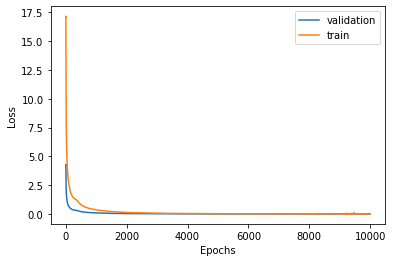

In [4]:
plt.plot(hist_val, label ='validation')
plt.plot(hist_train, label ='train')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.savefig('images/'+str(samples)+'_'+str(epsilon)+'_'+str(n)+"_"+str(hidden_size)+"_Loss_Training.png")
plt.show()

In [5]:
#csv_file = open("size_MLP_noise.csv", "a")
#csv_file.write(str(np.asarray(acc_testing))+","+str(np.asarray(acc_training))+","+str(samples)+","+str(epsilon)+","+str(n)+","+str(hidden_size)+"\n")
#csv_file.close()

In [6]:
outputs, intermediates, intermediates2, labels = ut.get_representations(net, train_loader, device)
outputs_test, intermediates_test, intermediates2_test, labels_test = ut.get_representations(net, test_loader, device)

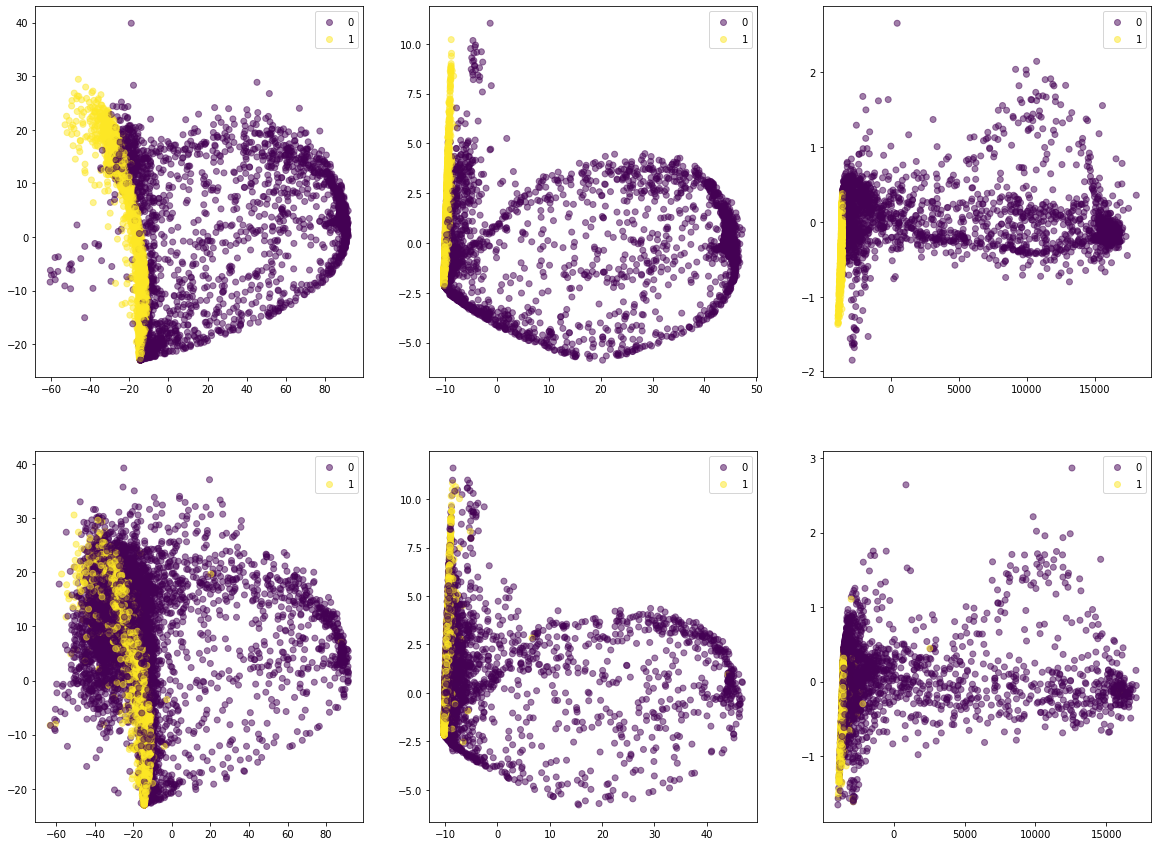

In [7]:
intermediate_pca_data, intermediate_pca_data_test = ut.get_pca(intermediates, data_test=intermediates_test)
fig, axs = plt.subplots(2, 3, figsize=(20,15))
ut.plot_representations(intermediate_pca_data, labels, axs[0, 0])
ut.plot_representations(intermediate_pca_data_test, labels_test, axs[1, 0])
intermediate2_pca_data, intermediate2_pca_data_test = ut.get_pca(intermediates2, data_test=intermediates2_test)
ut.plot_representations(intermediate2_pca_data, labels, axs[0, 1])
ut.plot_representations(intermediate2_pca_data_test, labels_test, axs[1, 1])
output_pca_data, output_pca_data_test = ut.get_pca(outputs, data_test=outputs_test)
ut.plot_representations(output_pca_data, labels, axs[0, 2])
ut.plot_representations(output_pca_data_test, labels_test, axs[1, 2])

first
first ..
first ...


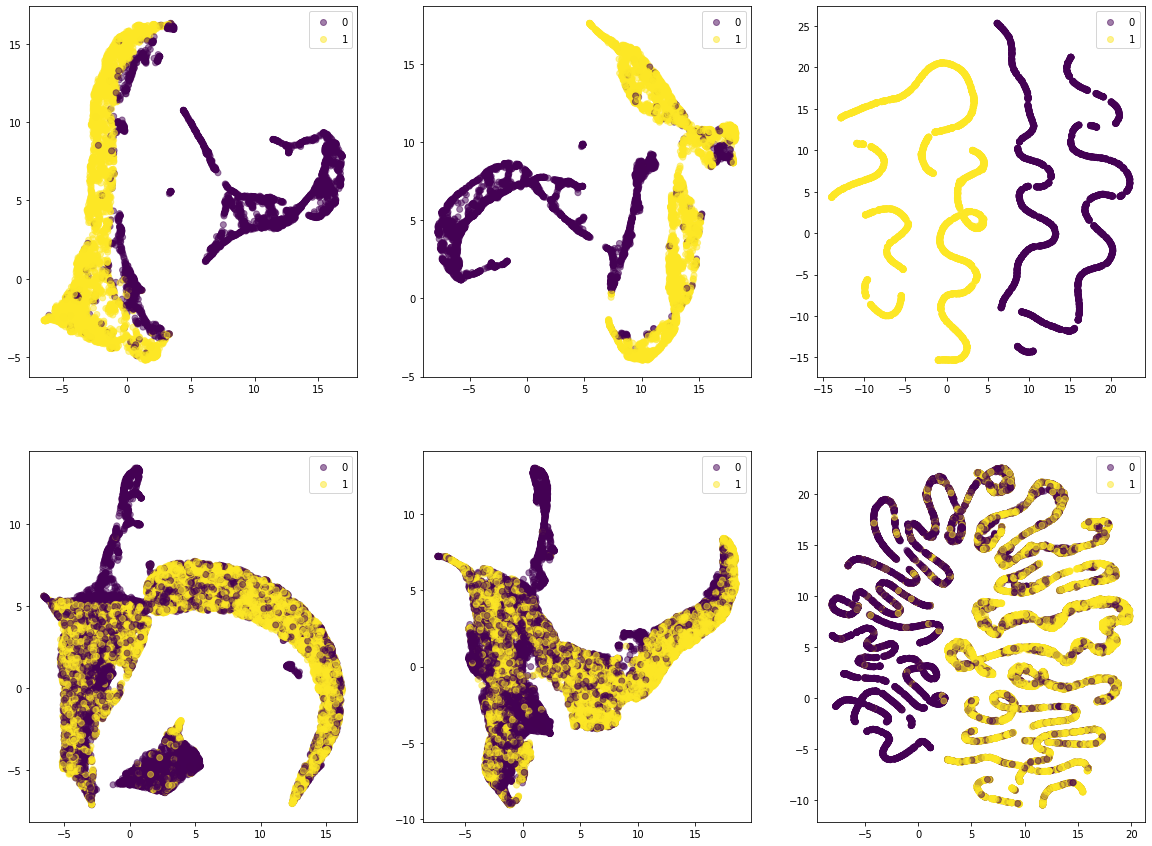

In [8]:
import umap

fig, axs = plt.subplots(2, 3, figsize=(20,15))
print('first')
reducer = umap.UMAP()
print('first ..')
mapper_train = reducer.fit_transform(intermediates.numpy())
print('first ...')
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(intermediates_test.numpy())
ut.plot_representations(mapper_train, labels, axs[0, 0])
ut.plot_representations(mapper_test, labels_test, axs[1, 0])

reducer = umap.UMAP()
mapper_train = reducer.fit_transform(intermediates2.numpy())
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(intermediates2_test.numpy())
ut.plot_representations(mapper_train, labels, axs[0, 1])
ut.plot_representations(mapper_test, labels_test, axs[1, 1])

reducer = umap.UMAP()
mapper_train = reducer.fit_transform(outputs.numpy())
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(outputs_test.numpy())

ut.plot_representations(mapper_train, labels, axs[0, 2])
ut.plot_representations(mapper_test, labels_test, axs[1, 2])

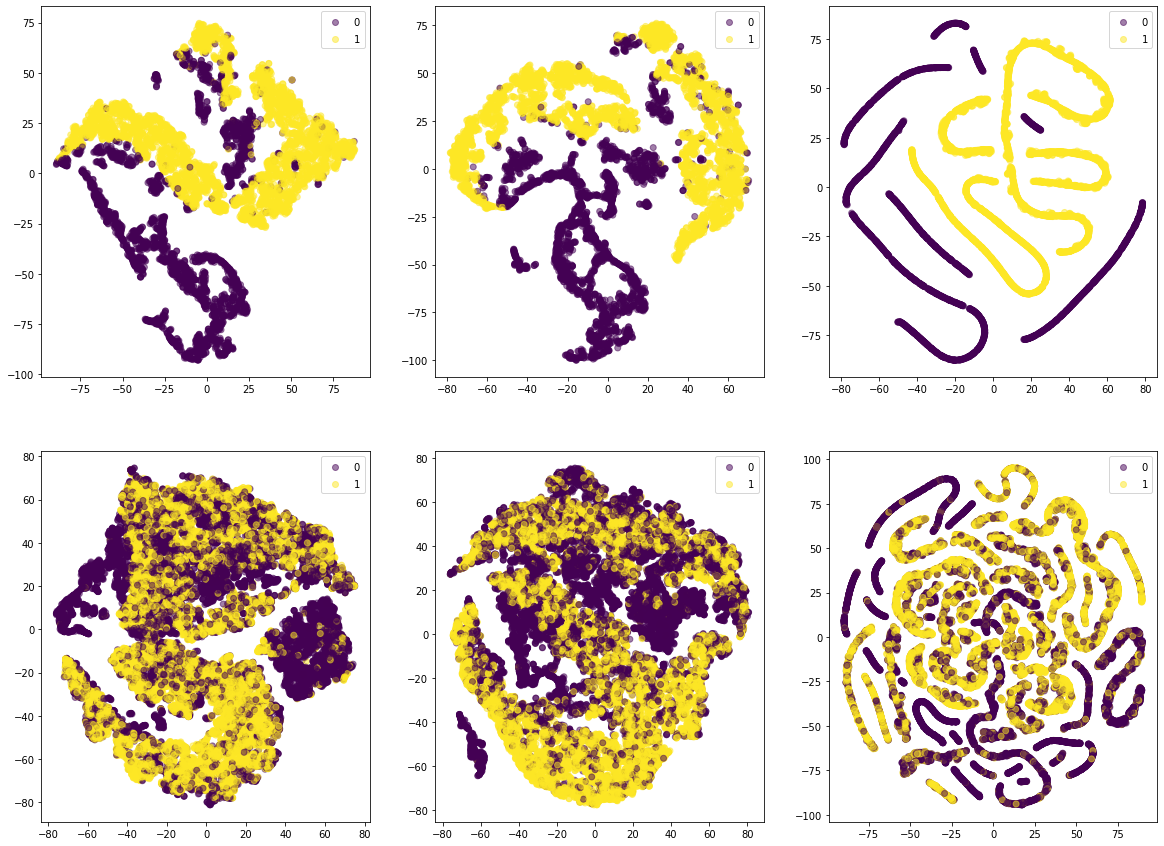

In [9]:
N_CURVES = 25000

fig, axs = plt.subplots(2, 3, figsize=(20,15))
intermediate_tsne_data, intermediate_tsne_data_test = ut.get_tsne(intermediates, data_test= intermediates_test, n_curves = N_CURVES)
ut.plot_representations(intermediate_tsne_data, labels, axs[0, 0],  n_curves = N_CURVES)
ut.plot_representations(intermediate_tsne_data_test, labels_test, axs[1, 0], n_curves = N_CURVES)

intermediate2_tsne_data, intermediate2_tsne_data_test = ut.get_tsne(intermediates2, data_test=intermediates2_test, n_curves = N_CURVES)
ut.plot_representations(intermediate2_tsne_data, labels, axs[0, 1], n_curves = N_CURVES)
ut.plot_representations(intermediate2_tsne_data_test, labels_test, axs[1, 1], n_curves = N_CURVES)

output_tsne_data, output2_tsne_data_test = ut.get_tsne(outputs, data_test=outputs_test, n_curves = N_CURVES)
ut.plot_representations(output_tsne_data, labels, axs[0, 2], n_curves = N_CURVES)
ut.plot_representations(output2_tsne_data_test, labels_test, axs[1, 2], n_curves = N_CURVES)

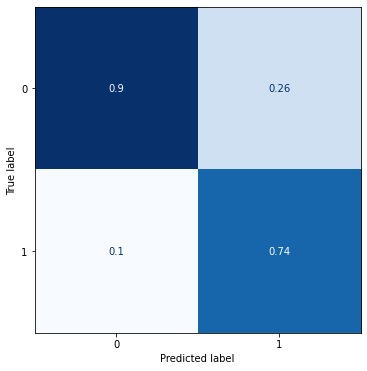

In [17]:
#fig, ax = plt.subplots(1, 1, figsize=(15,15))
#curves, labels, probs_train = ut.get_predictions(net, train_loader_pred, device)
#pred_labels = probs_train.argmax(1, keepdim = True)
#ut.plot_confusion_matrix(np.round(labels), pred_labels, ax)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
curves, labels, probs_test = ut.get_predictions(net, test_loader_pred, device)
pred_labels = probs_test.argmax(1, keepdim = True)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax)

In [11]:
curves, labels, probs_train_sample = ut.get_predictions(net, train_loader, device)

In [12]:
#N_WEIGHTS = 25
#weights = net.fc2.weight.data
#plot_weights(weights, N_WEIGHTS)

In [13]:
weights1 = net.fc1.weight.data
w1 = weights1.cpu().numpy().reshape(-1,1)
weights2 = net.fc2.weight.data
w2 = weights2.cpu().numpy().reshape(-1,1)
weights3 = net.fc3.weight.data
w3 = weights3.cpu().numpy().reshape(-1,1)

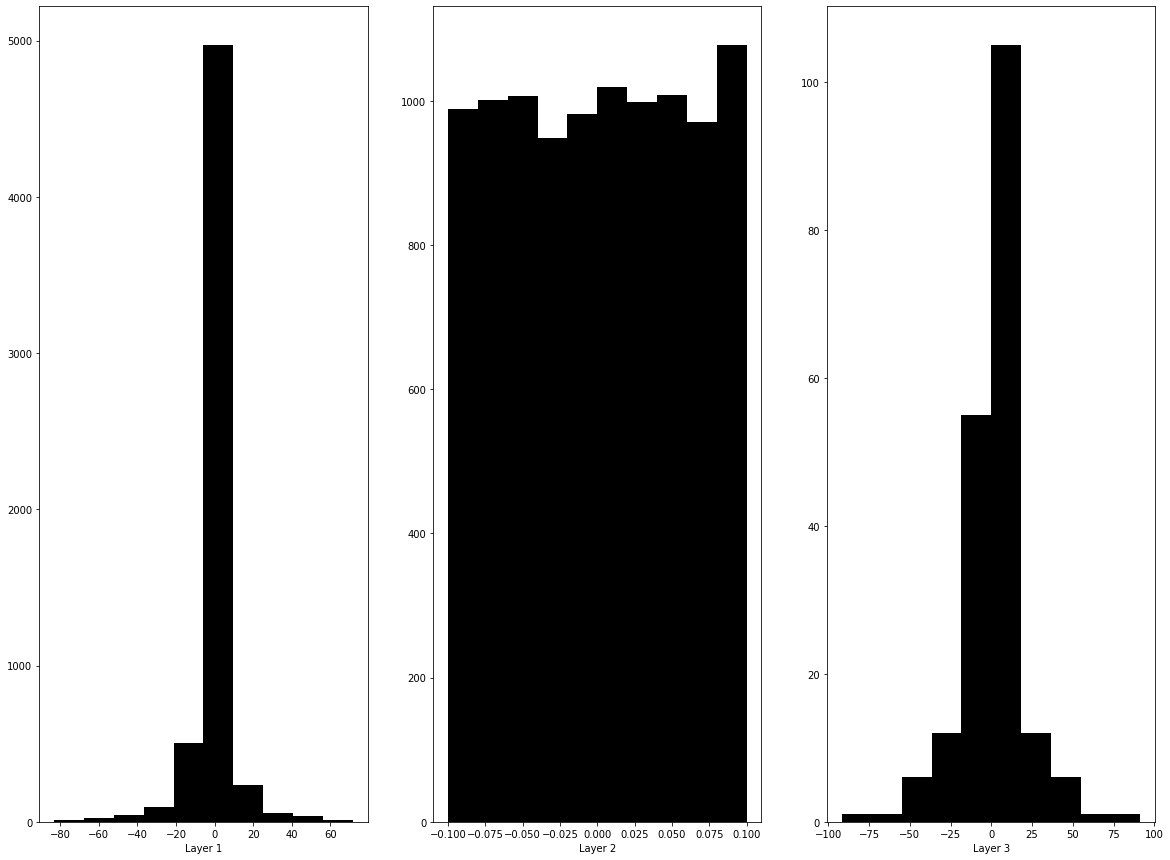

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,15))
ax1.hist(w1, color='black')
ax1.set_xlabel('Layer 1')
ax2.hist(w2, color='black')
ax2.set_xlabel('Layer 2')
ax3.hist(w3, color='black')
ax3.set_xlabel('Layer 3')
plt.show()

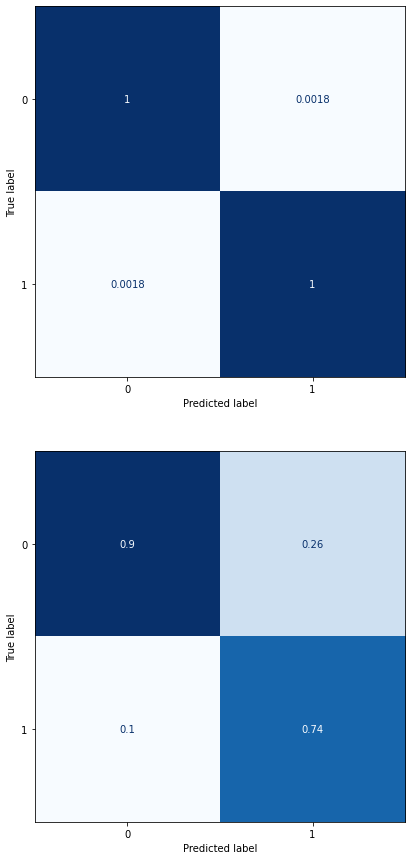

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
curves, labels, probs_train = ut.get_predictions(net, train_loader_pred, device)
pred_labels = torch.argmax(probs_train, 1)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax1)
curves, labels, probs_test = ut.get_predictions(net, test_loader_pred, device)
pred_labels = torch.argmax(probs_test, 1)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax2)